### Packages and global options

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from matplotlib.offsetbox import (DrawingArea, OffsetImage, AnnotationBbox)
from matplotlib.ticker import ScalarFormatter

# Global parameters for the figure.
plt.style.use('seaborn-deep')
plt.rcParams["text.usetex"] = True
plt.rcParams['text.latex.preamble'] = r'\usepackage{amssymb}'

plt.rcParams["figure.figsize"] = 11.7, 8.3
plt.rcParams["figure.dpi"] = 75

plt.rcParams["font.size"] = 36
plt.rcParams["font.family"] = "sans-serif"
plt.rcParams["font.sans-serif"] = ["Fira Sans", 'PT Sans', 'Open Sans', 'Roboto', 'DejaVu Sans', 'Liberation Sans', 'sans-serif']

plt.rcParams["legend.frameon"] = True
plt.rcParams["legend.fancybox"] = True
plt.rcParams["legend.fontsize"] = "small"

plt.rcParams["lines.linewidth"] = 2.5
plt.rcParams["lines.markersize"] = 18
plt.rcParams["lines.markeredgewidth"] = 3

plt.rcParams["xtick.major.size"] = 8
plt.rcParams["ytick.major.size"] = 8

### How the data was generated

1. The properties of the real network datasets were extracted via
```
python extract_real_networks_properties.py
```
2. The parameters of the directed $S^1$ were inferred via 
```
python infer_real_network_parameters.py              <name of the real network>
python infer_real_network_parameters_custom_beta.py  <name of the real network>  <custom value for beta>
python infer_real_network_parameters_custom_nu.py    <name of the real network>  <custom value for nu>
```
3. Directed networks according to the directed $S^1$ models were generated and analyzed via 
```
python generate_inferred_networks_and_extract_network_properties.py <name of the real network with suffix set at the previous step>
```

### Code plotting the results

In [2]:
def draw_xlabels(ax, cprops, aprops, r=15, radius=5, offset_factor=1.5, DAwidth=20, DAheight=20, DAxdescent=10, DAydescent=10):
    
    ax.xaxis.set_ticklabels([])
    
    # ====================
    # 3cycle
    da = DrawingArea(width=DAwidth, height=DAheight, xdescent=DAxdescent, ydescent=DAydescent)

    # nodes
    x0, y0 = 0, r
    da.add_artist(mpatches.Circle((x0, y0), radius, **cprops))
    x1, y1 = r*np.cos(7*np.pi/6), r*np.sin(7*np.pi/6)
    da.add_artist(mpatches.Circle((x1, y1), radius, **cprops))
    x2, y2 = r*np.cos(11*np.pi/6), r*np.sin(11*np.pi/6)
    da.add_artist(mpatches.Circle((x2, y2), radius, **cprops))

    # link 1 -> 2
    offset_x, offset_y = offset_factor * radius, 0
    dx, dy = (x2-x1)-2*offset_x, 0
    da.add_artist(mpatches.FancyArrow(x1+offset_x, y1+offset_y,  dx, dy, **aprops))

    # link 2 -> 0
    offset_x, offset_y = offset_factor*radius*np.cos(np.pi/3), offset_factor*radius*np.sin(np.pi/3)
    dx, dy = x2-2*offset_x, y0-y1-2*offset_y
    da.add_artist(mpatches.FancyArrow(x2-offset_x, y2+offset_y, -dx, dy, **aprops))

    # link 0 -> 1
    offset_x, offset_y = offset_factor*radius*np.cos(np.pi/3), offset_factor*radius*np.sin(np.pi/3)
    dx, dy = x2-2*offset_x, y0-y1-2*offset_y
    da.add_artist(mpatches.FancyArrow(x0-offset_x, y0-offset_y, -dx, -dy, **aprops))

    ax.add_artist(AnnotationBbox(da, (1, -0.05), xybox=(0, -DAydescent/2), xycoords=("data", "axes fraction"),
                                 box_alignment=(.5, 1), boxcoords="offset points", bboxprops={"edgecolor" : "none"}))


    # ====================
    # 3nocycle
    da = DrawingArea(width=DAwidth, height=DAheight, xdescent=DAxdescent, ydescent=DAydescent)

    # nodes
    x0, y0 = 0, r
    da.add_artist(mpatches.Circle((x0, y0), radius, **cprops))
    x1, y1 = r*np.cos(7*np.pi/6), r*np.sin(7*np.pi/6)
    da.add_artist(mpatches.Circle((x1, y1), radius, **cprops))
    x2, y2 = r*np.cos(11*np.pi/6), r*np.sin(11*np.pi/6)
    da.add_artist(mpatches.Circle((x2, y2), radius, **cprops))

    # link 1 -> 2
    offset_x, offset_y = offset_factor * radius, 0
    dx, dy = (x2-x1)-2*offset_x, 0
    da.add_artist(mpatches.FancyArrow(x1+offset_x, y1+offset_y,  dx, dy, **aprops))

    # link 0 -> 2
    offset_x, offset_y = offset_factor*radius*np.cos(np.pi/3), offset_factor*radius*np.sin(np.pi/3)
    dx, dy = x2-2*offset_x, y0-y1-2*offset_y
    da.add_artist(mpatches.FancyArrow(x0+offset_x, y0-offset_y,  dx, -dy, **aprops))

    # link 0 -> 1
    offset_x, offset_y = offset_factor*radius*np.cos(np.pi/3), offset_factor*radius*np.sin(np.pi/3)
    dx, dy = x2-2*offset_x, y0-y1-2*offset_y
    da.add_artist(mpatches.FancyArrow(x0-offset_x, y0-offset_y, -dx, -dy, **aprops))

    ax.add_artist(AnnotationBbox(da, (2,-0.05), xybox=(0, -DAydescent/2), xycoords=("data", "axes fraction"),
                                 box_alignment=(.5, 1), boxcoords="offset points", bboxprops={"edgecolor" : "none"}))


    # ====================
    # 4cycle
    da = DrawingArea(width=DAwidth, height=DAheight, xdescent=DAxdescent, ydescent=DAydescent)

    # nodes
    x0, y0 = 0, r
    da.add_artist(mpatches.Circle((x0, y0), radius, **cprops))
    x1, y1 = r*np.cos(7*np.pi/6), r*np.sin(7*np.pi/6)
    da.add_artist(mpatches.Circle((x1, y1), radius, **cprops))
    x2, y2 = r*np.cos(11*np.pi/6), r*np.sin(11*np.pi/6)
    da.add_artist(mpatches.Circle((x2, y2), radius, **cprops))

    # link 1 -> 2
    offset_x, offset_y = offset_factor * radius, 0
    dx, dy = (x2-x1)-2*offset_x, 0
    da.add_artist(mpatches.FancyArrow(x1+offset_x, y1+offset_y,  dx, dy, **aprops))

    # link 2 -> 0
    offset_x, offset_y = offset_factor*radius*np.cos(np.pi/3), offset_factor*radius*np.sin(np.pi/3)
    dx, dy = x2-2*offset_x, y0-y1-2*offset_y
    da.add_artist(mpatches.FancyArrow(x2-offset_x, y2+offset_y, -dx, dy, **aprops))

    # link 0 -> 1
    offset_x, offset_y = offset_factor*radius*np.cos(np.pi/3), offset_factor*radius*np.sin(np.pi/3)
    dx, dy = x2-2*offset_x, y0-y1-2*offset_y
    da.add_artist(mpatches.FancyArrow(x0-offset_x, y0-offset_y, -dx, -dy, **aprops))

    # link 2 -> 1
    offset_x, offset_y = offset_factor * radius, 0
    dx, dy = (x2-x1)-2*offset_x, 0
    da.add_artist(mpatches.FancyArrow(x2-offset_x, y2-offset_y, -dx, dy, **aprops))

    ax.add_artist(AnnotationBbox(da, (3,-0.05), xybox=(0, -DAydescent/2), xycoords=("data", "axes fraction"),
                                 box_alignment=(.5, 1), boxcoords="offset points", bboxprops={"edgecolor" : "none"}))


    # ====================
    # 4inward
    da = DrawingArea(width=DAwidth, height=DAheight, xdescent=DAxdescent, ydescent=DAydescent)

    # nodes
    x0, y0 = 0, r
    da.add_artist(mpatches.Circle((x0, y0), radius, **cprops))
    x1, y1 = r*np.cos(7*np.pi/6), r*np.sin(7*np.pi/6)
    da.add_artist(mpatches.Circle((x1, y1), radius, **cprops))
    x2, y2 = r*np.cos(11*np.pi/6), r*np.sin(11*np.pi/6)
    da.add_artist(mpatches.Circle((x2, y2), radius, **cprops))

    # link 1 -> 2
    offset_x, offset_y = offset_factor * radius, 0
    dx, dy = (x2-x1)-2*offset_x, 0
    da.add_artist(mpatches.FancyArrow(x1+offset_x, y1+offset_y,  dx, dy, **aprops))

    # link 2 -> 1
    offset_x, offset_y = offset_factor * radius, 0
    dx, dy = (x2-x1)-2*offset_x, 0
    da.add_artist(mpatches.FancyArrow(x2-offset_x, y1-offset_y, -dx, dy, **aprops))
    
    # link 2 -> 0
    offset_x, offset_y = offset_factor*radius*np.cos(np.pi/3), offset_factor*radius*np.sin(np.pi/3)
    dx, dy = x2-2*offset_x, y0-y1-2*offset_y
    da.add_artist(mpatches.FancyArrow(x2-offset_x, y2+offset_y, -dx, dy, **aprops))

    # link 1 -> 0
    offset_x, offset_y = offset_factor*radius*np.cos(np.pi/3), offset_factor*radius*np.sin(np.pi/3)
    dx, dy = x2-2*offset_x, y0-y1-2*offset_y
    da.add_artist(mpatches.FancyArrow(x1+offset_x, y1+offset_y,  dx, dy, **aprops))

    ax.add_artist(AnnotationBbox(da, (4,-0.05), xybox=(0, -DAydescent/2), xycoords=("data", "axes fraction"),
                                 box_alignment=(.5, 1), boxcoords="offset points", bboxprops={"edgecolor" : "none"}))


    # ====================
    # 4outward
    da = DrawingArea(width=DAwidth, height=DAheight, xdescent=DAxdescent, ydescent=DAydescent)

    # nodes
    x0, y0 = 0, r
    da.add_artist(mpatches.Circle((x0, y0), radius, **cprops))
    x1, y1 = r*np.cos(7*np.pi/6), r*np.sin(7*np.pi/6)
    da.add_artist(mpatches.Circle((x1, y1), radius, **cprops))
    x2, y2 = r*np.cos(11*np.pi/6), r*np.sin(11*np.pi/6)
    da.add_artist(mpatches.Circle((x2, y2), radius, **cprops))

    # link 1 -> 2
    offset_x, offset_y = offset_factor * radius, 0
    dx, dy = (x2-x1)-2*offset_x, 0
    da.add_artist(mpatches.FancyArrow(x1+offset_x, y1+offset_y,  dx, dy, **aprops))

    # link 2 -> 1
    offset_x, offset_y = offset_factor * radius, 0
    dx, dy = (x2-x1)-2*offset_x, 0
    da.add_artist(mpatches.FancyArrow(x2-offset_x, y1-offset_y, -dx, dy, **aprops))
    
    # link 0 -> 2
    offset_x, offset_y = offset_factor*radius*np.cos(np.pi/3), offset_factor*radius*np.sin(np.pi/3)
    dx, dy = x2-2*offset_x, y0-y1-2*offset_y
    da.add_artist(mpatches.FancyArrow(x0+offset_x, y0-offset_y,  dx, -dy, **aprops))

    # link 0 -> 1
    offset_x, offset_y = offset_factor*radius*np.cos(np.pi/3), offset_factor*radius*np.sin(np.pi/3)
    dx, dy = x2-2*offset_x, y0-y1-2*offset_y
    da.add_artist(mpatches.FancyArrow(x0-offset_x, y0-offset_y, -dx, -dy, **aprops))

    ax.add_artist(AnnotationBbox(da, (5,-0.05), xybox=(0, -DAydescent/2), xycoords=("data", "axes fraction"),
                                 box_alignment=(.5, 1), boxcoords="offset points", bboxprops={"edgecolor" : "none"}))


    # ====================
    # 5cycle
    da = DrawingArea(width=DAwidth, height=DAheight, xdescent=DAxdescent, ydescent=DAydescent)

    # nodes
    x0, y0 = 0, r
    da.add_artist(mpatches.Circle((x0, y0), radius, **cprops))
    x1, y1 = r*np.cos(7*np.pi/6), r*np.sin(7*np.pi/6)
    da.add_artist(mpatches.Circle((x1, y1), radius, **cprops))
    x2, y2 = r*np.cos(11*np.pi/6), r*np.sin(11*np.pi/6)
    da.add_artist(mpatches.Circle((x2, y2), radius, **cprops))
    
    # link 0 -> 2
    offset_x, offset_y = offset_factor*radius*np.cos(np.pi/3), offset_factor*radius*np.sin(np.pi/3)
    dx, dy = x2-2*offset_x, y0-y1-2*offset_y
    da.add_artist(mpatches.FancyArrow(x0+offset_x, y0-offset_y,  dx, -dy, **aprops))
    
    # link 1 -> 0
    offset_x, offset_y = offset_factor*radius*np.cos(np.pi/3), offset_factor*radius*np.sin(np.pi/3)
    dx, dy = x2-2*offset_x, y0-y1-2*offset_y
    da.add_artist(mpatches.FancyArrow(x1+offset_x, y1+offset_y,  dx, dy, **aprops))

    # link 1 -> 2
    offset_x, offset_y = offset_factor * radius, 0
    dx, dy = (x2-x1)-2*offset_x, 0
    da.add_artist(mpatches.FancyArrow(x1+offset_x, y1+offset_y,  dx, dy, **aprops))

    # link 2 -> 0
    offset_x, offset_y = offset_factor*radius*np.cos(np.pi/3), offset_factor*radius*np.sin(np.pi/3)
    dx, dy = x2-2*offset_x, y0-y1-2*offset_y
    da.add_artist(mpatches.FancyArrow(x2-offset_x, y2+offset_y, -dx, dy, **aprops))
    
    # link 2 -> 1
    offset_x, offset_y = offset_factor * radius, 0
    dx, dy = (x2-x1)-2*offset_x, 0
    da.add_artist(mpatches.FancyArrow(x2-offset_x, y2-offset_y, -dx, dy, **aprops))
    
    ax.add_artist(AnnotationBbox(da, (6,-0.05), xybox=(0, -DAydescent/2), xycoords=("data", "axes fraction"),
                                 box_alignment=(.5, 1), boxcoords="offset points", bboxprops={"edgecolor" : "none"}))

    
    # ====================
    # 6cycle
    da = DrawingArea(width=DAwidth, height=DAheight, xdescent=DAxdescent, ydescent=DAydescent)

    # nodes
    x0, y0 = 0, r
    da.add_artist(mpatches.Circle((x0, y0), radius, **cprops))
    x1, y1 = r*np.cos(7*np.pi/6), r*np.sin(7*np.pi/6)
    da.add_artist(mpatches.Circle((x1, y1), radius, **cprops))
    x2, y2 = r*np.cos(11*np.pi/6), r*np.sin(11*np.pi/6)
    da.add_artist(mpatches.Circle((x2, y2), radius, **cprops))

    # link 0 -> 1
    offset_x, offset_y = offset_factor*radius*np.cos(np.pi/3), offset_factor*radius*np.sin(np.pi/3)
    dx, dy = x2-2*offset_x, y0-y1-2*offset_y
    da.add_artist(mpatches.FancyArrow(x0-offset_x, y0-offset_y, -dx, -dy, **aprops))
    
    # link 0 -> 2
    offset_x, offset_y = offset_factor*radius*np.cos(np.pi/3), offset_factor*radius*np.sin(np.pi/3)
    dx, dy = x2-2*offset_x, y0-y1-2*offset_y
    da.add_artist(mpatches.FancyArrow(x0+offset_x, y0-offset_y,  dx, -dy, **aprops))
    
    # link 1 -> 0
    offset_x, offset_y = offset_factor*radius*np.cos(np.pi/3), offset_factor*radius*np.sin(np.pi/3)
    dx, dy = x2-2*offset_x, y0-y1-2*offset_y
    da.add_artist(mpatches.FancyArrow(x1+offset_x, y1+offset_y,  dx, dy, **aprops))

    # link 1 -> 2
    offset_x, offset_y = offset_factor * radius, 0
    dx, dy = (x2-x1)-2*offset_x, 0
    da.add_artist(mpatches.FancyArrow(x1+offset_x, y1+offset_y,  dx, dy, **aprops))

    # link 2 -> 0
    offset_x, offset_y = offset_factor*radius*np.cos(np.pi/3), offset_factor*radius*np.sin(np.pi/3)
    dx, dy = x2-2*offset_x, y0-y1-2*offset_y
    da.add_artist(mpatches.FancyArrow(x2-offset_x, y2+offset_y, -dx, dy, **aprops))
    
    # link 2 -> 1
    offset_x, offset_y = offset_factor * radius, 0
    dx, dy = (x2-x1)-2*offset_x, 0
    da.add_artist(mpatches.FancyArrow(x2-offset_x, y2-offset_y, -dx, dy, **aprops))
    
    ax.add_artist(AnnotationBbox(da, (7,-0.05), xybox=(0, -DAydescent/2), xycoords=("data", "axes fraction"),
                                 box_alignment=(.5, 1), boxcoords="offset points", bboxprops={"edgecolor" : "none"}))

    ax.set_xlim(left=0.75, right=7.25)
    ax.set_xticks(np.arange(1, 8))
    ax.set_xlabel("triangle configurations", labelpad=0)#, fontsize="large")

In [3]:
# https://stackoverflow.com/a/49351416
class ScalarFormatterForceFormat(ScalarFormatter):
    def _set_format(self):  # Override function that finds format to use.
        self.format = "%.1f"  # Give format here

In [4]:
def plot_num_triangle_spectra(ax, name, offset=0, marker="o", color='#C44E52', label=r"directed-reciprocal $\mathbb{S}^1$ model"):
    triangle_spectra_header = ["TriSpect_3cycle",  "TriSpect_3nocycle", "TriSpect_4cycle",  "TriSpect_4outward", "TriSpect_4inward", "TriSpect_5cycle", "TriSpect_6cycle"]
    df = num_g_prop
    avg_val = df[triangle_spectra_header].quantile(q=0.50, axis=0)
    max_val = df[triangle_spectra_header].quantile(q=0.975, axis=0)
    min_val = df[triangle_spectra_header].quantile(q=0.025, axis=0)
    ax.errorbar(np.arange(1, 8)+offset, avg_val, yerr=[avg_val - min_val, max_val - avg_val],
                linestyle="None", marker=marker, markerfacecolor="None", clip_on=False, color=color, label=label)
    
def plot_real_triangle_spectra(ax, name):
    triangle_spectra_header = ["TriSpect_3cycle",  "TriSpect_3nocycle", "TriSpect_4cycle",  "TriSpect_4outward", "TriSpect_4inward", "TriSpect_5cycle", "TriSpect_6cycle"]
    ax.plot(range(1, 8), real_g_prop.loc[(real_g_prop.index == name), triangle_spectra_header].mean(axis=0),
            linestyle="None", marker="s", markerfacecolor="None", clip_on=False, color='#4C72B0', label=r"original network")

### Figure 4

##### (d) Political blogs

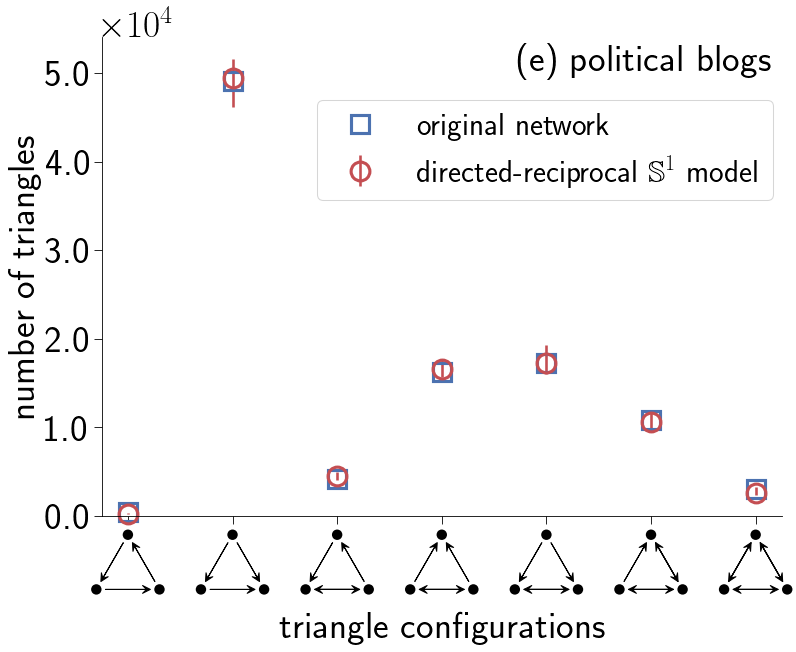

In [5]:
real_graph_name = "polblogs"
DRS1model_graph_name = real_graph_name + "_beta1p75_00"

num_g_prop_filename = "../../directedS1_data/synthetic_networks/network_properties/" + DRS1model_graph_name + "_gprop.txt"
header = open(num_g_prop_filename, 'r').readline().replace('#', ' ').split()
num_g_prop = pd.read_table(num_g_prop_filename, names=header, comment="#", delimiter=r"\s+", index_col=0)

real_g_prop_filename = "../../directedS1_data/real_networks/network_properties/all_gprop.txt"
header = open(real_g_prop_filename, 'r').readline().replace('#', ' ').split()
real_g_prop = pd.read_table(real_g_prop_filename, names=header, comment="#", delimiter=r"\s+", index_col=0)

fig, ax = plt.subplots()

plot_real_triangle_spectra(ax, real_graph_name)
plot_num_triangle_spectra(ax, real_graph_name, offset=0.0)

plt.text(0.9875, 0.9875, r"{}".format(r"(e) political blogs"),
         horizontalalignment="right", verticalalignment="top",
         fontsize='medium', transform=ax.transAxes)

cprops = {"facecolor":"k", "edgecolor":"None"}
aprops = {"color":"k", "length_includes_head":True, "overhang":0.5, "head_width":7.5, "head_length":7.5, "joinstyle":"round"}
draw_xlabels(ax, cprops, aprops, r=35, radius=5, offset_factor=1.75, DAwidth=40, DAheight=40, DAxdescent=20, DAydescent=20)

ax.set_ylim(bottom=0)
ax.set_ylabel("number of triangles")
ax.xaxis.labelpad = 80
# ax.ticklabel_format(axis='y', style='sci', scilimits=(0,0))

yfmt = ScalarFormatterForceFormat()
yfmt.set_powerlimits((0,0))
ax.yaxis.set_major_formatter(yfmt)

ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)

ax.legend(loc="upper right", bbox_to_anchor=(1.01,0.9))

fig.savefig("../figures/pdf/figure_paper_" + DRS1model_graph_name + "_triangle_spectrum.pdf", bbox_inches='tight')
fig.savefig("../figures/svg/figure_paper_" + DRS1model_graph_name + "_triangle_spectrum.svg", bbox_inches='tight')

##### (e) Tadpole larva brain (C. intestinalis)

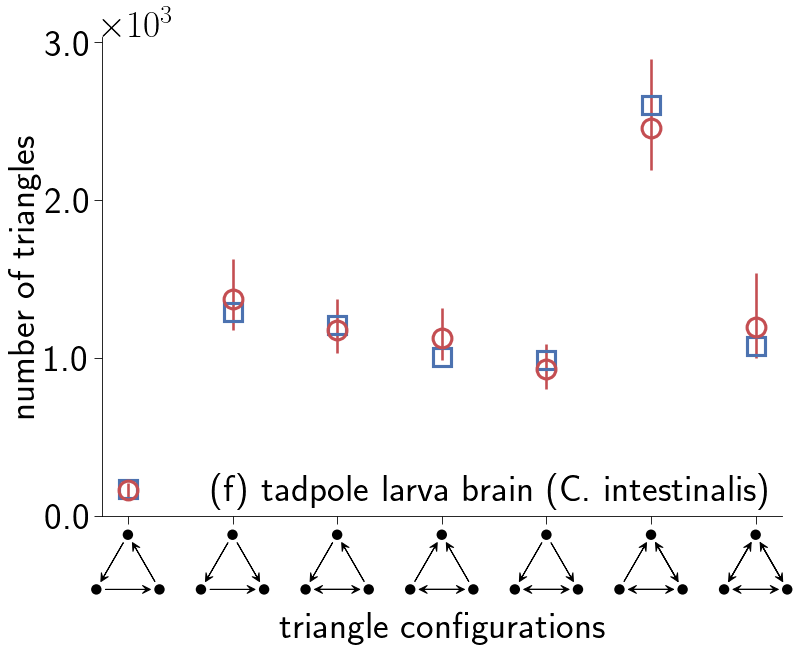

In [6]:
real_graph_name = "cintestinalis"
DRS1model_graph_name = real_graph_name + "_beta2p00_00"

num_g_prop_filename = "../../directedS1_data/synthetic_networks/network_properties/" + DRS1model_graph_name + "_gprop.txt"
header = open(num_g_prop_filename, 'r').readline().replace('#', ' ').split()
num_g_prop = pd.read_table(num_g_prop_filename, names=header, comment="#", delimiter=r"\s+", index_col=0)

real_g_prop_filename = "../../directedS1_data/real_networks/network_properties/all_gprop.txt"
header = open(real_g_prop_filename, 'r').readline().replace('#', ' ').split()
real_g_prop = pd.read_table(real_g_prop_filename, names=header, comment="#", delimiter=r"\s+", index_col=0)

fig, ax = plt.subplots()

plot_real_triangle_spectra(ax, real_graph_name)
plot_num_triangle_spectra(ax, real_graph_name, offset=0.0)

plt.text(0.9875, 0.0125, r"{}".format(r"(f) tadpole larva brain (C. intestinalis)"),
         horizontalalignment="right", verticalalignment="bottom",
         fontsize='medium', transform=ax.transAxes)

cprops = {"facecolor":"k", "edgecolor":"None"}
aprops = {"color":"k", "length_includes_head":True, "overhang":0.5, "head_width":7.5, "head_length":7.5, "joinstyle":"round"}
draw_xlabels(ax, cprops, aprops, r=35, radius=5, offset_factor=1.75, DAwidth=40, DAheight=40, DAxdescent=20, DAydescent=20)

ax.set_ylim(bottom=0)
ax.set_ylabel("number of triangles")
ax.xaxis.labelpad = 80
# ax.ticklabel_format(axis='y', style='sci', scilimits=(0,0))

yfmt = ScalarFormatterForceFormat()
yfmt.set_powerlimits((0,0))
ax.yaxis.set_major_formatter(yfmt)

ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)

# ax.legend(loc="upper left")

fig.savefig("../figures/pdf/figure_paper_" + DRS1model_graph_name + "_triangle_spectrum.pdf", bbox_inches='tight')
fig.savefig("../figures/svg/figure_paper_" + DRS1model_graph_name + "_triangle_spectrum.svg", bbox_inches='tight')

##### (f) Little Rock Lake food web

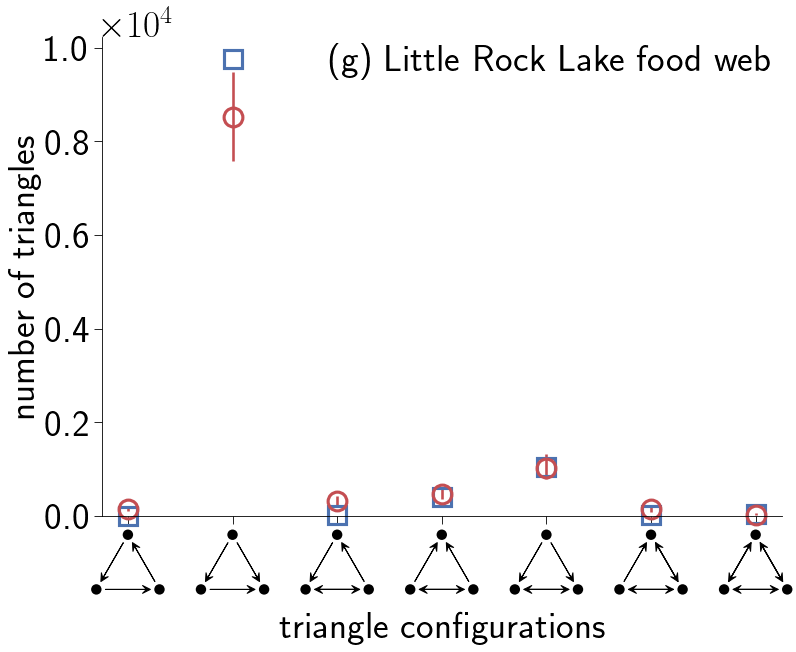

In [7]:
real_graph_name = "foodweb_little_rock"
DRS1model_graph_name = real_graph_name + "_beta1p50_00"

num_g_prop_filename = "../../directedS1_data/synthetic_networks/network_properties/" + DRS1model_graph_name + "_gprop.txt"
header = open(num_g_prop_filename, 'r').readline().replace('#', ' ').split()
num_g_prop = pd.read_table(num_g_prop_filename, names=header, comment="#", delimiter=r"\s+", index_col=0)

real_g_prop_filename = "../../directedS1_data/real_networks/network_properties/all_gprop.txt"
header = open(real_g_prop_filename, 'r').readline().replace('#', ' ').split()
real_g_prop = pd.read_table(real_g_prop_filename, names=header, comment="#", delimiter=r"\s+", index_col=0)

fig, ax = plt.subplots()

plot_real_triangle_spectra(ax, real_graph_name)
plot_num_triangle_spectra(ax, real_graph_name, offset=0.0)

plt.text(0.9875, 0.9875, r"{}".format(r"(g) Little Rock Lake food web"),
         horizontalalignment="right", verticalalignment="top",
         fontsize='medium', transform=ax.transAxes)

cprops = {"facecolor":"k", "edgecolor":"None"}
aprops = {"color":"k", "length_includes_head":True, "overhang":0.5, "head_width":7.5, "head_length":7.5, "joinstyle":"round"}
draw_xlabels(ax, cprops, aprops, r=35, radius=5, offset_factor=1.75, DAwidth=40, DAheight=40, DAxdescent=20, DAydescent=20)

ax.set_ylim(bottom=0)
ax.set_ylabel("number of triangles")
ax.xaxis.labelpad = 80
# ax.ticklabel_format(axis='y', style='sci', scilimits=(0,0))

yfmt = ScalarFormatterForceFormat()
yfmt.set_powerlimits((0,0))
ax.yaxis.set_major_formatter(yfmt)

ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)

fig.savefig("../figures/pdf/figure_paper_" + DRS1model_graph_name + "_triangle_spectrum.pdf", bbox_inches='tight')
fig.savefig("../figures/svg/figure_paper_" + DRS1model_graph_name + "_triangle_spectrum.svg", bbox_inches='tight')

##### (g) FAO trade network

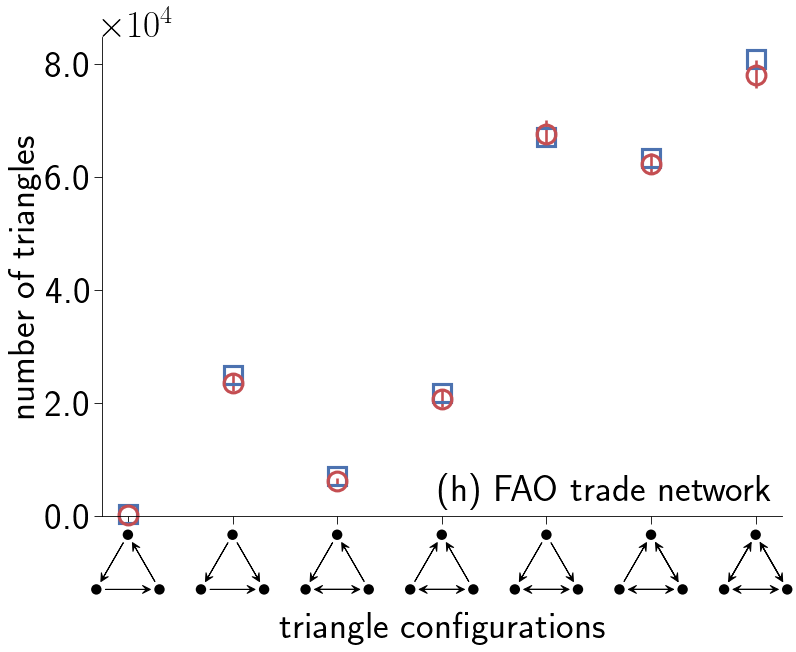

In [8]:
real_graph_name = "fao_trade"
DRS1model_graph_name = real_graph_name + "_beta1p75_00"

num_g_prop_filename = "../../directedS1_data/synthetic_networks/network_properties/" + DRS1model_graph_name + "_gprop.txt"
header = open(num_g_prop_filename, 'r').readline().replace('#', ' ').split()
num_g_prop = pd.read_table(num_g_prop_filename, names=header, comment="#", delimiter=r"\s+", index_col=0)

real_g_prop_filename = "../../directedS1_data/real_networks/network_properties/all_gprop.txt"
header = open(real_g_prop_filename, 'r').readline().replace('#', ' ').split()
real_g_prop = pd.read_table(real_g_prop_filename, names=header, comment="#", delimiter=r"\s+", index_col=0)

fig, ax = plt.subplots()

plot_real_triangle_spectra(ax, real_graph_name)
plot_num_triangle_spectra(ax, real_graph_name, offset=0.0)

plt.text(0.9875, 0.0125, r"{}".format(r"(h) FAO trade network"),
         horizontalalignment="right", verticalalignment="bottom",
         fontsize='medium', transform=ax.transAxes)

cprops = {"facecolor":"k", "edgecolor":"None"}
aprops = {"color":"k", "length_includes_head":True, "overhang":0.5, "head_width":7.5, "head_length":7.5, "joinstyle":"round"}
draw_xlabels(ax, cprops, aprops, r=35, radius=5, offset_factor=1.75, DAwidth=40, DAheight=40, DAxdescent=20, DAydescent=20)

ax.set_ylim(bottom=0)
ax.set_ylabel("number of triangles")
ax.xaxis.labelpad = 80
# ax.ticklabel_format(axis='y', style='sci', scilimits=(0,0))

yfmt = ScalarFormatterForceFormat()
yfmt.set_powerlimits((0,0))
ax.yaxis.set_major_formatter(yfmt)

ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)

fig.savefig("../figures/pdf/figure_paper_" + DRS1model_graph_name + "_triangle_spectrum.pdf", bbox_inches='tight')
fig.savefig("../figures/svg/figure_paper_" + DRS1model_graph_name + "_triangle_spectrum.svg", bbox_inches='tight')

##### (h) Advogato trust network

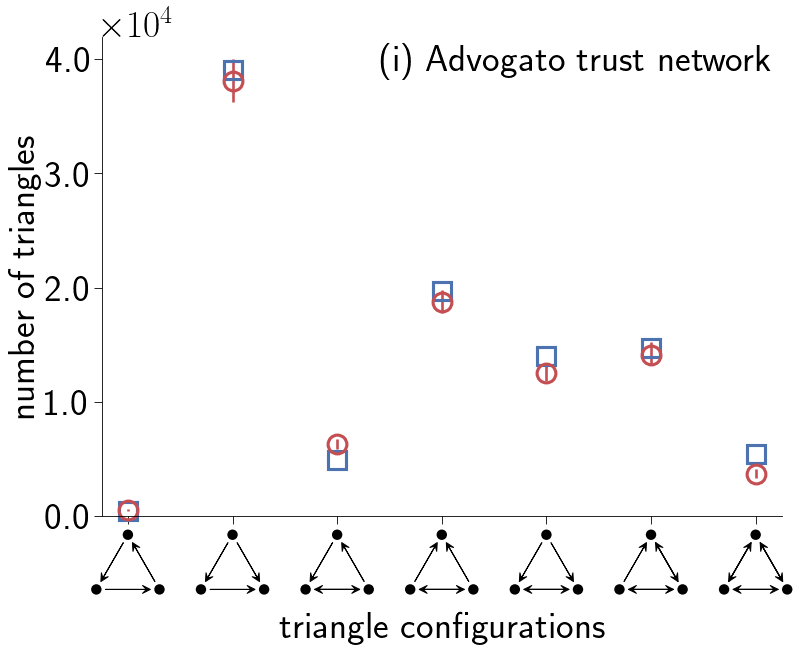

In [9]:
real_graph_name = "advogato"
DRS1model_graph_name = real_graph_name + "_00"

num_g_prop_filename = "../../directedS1_data/synthetic_networks/network_properties/" + DRS1model_graph_name + "_gprop.txt"
header = open(num_g_prop_filename, 'r').readline().replace('#', ' ').split()
num_g_prop = pd.read_table(num_g_prop_filename, names=header, comment="#", delimiter=r"\s+", index_col=0)

real_g_prop_filename = "../../directedS1_data/real_networks/network_properties/all_gprop.txt"
header = open(real_g_prop_filename, 'r').readline().replace('#', ' ').split()
real_g_prop = pd.read_table(real_g_prop_filename, names=header, comment="#", delimiter=r"\s+", index_col=0)

fig, ax = plt.subplots()

plot_real_triangle_spectra(ax, real_graph_name)
plot_num_triangle_spectra(ax, real_graph_name, offset=0.0)

plt.text(0.9875, 0.9875, r"{}".format(r"(i) Advogato trust network"),
         horizontalalignment="right", verticalalignment="top",
         fontsize='medium', transform=ax.transAxes)

cprops = {"facecolor":"k", "edgecolor":"None"}
aprops = {"color":"k", "length_includes_head":True, "overhang":0.5, "head_width":7.5, "head_length":7.5, "joinstyle":"round"}
draw_xlabels(ax, cprops, aprops, r=35, radius=5, offset_factor=1.75, DAwidth=40, DAheight=40, DAxdescent=20, DAydescent=20)

ax.set_ylim(bottom=0)
ax.set_ylabel("number of triangles")
ax.xaxis.labelpad = 80
# ax.ticklabel_format(axis='y', style='sci', scilimits=(0,0))

yfmt = ScalarFormatterForceFormat()
yfmt.set_powerlimits((0,0))
ax.yaxis.set_major_formatter(yfmt)

ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)

fig.savefig("../figures/pdf/figure_paper_" + DRS1model_graph_name + "_triangle_spectrum.pdf", bbox_inches='tight')
fig.savefig("../figures/svg/figure_paper_" + DRS1model_graph_name + "_triangle_spectrum.svg", bbox_inches='tight')

##### (i) manufacturing company email

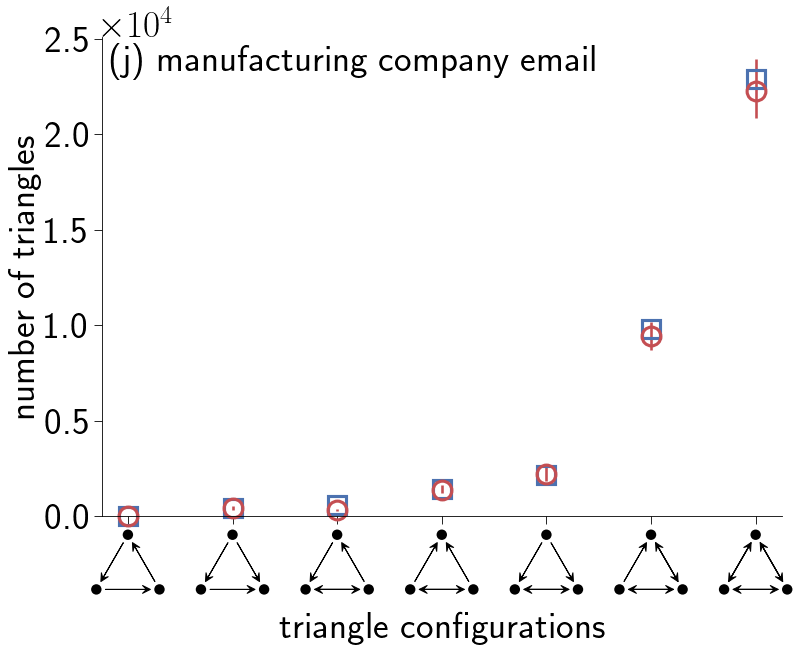

In [10]:
real_graph_name = "email_company"
DRS1model_graph_name = real_graph_name + "_beta1p50_00"

num_g_prop_filename = "../../directedS1_data/synthetic_networks/network_properties/" + DRS1model_graph_name + "_gprop.txt"
header = open(num_g_prop_filename, 'r').readline().replace('#', ' ').split()
num_g_prop = pd.read_table(num_g_prop_filename, names=header, comment="#", delimiter=r"\s+", index_col=0)

real_g_prop_filename = "../../directedS1_data/real_networks/network_properties/all_gprop.txt"
header = open(real_g_prop_filename, 'r').readline().replace('#', ' ').split()
real_g_prop = pd.read_table(real_g_prop_filename, names=header, comment="#", delimiter=r"\s+", index_col=0)

fig, ax = plt.subplots()

plot_real_triangle_spectra(ax, real_graph_name)
plot_num_triangle_spectra(ax, real_graph_name, offset=0.0)

plt.text(0.0125, 0.9875, r"{}".format(r"(j) manufacturing company email"),
         horizontalalignment="left", verticalalignment="top",
         fontsize='medium', transform=ax.transAxes)

cprops = {"facecolor":"k", "edgecolor":"None"}
aprops = {"color":"k", "length_includes_head":True, "overhang":0.5, "head_width":7.5, "head_length":7.5, "joinstyle":"round"}
draw_xlabels(ax, cprops, aprops, r=35, radius=5, offset_factor=1.75, DAwidth=40, DAheight=40, DAxdescent=20, DAydescent=20)

ax.set_ylim(bottom=0)
ax.set_ylabel("number of triangles")
ax.xaxis.labelpad = 80
# ax.ticklabel_format(axis='y', style='sci', scilimits=(0,0))

yfmt = ScalarFormatterForceFormat()
yfmt.set_powerlimits((0,0))
ax.yaxis.set_major_formatter(yfmt)

ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)

fig.savefig("../figures/pdf/figure_paper_" + DRS1model_graph_name + "_triangle_spectrum.pdf", bbox_inches='tight')
fig.savefig("../figures/svg/figure_paper_" + DRS1model_graph_name + "_triangle_spectrum.svg", bbox_inches='tight')

##### (j) primary school contacts

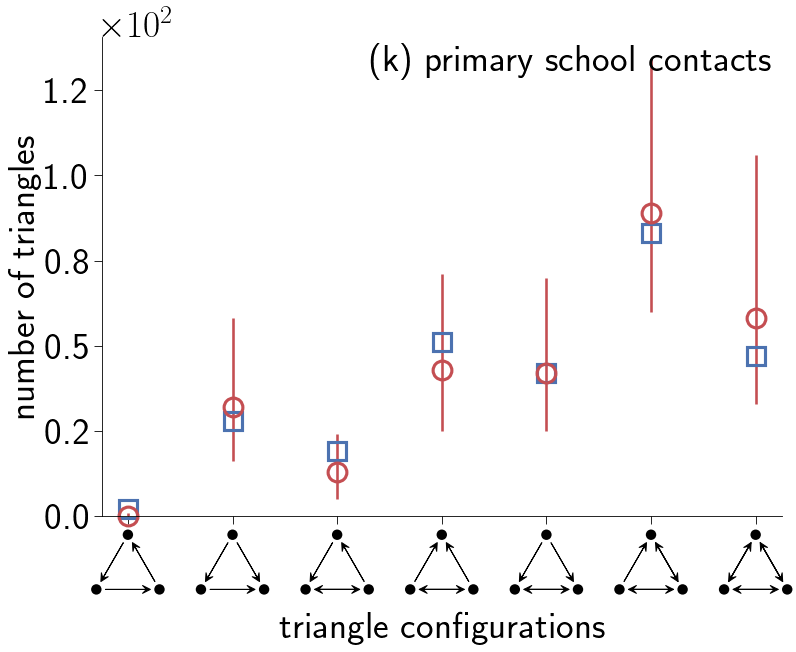

In [11]:
real_graph_name = "sp_high_school_diaries"
DRS1model_graph_name = real_graph_name + "_00"

num_g_prop_filename = "../../directedS1_data/synthetic_networks/network_properties/" + DRS1model_graph_name + "_gprop.txt"
header = open(num_g_prop_filename, 'r').readline().replace('#', ' ').split()
num_g_prop = pd.read_table(num_g_prop_filename, names=header, comment="#", delimiter=r"\s+", index_col=0)

real_g_prop_filename = "../../directedS1_data/real_networks/network_properties/all_gprop.txt"
header = open(real_g_prop_filename, 'r').readline().replace('#', ' ').split()
real_g_prop = pd.read_table(real_g_prop_filename, names=header, comment="#", delimiter=r"\s+", index_col=0)

fig, ax = plt.subplots()

plot_real_triangle_spectra(ax, real_graph_name)
plot_num_triangle_spectra(ax, real_graph_name, offset=0.0)

plt.text(0.9875, 0.9875, r"{}".format(r"(k) primary school contacts"),
         horizontalalignment="right", verticalalignment="top",
         fontsize='medium', transform=ax.transAxes)

cprops = {"facecolor":"k", "edgecolor":"None"}
aprops = {"color":"k", "length_includes_head":True, "overhang":0.5, "head_width":7.5, "head_length":7.5, "joinstyle":"round"}
draw_xlabels(ax, cprops, aprops, r=35, radius=5, offset_factor=1.75, DAwidth=40, DAheight=40, DAxdescent=20, DAydescent=20)

ax.set_ylim(bottom=0)
ax.set_ylabel("number of triangles")
ax.xaxis.labelpad = 80
# ax.ticklabel_format(axis='y', style='sci', scilimits=(0,0))

yfmt = ScalarFormatterForceFormat()
yfmt.set_powerlimits((0,0))
ax.yaxis.set_major_formatter(yfmt)

ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)

fig.savefig("../figures/pdf/figure_paper_" + DRS1model_graph_name + "_triangle_spectrum.pdf", bbox_inches='tight')
fig.savefig("../figures/svg/figure_paper_" + DRS1model_graph_name + "_triangle_spectrum.svg", bbox_inches='tight')

##### (k) U.S. government agency websites

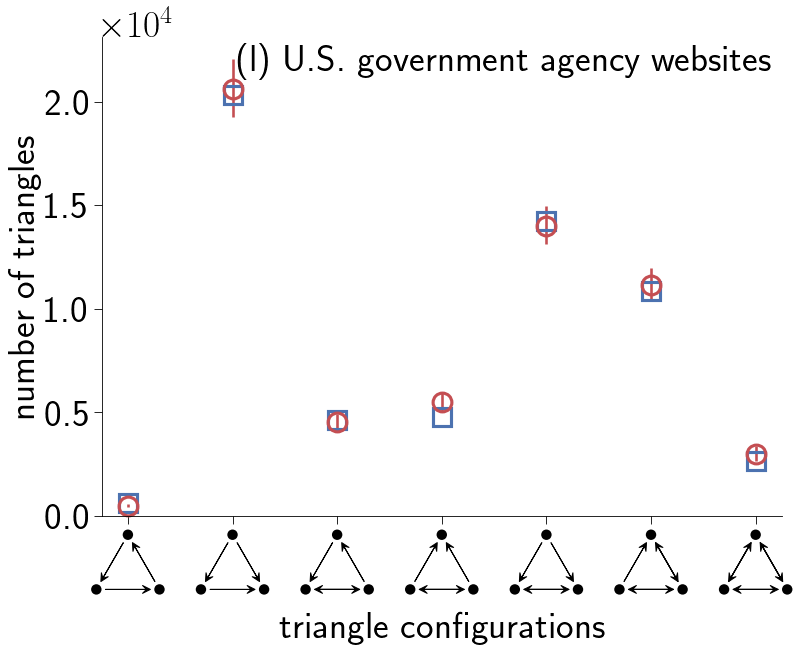

In [12]:
real_graph_name = "us_agencies_washington"
DRS1model_graph_name = real_graph_name + "_00"

num_g_prop_filename = "../../directedS1_data/synthetic_networks/network_properties/" + DRS1model_graph_name + "_gprop.txt"
header = open(num_g_prop_filename, 'r').readline().replace('#', ' ').split()
num_g_prop = pd.read_table(num_g_prop_filename, names=header, comment="#", delimiter=r"\s+", index_col=0)

real_g_prop_filename = "../../directedS1_data/real_networks/network_properties/all_gprop.txt"
header = open(real_g_prop_filename, 'r').readline().replace('#', ' ').split()
real_g_prop = pd.read_table(real_g_prop_filename, names=header, comment="#", delimiter=r"\s+", index_col=0)

fig, ax = plt.subplots()

plot_real_triangle_spectra(ax, real_graph_name)
plot_num_triangle_spectra(ax, real_graph_name, offset=0.0)

plt.text(0.9875, 0.9875, r"{}".format(r"(l) U.S. government agency websites"),
         horizontalalignment="right", verticalalignment="top",
         fontsize='medium', transform=ax.transAxes)

cprops = {"facecolor":"k", "edgecolor":"None"}
aprops = {"color":"k", "length_includes_head":True, "overhang":0.5, "head_width":7.5, "head_length":7.5, "joinstyle":"round"}
draw_xlabels(ax, cprops, aprops, r=35, radius=5, offset_factor=1.75, DAwidth=40, DAheight=40, DAxdescent=20, DAydescent=20)

ax.set_ylim(bottom=0)
ax.set_ylabel("number of triangles")
ax.xaxis.labelpad = 80
# ax.ticklabel_format(axis='y', style='sci', scilimits=(0,0))

yfmt = ScalarFormatterForceFormat()
yfmt.set_powerlimits((0,0))
ax.yaxis.set_major_formatter(yfmt)

ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)

fig.savefig("../figures/pdf/figure_paper_" + DRS1model_graph_name + "_triangle_spectrum.pdf", bbox_inches='tight')
fig.savefig("../figures/svg/figure_paper_" + DRS1model_graph_name + "_triangle_spectrum.svg", bbox_inches='tight')

##### (l) Frienship network

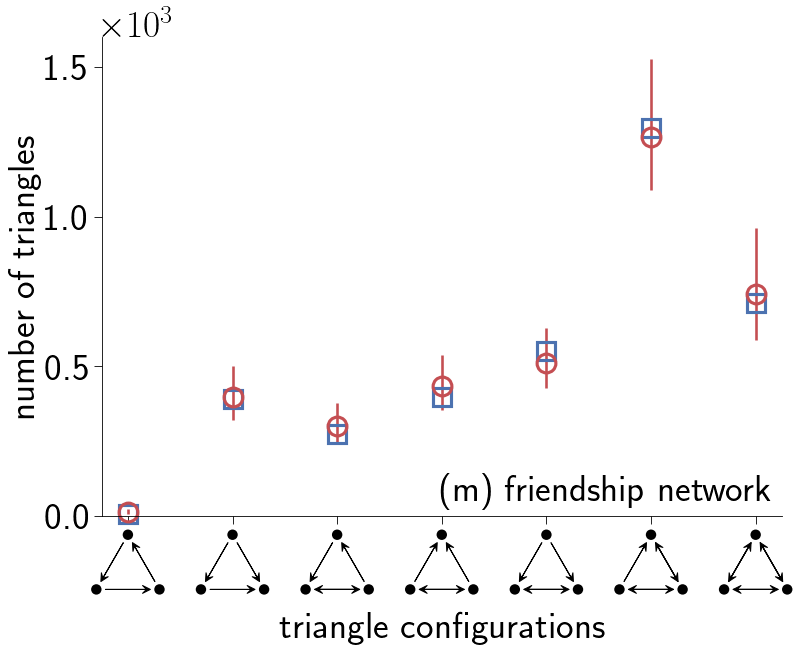

In [13]:
real_graph_name = "residence_hall"
DRS1model_graph_name = real_graph_name + "_00"

num_g_prop_filename = "../../directedS1_data/synthetic_networks/network_properties/" + DRS1model_graph_name + "_gprop.txt"
header = open(num_g_prop_filename, 'r').readline().replace('#', ' ').split()
num_g_prop = pd.read_table(num_g_prop_filename, names=header, comment="#", delimiter=r"\s+", index_col=0)

real_g_prop_filename = "../../directedS1_data/real_networks/network_properties/all_gprop.txt"
header = open(real_g_prop_filename, 'r').readline().replace('#', ' ').split()
real_g_prop = pd.read_table(real_g_prop_filename, names=header, comment="#", delimiter=r"\s+", index_col=0)

fig, ax = plt.subplots()

plot_real_triangle_spectra(ax, real_graph_name)
plot_num_triangle_spectra(ax, real_graph_name, offset=0.0)

plt.text(0.9875, 0.0125, r"{}".format(r"(m) friendship network"),
         horizontalalignment="right", verticalalignment="bottom",
         fontsize='medium', transform=ax.transAxes)

cprops = {"facecolor":"k", "edgecolor":"None"}
aprops = {"color":"k", "length_includes_head":True, "overhang":0.5, "head_width":7.5, "head_length":7.5, "joinstyle":"round"}
draw_xlabels(ax, cprops, aprops, r=35, radius=5, offset_factor=1.75, DAwidth=40, DAheight=40, DAxdescent=20, DAydescent=20)

ax.set_ylim(bottom=0)
ax.set_ylabel("number of triangles")#, fontsize="large")
ax.xaxis.labelpad = 80
# ax.ticklabel_format(axis='y', style='sci', scilimits=(0,0))

yfmt = ScalarFormatterForceFormat()
yfmt.set_powerlimits((0,0))
ax.yaxis.set_major_formatter(yfmt)

ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)

# ax.legend(loc="upper left")

fig.savefig("../figures/pdf/figure_paper_" + DRS1model_graph_name + "_triangle_spectrum.pdf", bbox_inches='tight')
fig.savefig("../figures/svg/figure_paper_" + DRS1model_graph_name + "_triangle_spectrum.svg", bbox_inches='tight')

### Figure S2

##### (a) C. elegans connectome

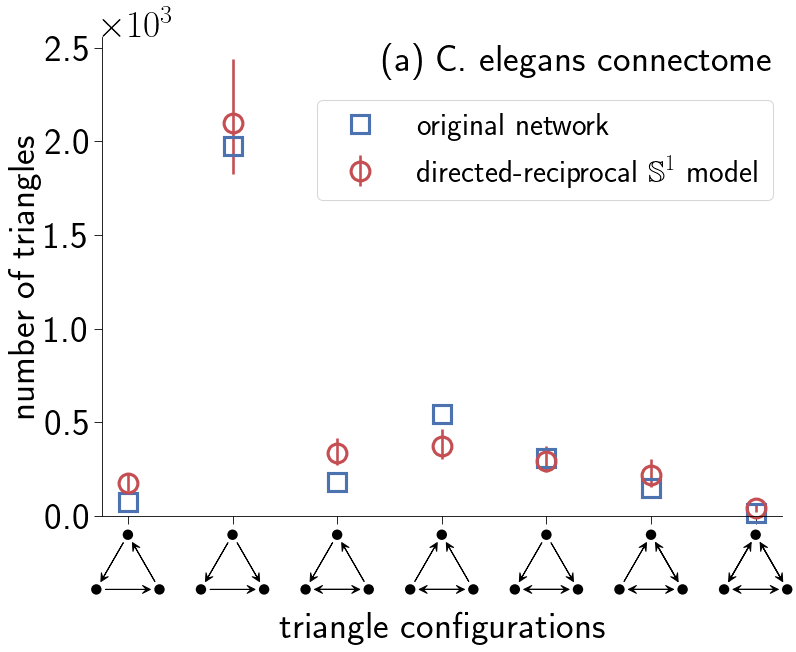

In [14]:
real_graph_name = "celegansneural"
DRS1model_graph_name = real_graph_name + "_00"

num_g_prop_filename = "../../directedS1_data/synthetic_networks/network_properties/" + DRS1model_graph_name + "_gprop.txt"
header = open(num_g_prop_filename, 'r').readline().replace('#', ' ').split()
num_g_prop = pd.read_table(num_g_prop_filename, names=header, comment="#", delimiter=r"\s+", index_col=0)

real_g_prop_filename = "../../directedS1_data/real_networks/network_properties/all_gprop.txt"
header = open(real_g_prop_filename, 'r').readline().replace('#', ' ').split()
real_g_prop = pd.read_table(real_g_prop_filename, names=header, comment="#", delimiter=r"\s+", index_col=0)

fig, ax = plt.subplots()

plot_real_triangle_spectra(ax, real_graph_name)
plot_num_triangle_spectra(ax, real_graph_name, offset=0.0)

plt.text(0.9875, 0.9875, r"{}".format(r"(a) C. elegans connectome"),
         horizontalalignment="right", verticalalignment="top",
         fontsize='medium', transform=ax.transAxes)

cprops = {"facecolor":"k", "edgecolor":"None"}
aprops = {"color":"k", "length_includes_head":True, "overhang":0.5, "head_width":7.5, "head_length":7.5, "joinstyle":"round"}
draw_xlabels(ax, cprops, aprops, r=35, radius=5, offset_factor=1.75, DAwidth=40, DAheight=40, DAxdescent=20, DAydescent=20)

ax.set_ylim(bottom=0)
ax.set_ylabel("number of triangles")
ax.xaxis.labelpad = 80
# ax.ticklabel_format(axis='y', style='sci', scilimits=(0,0))

yfmt = ScalarFormatterForceFormat()
yfmt.set_powerlimits((0,0))
ax.yaxis.set_major_formatter(yfmt)

ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)

ax.legend(loc="upper right", bbox_to_anchor=(1.01,0.9))

fig.savefig("../figures/pdf/figure_paper_" + DRS1model_graph_name + "_triangle_spectrum.pdf", bbox_inches='tight')
fig.savefig("../figures/svg/figure_paper_" + DRS1model_graph_name + "_triangle_spectrum.svg", bbox_inches='tight')

##### (b) email network (Uni. R-V, Spain)

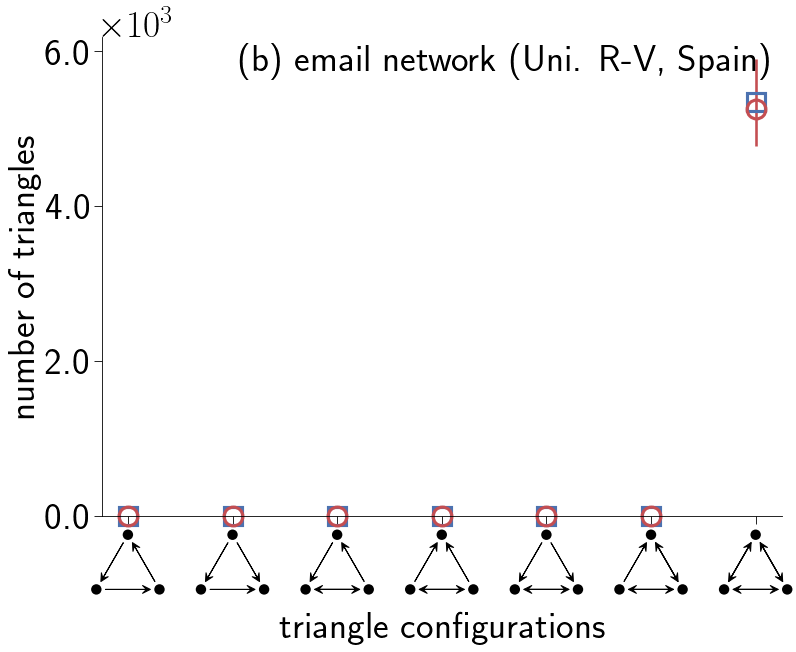

In [15]:
real_graph_name = "uni_email"
DRS1model_graph_name = real_graph_name + "_beta1p45_00"

num_g_prop_filename = "../../directedS1_data/synthetic_networks/network_properties/" + DRS1model_graph_name + "_gprop.txt"
header = open(num_g_prop_filename, 'r').readline().replace('#', ' ').split()
num_g_prop = pd.read_table(num_g_prop_filename, names=header, comment="#", delimiter=r"\s+", index_col=0)

real_g_prop_filename = "../../directedS1_data/real_networks/network_properties/all_gprop.txt"
header = open(real_g_prop_filename, 'r').readline().replace('#', ' ').split()
real_g_prop = pd.read_table(real_g_prop_filename, names=header, comment="#", delimiter=r"\s+", index_col=0)

fig, ax = plt.subplots()

plot_real_triangle_spectra(ax, real_graph_name)
plot_num_triangle_spectra(ax, real_graph_name, offset=0.0)

plt.text(0.9875, 0.9875, r"{}".format(r"(b) email network (Uni. R-V, Spain)"),
         horizontalalignment="right", verticalalignment="top",
         fontsize='medium', transform=ax.transAxes)

cprops = {"facecolor":"k", "edgecolor":"None"}
aprops = {"color":"k", "length_includes_head":True, "overhang":0.5, "head_width":7.5, "head_length":7.5, "joinstyle":"round"}
draw_xlabels(ax, cprops, aprops, r=35, radius=5, offset_factor=1.75, DAwidth=40, DAheight=40, DAxdescent=20, DAydescent=20)

ax.set_ylim(bottom=0)
ax.set_ylabel("number of triangles")
ax.xaxis.labelpad = 80
# ax.ticklabel_format(axis='y', style='sci', scilimits=(0,0))

yfmt = ScalarFormatterForceFormat()
yfmt.set_powerlimits((0,0))
ax.yaxis.set_major_formatter(yfmt)

ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)

fig.savefig("../figures/pdf/figure_paper_" + DRS1model_graph_name + "_triangle_spectrum.pdf", bbox_inches='tight')
fig.savefig("../figures/svg/figure_paper_" + DRS1model_graph_name + "_triangle_spectrum.svg", bbox_inches='tight')

##### (c) frienship network 2

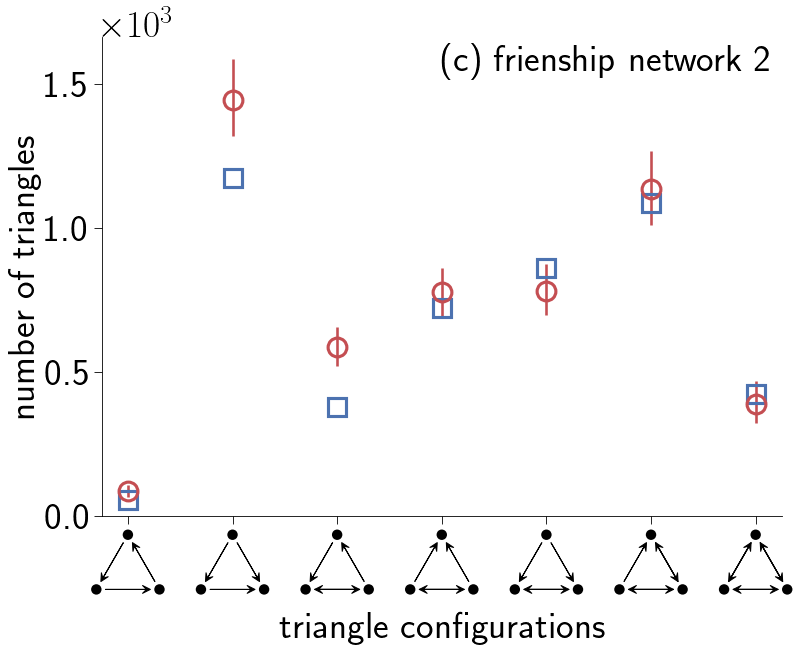

In [16]:
real_graph_name = "add_health_comm50"
DRS1model_graph_name = real_graph_name + "_beta1p40_00"

num_g_prop_filename = "../../directedS1_data/synthetic_networks/network_properties/" + DRS1model_graph_name + "_gprop.txt"
header = open(num_g_prop_filename, 'r').readline().replace('#', ' ').split()
num_g_prop = pd.read_table(num_g_prop_filename, names=header, comment="#", delimiter=r"\s+", index_col=0)

real_g_prop_filename = "../../directedS1_data/real_networks/network_properties/all_gprop.txt"
header = open(real_g_prop_filename, 'r').readline().replace('#', ' ').split()
real_g_prop = pd.read_table(real_g_prop_filename, names=header, comment="#", delimiter=r"\s+", index_col=0)

fig, ax = plt.subplots()

plot_real_triangle_spectra(ax, real_graph_name)
plot_num_triangle_spectra(ax, real_graph_name, offset=0.0)

plt.text(0.9875, 0.9875, r"{}".format(r"(c) frienship network 2"),
         horizontalalignment="right", verticalalignment="top",
         fontsize='medium', transform=ax.transAxes)

cprops = {"facecolor":"k", "edgecolor":"None"}
aprops = {"color":"k", "length_includes_head":True, "overhang":0.5, "head_width":7.5, "head_length":7.5, "joinstyle":"round"}
draw_xlabels(ax, cprops, aprops, r=35, radius=5, offset_factor=1.75, DAwidth=40, DAheight=40, DAxdescent=20, DAydescent=20)

ax.set_ylim(bottom=0)
ax.set_ylabel("number of triangles")
ax.xaxis.labelpad = 80
# ax.ticklabel_format(axis='y', style='sci', scilimits=(0,0))

yfmt = ScalarFormatterForceFormat()
yfmt.set_powerlimits((0,0))
ax.yaxis.set_major_formatter(yfmt)

ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)

fig.savefig("../figures/pdf/figure_paper_" + DRS1model_graph_name + "_triangle_spectrum.pdf", bbox_inches='tight')
fig.savefig("../figures/svg/figure_paper_" + DRS1model_graph_name + "_triangle_spectrum.svg", bbox_inches='tight')

##### (d) Messel Shale food web

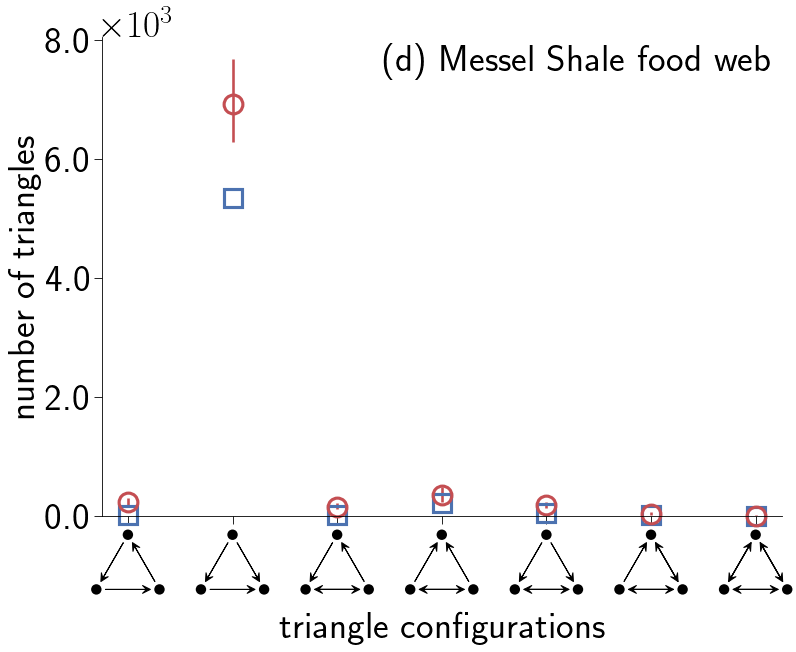

In [17]:
real_graph_name = "messal_shale"
DRS1model_graph_name = real_graph_name + "_00"

num_g_prop_filename = "../../directedS1_data/synthetic_networks/network_properties/" + DRS1model_graph_name + "_gprop.txt"
header = open(num_g_prop_filename, 'r').readline().replace('#', ' ').split()
num_g_prop = pd.read_table(num_g_prop_filename, names=header, comment="#", delimiter=r"\s+", index_col=0)

real_g_prop_filename = "../../directedS1_data/real_networks/network_properties/all_gprop.txt"
header = open(real_g_prop_filename, 'r').readline().replace('#', ' ').split()
real_g_prop = pd.read_table(real_g_prop_filename, names=header, comment="#", delimiter=r"\s+", index_col=0)

fig, ax = plt.subplots()

plot_real_triangle_spectra(ax, real_graph_name)
plot_num_triangle_spectra(ax, real_graph_name, offset=0.0)

plt.text(0.9875, 0.9875, r"{}".format(r"(d) Messel Shale food web"),
         horizontalalignment="right", verticalalignment="top",
         fontsize='medium', transform=ax.transAxes)

cprops = {"facecolor":"k", "edgecolor":"None"}
aprops = {"color":"k", "length_includes_head":True, "overhang":0.5, "head_width":7.5, "head_length":7.5, "joinstyle":"round"}
draw_xlabels(ax, cprops, aprops, r=35, radius=5, offset_factor=1.75, DAwidth=40, DAheight=40, DAxdescent=20, DAydescent=20)

ax.set_ylim(bottom=0)
ax.set_ylabel("number of triangles")
ax.xaxis.labelpad = 80
# ax.ticklabel_format(axis='y', style='sci', scilimits=(0,0))

yfmt = ScalarFormatterForceFormat()
yfmt.set_powerlimits((0,0))
ax.yaxis.set_major_formatter(yfmt)

ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)

fig.savefig("../figures/pdf/figure_paper_" + DRS1model_graph_name + "_triangle_spectrum.pdf", bbox_inches='tight')
fig.savefig("../figures/svg/figure_paper_" + DRS1model_graph_name + "_triangle_spectrum.svg", bbox_inches='tight')

##### (e) E. coli transcription network

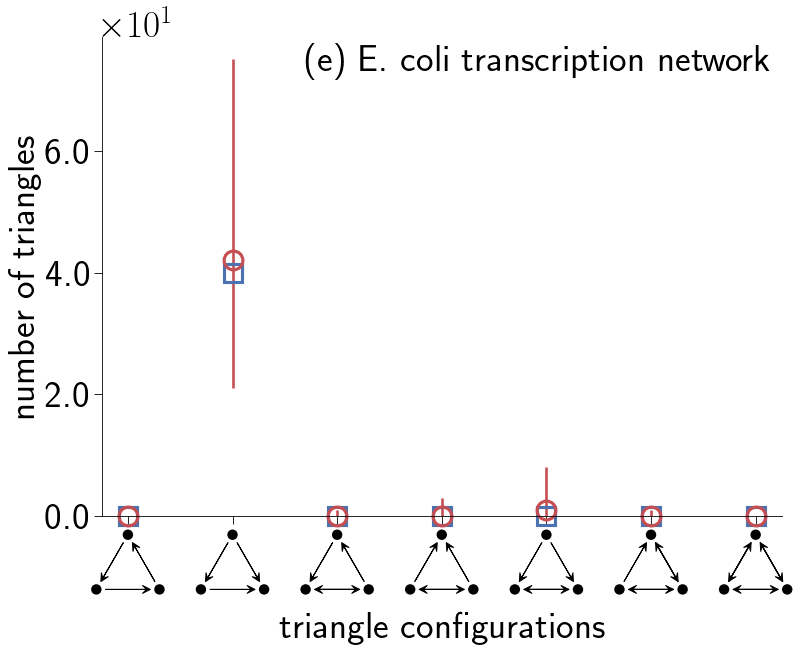

In [18]:
real_graph_name = "ecoli_transcription_v1_0"
DRS1model_graph_name = real_graph_name + "_beta1p50_00"

num_g_prop_filename = "../../directedS1_data/synthetic_networks/network_properties/" + DRS1model_graph_name + "_gprop.txt"
header = open(num_g_prop_filename, 'r').readline().replace('#', ' ').split()
num_g_prop = pd.read_table(num_g_prop_filename, names=header, comment="#", delimiter=r"\s+", index_col=0)

real_g_prop_filename = "../../directedS1_data/real_networks/network_properties/all_gprop.txt"
header = open(real_g_prop_filename, 'r').readline().replace('#', ' ').split()
real_g_prop = pd.read_table(real_g_prop_filename, names=header, comment="#", delimiter=r"\s+", index_col=0)

fig, ax = plt.subplots()

plot_real_triangle_spectra(ax, real_graph_name)
plot_num_triangle_spectra(ax, real_graph_name, offset=0.0)

plt.text(0.9875, 0.9875, r"{}".format(r"(e) E. coli transcription network"),
         horizontalalignment="right", verticalalignment="top",
         fontsize='medium', transform=ax.transAxes)

cprops = {"facecolor":"k", "edgecolor":"None"}
aprops = {"color":"k", "length_includes_head":True, "overhang":0.5, "head_width":7.5, "head_length":7.5, "joinstyle":"round"}
draw_xlabels(ax, cprops, aprops, r=35, radius=5, offset_factor=1.75, DAwidth=40, DAheight=40, DAxdescent=20, DAydescent=20)

ax.set_ylim(bottom=0)
ax.set_ylabel("number of triangles")
ax.xaxis.labelpad = 80
# ax.ticklabel_format(axis='y', style='sci', scilimits=(0,0))

yfmt = ScalarFormatterForceFormat()
yfmt.set_powerlimits((0,0))
ax.yaxis.set_major_formatter(yfmt)

ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)

fig.savefig("../figures/pdf/figure_paper_" + DRS1model_graph_name + "_triangle_spectrum.pdf", bbox_inches='tight')
fig.savefig("../figures/svg/figure_paper_" + DRS1model_graph_name + "_triangle_spectrum.svg", bbox_inches='tight')

##### (f) Copenhagen networks study (calls)

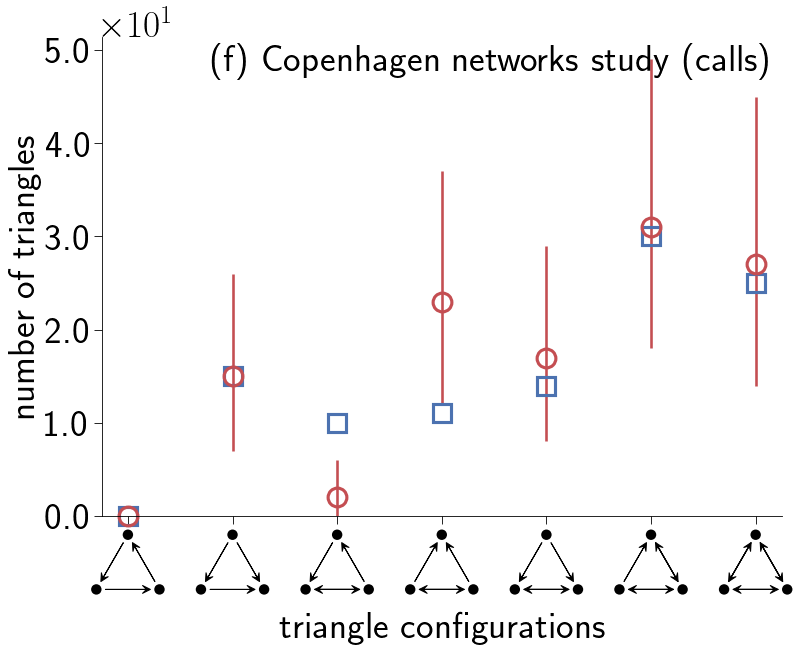

In [19]:
real_graph_name = "copenhagen_calls"
DRS1model_graph_name = real_graph_name + "_beta1p50_00"

num_g_prop_filename = "../../directedS1_data/synthetic_networks/network_properties/" + DRS1model_graph_name + "_gprop.txt"
header = open(num_g_prop_filename, 'r').readline().replace('#', ' ').split()
num_g_prop = pd.read_table(num_g_prop_filename, names=header, comment="#", delimiter=r"\s+", index_col=0)

real_g_prop_filename = "../../directedS1_data/real_networks/network_properties/all_gprop.txt"
header = open(real_g_prop_filename, 'r').readline().replace('#', ' ').split()
real_g_prop = pd.read_table(real_g_prop_filename, names=header, comment="#", delimiter=r"\s+", index_col=0)

fig, ax = plt.subplots()

plot_real_triangle_spectra(ax, real_graph_name)
plot_num_triangle_spectra(ax, real_graph_name, offset=0.0)

plt.text(0.9875, 0.9875, r"{}".format(r"(f) Copenhagen networks study (calls)"),
         horizontalalignment="right", verticalalignment="top",
         fontsize='medium', transform=ax.transAxes)

cprops = {"facecolor":"k", "edgecolor":"None"}
aprops = {"color":"k", "length_includes_head":True, "overhang":0.5, "head_width":7.5, "head_length":7.5, "joinstyle":"round"}
draw_xlabels(ax, cprops, aprops, r=35, radius=5, offset_factor=1.75, DAwidth=40, DAheight=40, DAxdescent=20, DAydescent=20)

ax.set_ylim(bottom=0)
ax.set_ylabel("number of triangles")
ax.xaxis.labelpad = 80
# ax.ticklabel_format(axis='y', style='sci', scilimits=(0,0))

yfmt = ScalarFormatterForceFormat()
yfmt.set_powerlimits((0,0))
ax.yaxis.set_major_formatter(yfmt)

ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)

fig.savefig("../figures/pdf/figure_paper_" + DRS1model_graph_name + "_triangle_spectrum.pdf", bbox_inches='tight')
fig.savefig("../figures/svg/figure_paper_" + DRS1model_graph_name + "_triangle_spectrum.svg", bbox_inches='tight')

##### (g) U.S. government agency websites (VT)

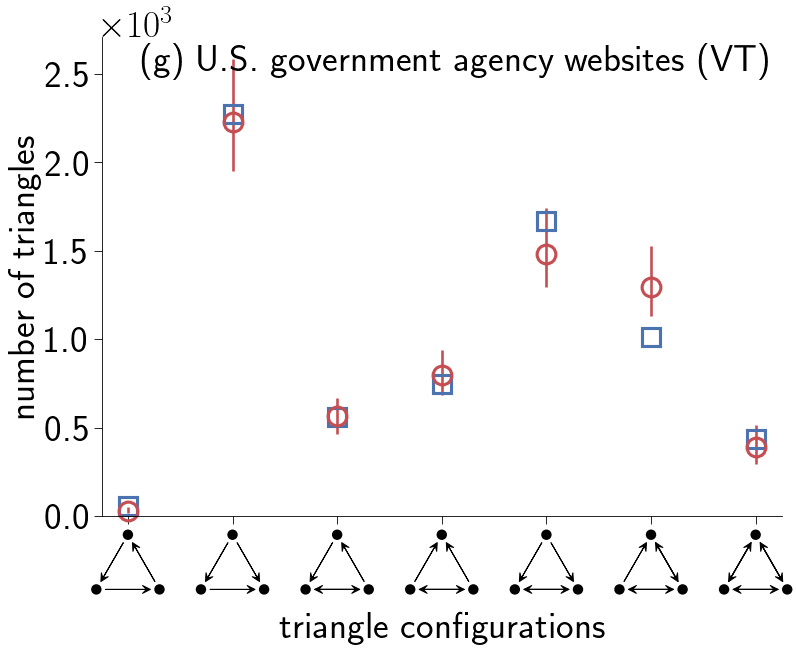

In [20]:
real_graph_name = "us_agencies_vermont"
DRS1model_graph_name = real_graph_name + "_beta2p00_00"

num_g_prop_filename = "../../directedS1_data/synthetic_networks/network_properties/" + DRS1model_graph_name + "_gprop.txt"
header = open(num_g_prop_filename, 'r').readline().replace('#', ' ').split()
num_g_prop = pd.read_table(num_g_prop_filename, names=header, comment="#", delimiter=r"\s+", index_col=0)

real_g_prop_filename = "../../directedS1_data/real_networks/network_properties/all_gprop.txt"
header = open(real_g_prop_filename, 'r').readline().replace('#', ' ').split()
real_g_prop = pd.read_table(real_g_prop_filename, names=header, comment="#", delimiter=r"\s+", index_col=0)

fig, ax = plt.subplots()

plot_real_triangle_spectra(ax, real_graph_name)
plot_num_triangle_spectra(ax, real_graph_name, offset=0.0)

plt.text(0.9875, 0.9875, r"{}".format(r"(g) U.S. government agency websites (VT)"),
         horizontalalignment="right", verticalalignment="top",
         fontsize='medium', transform=ax.transAxes)

cprops = {"facecolor":"k", "edgecolor":"None"}
aprops = {"color":"k", "length_includes_head":True, "overhang":0.5, "head_width":7.5, "head_length":7.5, "joinstyle":"round"}
draw_xlabels(ax, cprops, aprops, r=35, radius=5, offset_factor=1.75, DAwidth=40, DAheight=40, DAxdescent=20, DAydescent=20)

ax.set_ylim(bottom=0)
ax.set_ylabel("number of triangles")
ax.xaxis.labelpad = 80
# ax.ticklabel_format(axis='y', style='sci', scilimits=(0,0))

yfmt = ScalarFormatterForceFormat()
yfmt.set_powerlimits((0,0))
ax.yaxis.set_major_formatter(yfmt)

ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)

fig.savefig("../figures/pdf/figure_paper_" + DRS1model_graph_name + "_triangle_spectrum.pdf", bbox_inches='tight')
fig.savefig("../figures/svg/figure_paper_" + DRS1model_graph_name + "_triangle_spectrum.svg", bbox_inches='tight')

##### (h) physician trust network

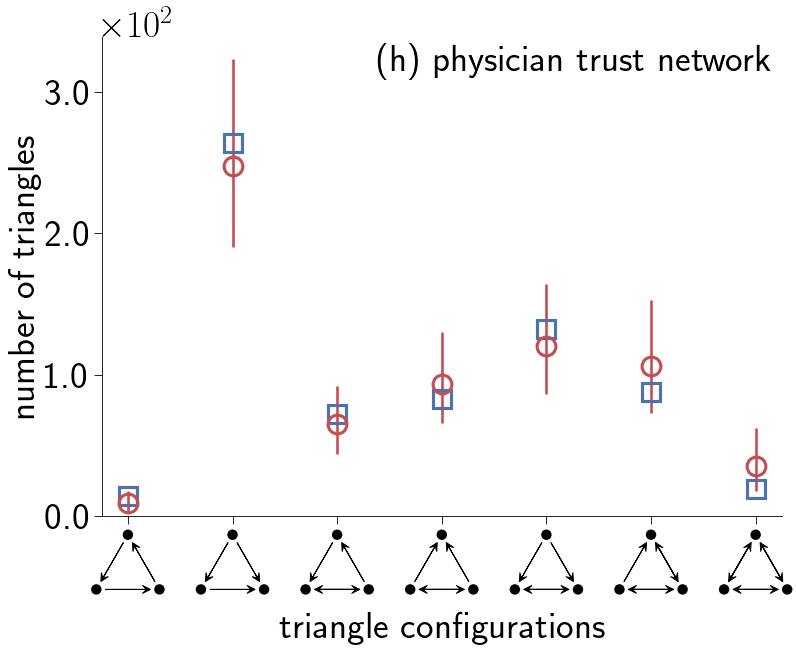

In [21]:
real_graph_name = "physician_trust"
DRS1model_graph_name = real_graph_name + "_00"

num_g_prop_filename = "../../directedS1_data/synthetic_networks/network_properties/" + DRS1model_graph_name + "_gprop.txt"
header = open(num_g_prop_filename, 'r').readline().replace('#', ' ').split()
num_g_prop = pd.read_table(num_g_prop_filename, names=header, comment="#", delimiter=r"\s+", index_col=0)

real_g_prop_filename = "../../directedS1_data/real_networks/network_properties/all_gprop.txt"
header = open(real_g_prop_filename, 'r').readline().replace('#', ' ').split()
real_g_prop = pd.read_table(real_g_prop_filename, names=header, comment="#", delimiter=r"\s+", index_col=0)

fig, ax = plt.subplots()

plot_real_triangle_spectra(ax, real_graph_name)
plot_num_triangle_spectra(ax, real_graph_name, offset=0.0)

plt.text(0.9875, 0.9875, r"{}".format(r"(h) physician trust network"),
         horizontalalignment="right", verticalalignment="top",
         fontsize='medium', transform=ax.transAxes)

cprops = {"facecolor":"k", "edgecolor":"None"}
aprops = {"color":"k", "length_includes_head":True, "overhang":0.5, "head_width":7.5, "head_length":7.5, "joinstyle":"round"}
draw_xlabels(ax, cprops, aprops, r=35, radius=5, offset_factor=1.75, DAwidth=40, DAheight=40, DAxdescent=20, DAydescent=20)

ax.set_ylim(bottom=0)
ax.set_ylabel("number of triangles")
ax.xaxis.labelpad = 80
# ax.ticklabel_format(axis='y', style='sci', scilimits=(0,0))

yfmt = ScalarFormatterForceFormat()
yfmt.set_powerlimits((0,0))
ax.yaxis.set_major_formatter(yfmt)

ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)

fig.savefig("../figures/pdf/figure_paper_" + DRS1model_graph_name + "_triangle_spectrum.pdf", bbox_inches='tight')
fig.savefig("../figures/svg/figure_paper_" + DRS1model_graph_name + "_triangle_spectrum.svg", bbox_inches='tight')

##### (i) UN migration stock

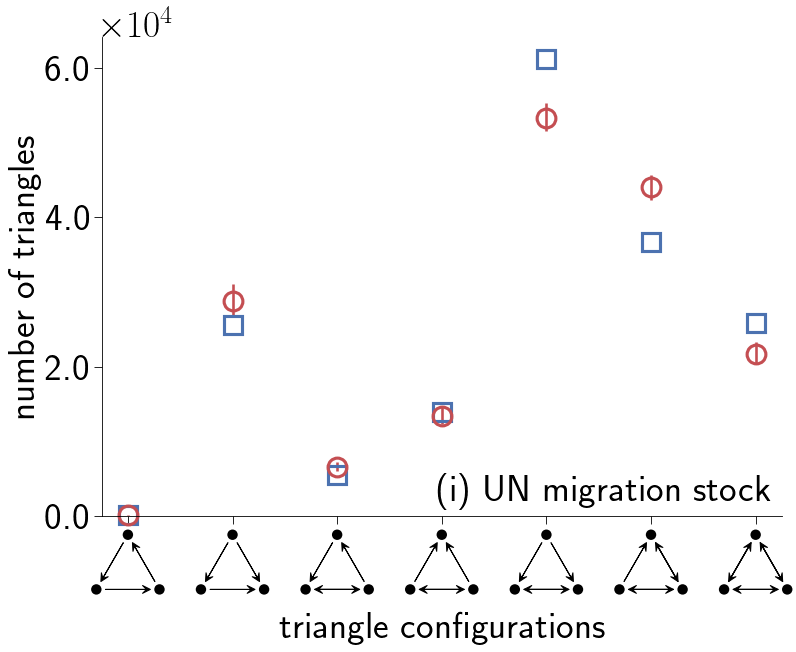

In [22]:
real_graph_name = "un_migrations"
DRS1model_graph_name = real_graph_name + "_beta4p50_00"

num_g_prop_filename = "../../directedS1_data/synthetic_networks/network_properties/" + DRS1model_graph_name + "_gprop.txt"
header = open(num_g_prop_filename, 'r').readline().replace('#', ' ').split()
num_g_prop = pd.read_table(num_g_prop_filename, names=header, comment="#", delimiter=r"\s+", index_col=0)

real_g_prop_filename = "../../directedS1_data/real_networks/network_properties/all_gprop.txt"
header = open(real_g_prop_filename, 'r').readline().replace('#', ' ').split()
real_g_prop = pd.read_table(real_g_prop_filename, names=header, comment="#", delimiter=r"\s+", index_col=0)

fig, ax = plt.subplots()

plot_real_triangle_spectra(ax, real_graph_name)
plot_num_triangle_spectra(ax, real_graph_name, offset=0.0)

plt.text(0.9875, 0.0125, r"{}".format(r"(i) UN migration stock"),
         horizontalalignment="right", verticalalignment="bottom",
         fontsize='medium', transform=ax.transAxes)

cprops = {"facecolor":"k", "edgecolor":"None"}
aprops = {"color":"k", "length_includes_head":True, "overhang":0.5, "head_width":7.5, "head_length":7.5, "joinstyle":"round"}
draw_xlabels(ax, cprops, aprops, r=35, radius=5, offset_factor=1.75, DAwidth=40, DAheight=40, DAxdescent=20, DAydescent=20)

ax.set_ylim(bottom=0)
ax.set_ylabel("number of triangles")
ax.xaxis.labelpad = 80
# ax.ticklabel_format(axis='y', style='sci', scilimits=(0,0))

yfmt = ScalarFormatterForceFormat()
yfmt.set_powerlimits((0,0))
ax.yaxis.set_major_formatter(yfmt)

ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)

fig.savefig("../figures/pdf/figure_paper_" + DRS1model_graph_name + "_triangle_spectrum.pdf", bbox_inches='tight')
fig.savefig("../figures/svg/figure_paper_" + DRS1model_graph_name + "_triangle_spectrum.svg", bbox_inches='tight')

##### (j) yeast transcription network

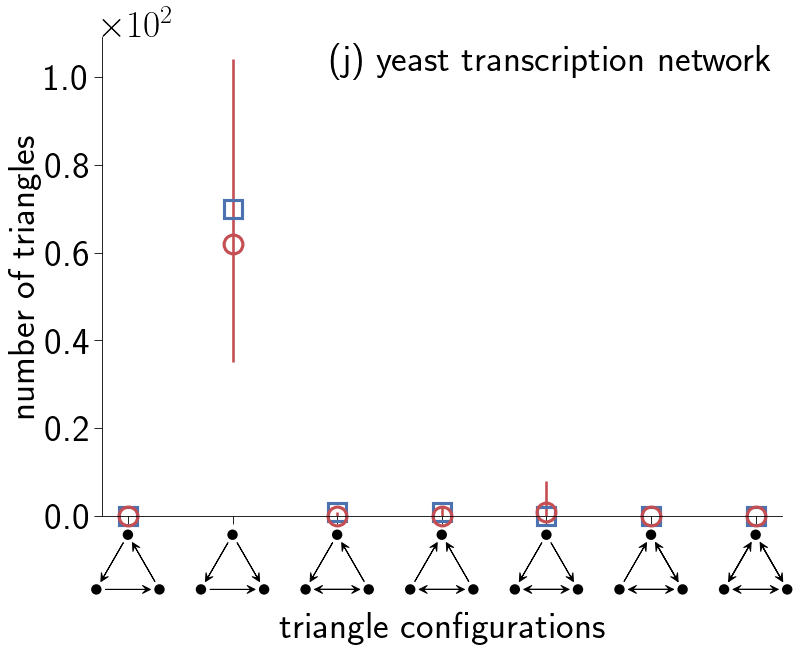

In [23]:
real_graph_name = "yeast_transcription"
DRS1model_graph_name = real_graph_name + "_beta1p20_00"

num_g_prop_filename = "../../directedS1_data/synthetic_networks/network_properties/" + DRS1model_graph_name + "_gprop.txt"
header = open(num_g_prop_filename, 'r').readline().replace('#', ' ').split()
num_g_prop = pd.read_table(num_g_prop_filename, names=header, comment="#", delimiter=r"\s+", index_col=0)

real_g_prop_filename = "../../directedS1_data/real_networks/network_properties/all_gprop.txt"
header = open(real_g_prop_filename, 'r').readline().replace('#', ' ').split()
real_g_prop = pd.read_table(real_g_prop_filename, names=header, comment="#", delimiter=r"\s+", index_col=0)

fig, ax = plt.subplots()

plot_real_triangle_spectra(ax, real_graph_name)
plot_num_triangle_spectra(ax, real_graph_name, offset=0.0)

plt.text(0.9875, 0.9875, r"{}".format(r"(j) yeast transcription network"),
         horizontalalignment="right", verticalalignment="top",
         fontsize='medium', transform=ax.transAxes)

cprops = {"facecolor":"k", "edgecolor":"None"}
aprops = {"color":"k", "length_includes_head":True, "overhang":0.5, "head_width":7.5, "head_length":7.5, "joinstyle":"round"}
draw_xlabels(ax, cprops, aprops, r=35, radius=5, offset_factor=1.75, DAwidth=40, DAheight=40, DAxdescent=20, DAydescent=20)

ax.set_ylim(bottom=0)
ax.set_ylabel("number of triangles")
ax.xaxis.labelpad = 80
# ax.ticklabel_format(axis='y', style='sci', scilimits=(0,0))

yfmt = ScalarFormatterForceFormat()
yfmt.set_powerlimits((0,0))
ax.yaxis.set_major_formatter(yfmt)

ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)

fig.savefig("../figures/pdf/figure_paper_" + DRS1model_graph_name + "_triangle_spectrum.pdf", bbox_inches='tight')
fig.savefig("../figures/svg/figure_paper_" + DRS1model_graph_name + "_triangle_spectrum.svg", bbox_inches='tight')

##### (k) FAA preferred routes

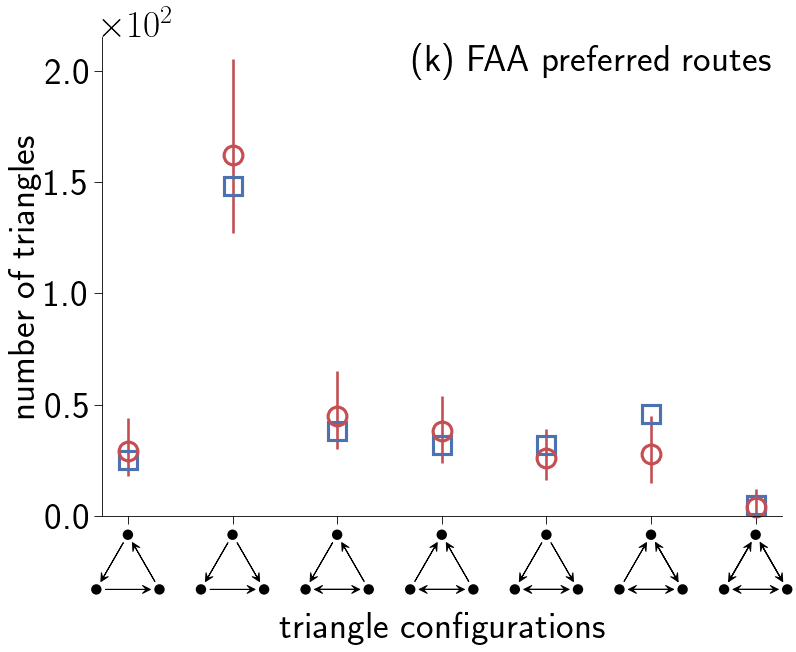

In [24]:
real_graph_name = "faa_routes"
DRS1model_graph_name = real_graph_name + "_00"

num_g_prop_filename = "../../directedS1_data/synthetic_networks/network_properties/" + DRS1model_graph_name + "_gprop.txt"
header = open(num_g_prop_filename, 'r').readline().replace('#', ' ').split()
num_g_prop = pd.read_table(num_g_prop_filename, names=header, comment="#", delimiter=r"\s+", index_col=0)

real_g_prop_filename = "../../directedS1_data/real_networks/network_properties/all_gprop.txt"
header = open(real_g_prop_filename, 'r').readline().replace('#', ' ').split()
real_g_prop = pd.read_table(real_g_prop_filename, names=header, comment="#", delimiter=r"\s+", index_col=0)

fig, ax = plt.subplots()

plot_real_triangle_spectra(ax, real_graph_name)
plot_num_triangle_spectra(ax, real_graph_name, offset=0.0)

plt.text(0.9875, 0.9875, r"{}".format(r"(k) FAA preferred routes"),
         horizontalalignment="right", verticalalignment="top",
         fontsize='medium', transform=ax.transAxes)

cprops = {"facecolor":"k", "edgecolor":"None"}
aprops = {"color":"k", "length_includes_head":True, "overhang":0.5, "head_width":7.5, "head_length":7.5, "joinstyle":"round"}
draw_xlabels(ax, cprops, aprops, r=35, radius=5, offset_factor=1.75, DAwidth=40, DAheight=40, DAxdescent=20, DAydescent=20)

ax.set_ylim(bottom=0)
ax.set_ylabel("number of triangles")
ax.xaxis.labelpad = 80
# ax.ticklabel_format(axis='y', style='sci', scilimits=(0,0))

yfmt = ScalarFormatterForceFormat()
yfmt.set_powerlimits((0,0))
ax.yaxis.set_major_formatter(yfmt)

ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)

fig.savefig("../figures/pdf/figure_paper_" + DRS1model_graph_name + "_triangle_spectrum.pdf", bbox_inches='tight')
fig.savefig("../figures/svg/figure_paper_" + DRS1model_graph_name + "_triangle_spectrum.svg", bbox_inches='tight')

##### (l) Copenhagen networks study (sms)

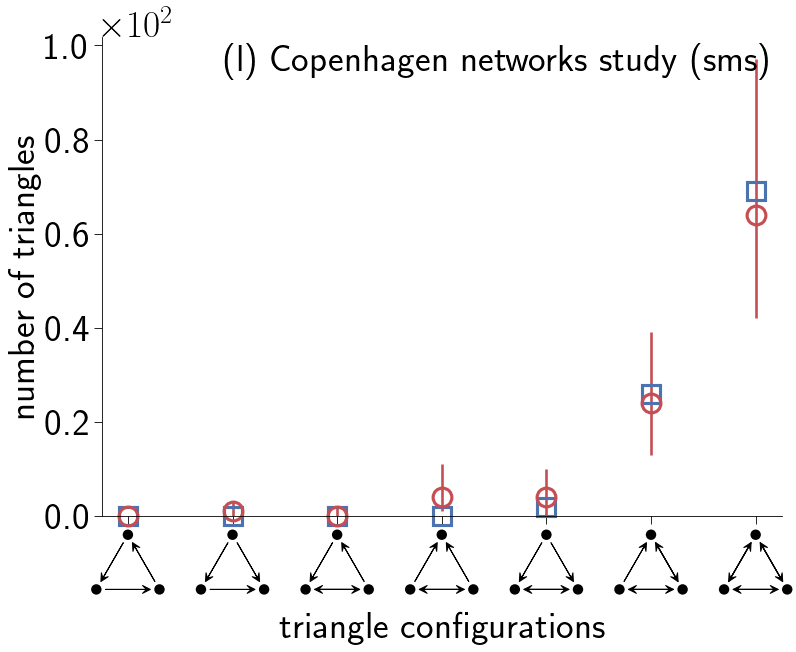

In [25]:
real_graph_name = "copenhagen_sms"
DRS1model_graph_name = real_graph_name + "_beta1p30_00"

num_g_prop_filename = "../../directedS1_data/synthetic_networks/network_properties/" + DRS1model_graph_name + "_gprop.txt"
header = open(num_g_prop_filename, 'r').readline().replace('#', ' ').split()
num_g_prop = pd.read_table(num_g_prop_filename, names=header, comment="#", delimiter=r"\s+", index_col=0)

real_g_prop_filename = "../../directedS1_data/real_networks/network_properties/all_gprop.txt"
header = open(real_g_prop_filename, 'r').readline().replace('#', ' ').split()
real_g_prop = pd.read_table(real_g_prop_filename, names=header, comment="#", delimiter=r"\s+", index_col=0)

fig, ax = plt.subplots()

plot_real_triangle_spectra(ax, real_graph_name)
plot_num_triangle_spectra(ax, real_graph_name, offset=0.0)

plt.text(0.9875, 0.9875, r"{}".format(r"(l) Copenhagen networks study (sms)"),
         horizontalalignment="right", verticalalignment="top",
         fontsize='medium', transform=ax.transAxes)

cprops = {"facecolor":"k", "edgecolor":"None"}
aprops = {"color":"k", "length_includes_head":True, "overhang":0.5, "head_width":7.5, "head_length":7.5, "joinstyle":"round"}
draw_xlabels(ax, cprops, aprops, r=35, radius=5, offset_factor=1.75, DAwidth=40, DAheight=40, DAxdescent=20, DAydescent=20)

ax.set_ylim(bottom=0)
ax.set_ylabel("number of triangles")
ax.xaxis.labelpad = 80
# ax.ticklabel_format(axis='y', style='sci', scilimits=(0,0))

yfmt = ScalarFormatterForceFormat()
yfmt.set_powerlimits((0,0))
ax.yaxis.set_major_formatter(yfmt)

ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)

fig.savefig("../figures/pdf/figure_paper_" + DRS1model_graph_name + "_triangle_spectrum.pdf", bbox_inches='tight')
fig.savefig("../figures/svg/figure_paper_" + DRS1model_graph_name + "_triangle_spectrum.svg", bbox_inches='tight')

##### (m) Figeys human interactome

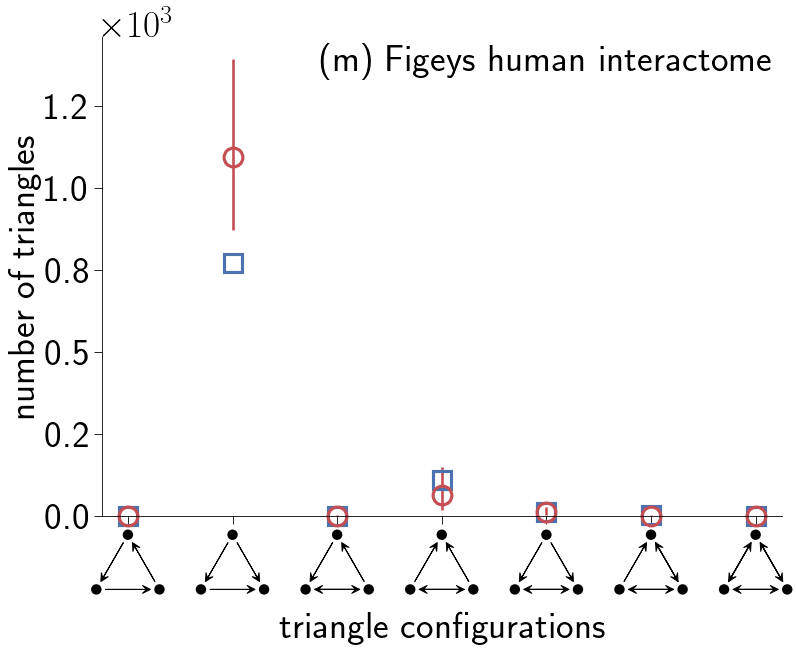

In [26]:
real_graph_name = "interactome_figeys"
DRS1model_graph_name = real_graph_name + "_beta1p01_00"

num_g_prop_filename = "../../directedS1_data/synthetic_networks/network_properties/" + DRS1model_graph_name + "_gprop.txt"
header = open(num_g_prop_filename, 'r').readline().replace('#', ' ').split()
num_g_prop = pd.read_table(num_g_prop_filename, names=header, comment="#", delimiter=r"\s+", index_col=0)

real_g_prop_filename = "../../directedS1_data/real_networks/network_properties/all_gprop.txt"
header = open(real_g_prop_filename, 'r').readline().replace('#', ' ').split()
real_g_prop = pd.read_table(real_g_prop_filename, names=header, comment="#", delimiter=r"\s+", index_col=0)

fig, ax = plt.subplots()

plot_real_triangle_spectra(ax, real_graph_name)
plot_num_triangle_spectra(ax, real_graph_name, offset=0.0)

plt.text(0.9875, 0.9875, r"{}".format(r"(m) Figeys human interactome"),
         horizontalalignment="right", verticalalignment="top",
         fontsize='medium', transform=ax.transAxes)

cprops = {"facecolor":"k", "edgecolor":"None"}
aprops = {"color":"k", "length_includes_head":True, "overhang":0.5, "head_width":7.5, "head_length":7.5, "joinstyle":"round"}
draw_xlabels(ax, cprops, aprops, r=35, radius=5, offset_factor=1.75, DAwidth=40, DAheight=40, DAxdescent=20, DAydescent=20)

ax.set_ylim(bottom=0)
ax.set_ylabel("number of triangles")
ax.xaxis.labelpad = 80
# ax.ticklabel_format(axis='y', style='sci', scilimits=(0,0))

yfmt = ScalarFormatterForceFormat()
yfmt.set_powerlimits((0,0))
ax.yaxis.set_major_formatter(yfmt)

ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)

fig.savefig("../figures/pdf/figure_paper_" + DRS1model_graph_name + "_triangle_spectrum.pdf", bbox_inches='tight')
fig.savefig("../figures/svg/figure_paper_" + DRS1model_graph_name + "_triangle_spectrum.svg", bbox_inches='tight')

##### (n) Openflights airport network

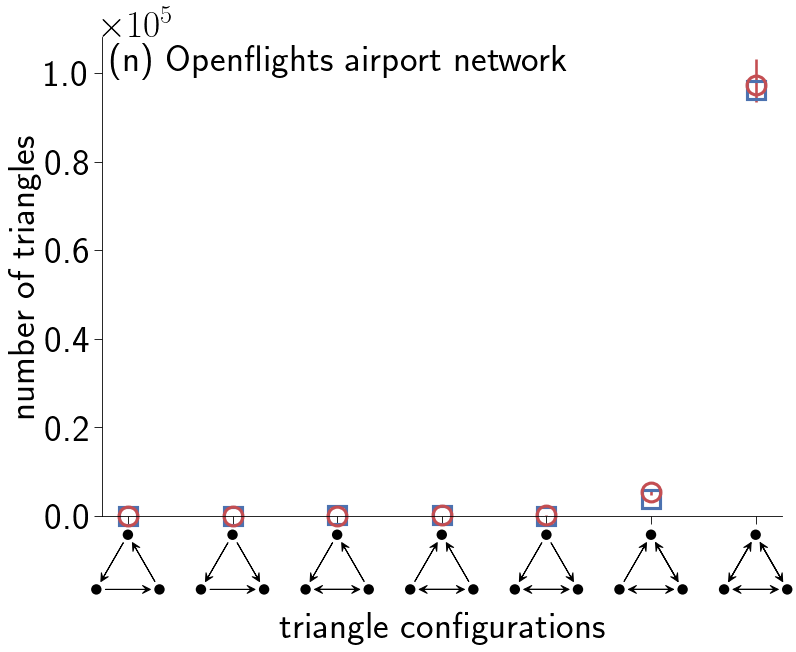

In [27]:
real_graph_name = "openflights"
DRS1model_graph_name = real_graph_name + "_beta3p25_00"

num_g_prop_filename = "../../directedS1_data/synthetic_networks/network_properties/" + DRS1model_graph_name + "_gprop.txt"
header = open(num_g_prop_filename, 'r').readline().replace('#', ' ').split()
num_g_prop = pd.read_table(num_g_prop_filename, names=header, comment="#", delimiter=r"\s+", index_col=0)

real_g_prop_filename = "../../directedS1_data/real_networks/network_properties/all_gprop.txt"
header = open(real_g_prop_filename, 'r').readline().replace('#', ' ').split()
real_g_prop = pd.read_table(real_g_prop_filename, names=header, comment="#", delimiter=r"\s+", index_col=0)

fig, ax = plt.subplots()

plot_real_triangle_spectra(ax, real_graph_name)
plot_num_triangle_spectra(ax, real_graph_name, offset=0.0)

plt.text(0.0125, 0.9875, r"{}".format(r"(n) Openflights airport network"),
         horizontalalignment="left", verticalalignment="top",
         fontsize='medium', transform=ax.transAxes)

cprops = {"facecolor":"k", "edgecolor":"None"}
aprops = {"color":"k", "length_includes_head":True, "overhang":0.5, "head_width":7.5, "head_length":7.5, "joinstyle":"round"}
draw_xlabels(ax, cprops, aprops, r=35, radius=5, offset_factor=1.75, DAwidth=40, DAheight=40, DAxdescent=20, DAydescent=20)

ax.set_ylim(bottom=0)
ax.set_ylabel("number of triangles")
ax.xaxis.labelpad = 80
# ax.ticklabel_format(axis='y', style='sci', scilimits=(0,0))

yfmt = ScalarFormatterForceFormat()
yfmt.set_powerlimits((0,0))
ax.yaxis.set_major_formatter(yfmt)

ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)

fig.savefig("../figures/pdf/figure_paper_" + DRS1model_graph_name + "_triangle_spectrum.pdf", bbox_inches='tight')
fig.savefig("../figures/svg/figure_paper_" + DRS1model_graph_name + "_triangle_spectrum.svg", bbox_inches='tight')

##### (o) C. elegans neurons (male, chemical)

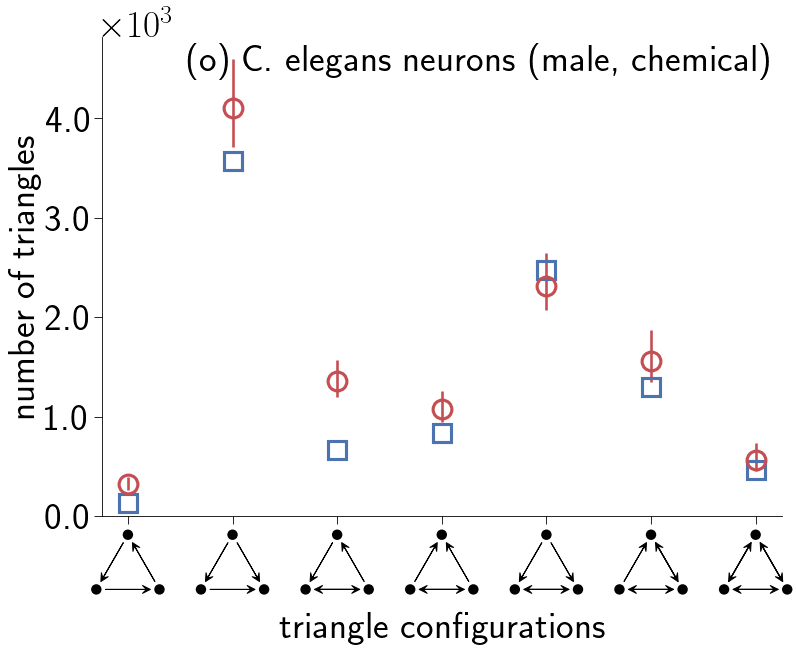

In [28]:
real_graph_name = "celegans_2019_male_chemical"
DRS1model_graph_name = real_graph_name + "_beta2p00_00"

num_g_prop_filename = "../../directedS1_data/synthetic_networks/network_properties/" + DRS1model_graph_name + "_gprop.txt"
header = open(num_g_prop_filename, 'r').readline().replace('#', ' ').split()
num_g_prop = pd.read_table(num_g_prop_filename, names=header, comment="#", delimiter=r"\s+", index_col=0)

real_g_prop_filename = "../../directedS1_data/real_networks/network_properties/all_gprop.txt"
header = open(real_g_prop_filename, 'r').readline().replace('#', ' ').split()
real_g_prop = pd.read_table(real_g_prop_filename, names=header, comment="#", delimiter=r"\s+", index_col=0)

fig, ax = plt.subplots()

plot_real_triangle_spectra(ax, real_graph_name)
plot_num_triangle_spectra(ax, real_graph_name, offset=0.0)

plt.text(0.9875, 0.9875, r"{}".format(r"(o) C. elegans neurons (male, chemical)"),
         horizontalalignment="right", verticalalignment="top",
         fontsize='medium', transform=ax.transAxes)

cprops = {"facecolor":"k", "edgecolor":"None"}
aprops = {"color":"k", "length_includes_head":True, "overhang":0.5, "head_width":7.5, "head_length":7.5, "joinstyle":"round"}
draw_xlabels(ax, cprops, aprops, r=35, radius=5, offset_factor=1.75, DAwidth=40, DAheight=40, DAxdescent=20, DAydescent=20)

ax.set_ylim(bottom=0)
ax.set_ylabel("number of triangles")
ax.xaxis.labelpad = 80
# ax.ticklabel_format(axis='y', style='sci', scilimits=(0,0))

yfmt = ScalarFormatterForceFormat()
yfmt.set_powerlimits((0,0))
ax.yaxis.set_major_formatter(yfmt)

ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)

fig.savefig("../figures/pdf/figure_paper_" + DRS1model_graph_name + "_triangle_spectrum.pdf", bbox_inches='tight')
fig.savefig("../figures/svg/figure_paper_" + DRS1model_graph_name + "_triangle_spectrum.svg", bbox_inches='tight')

##### (p) chess matches

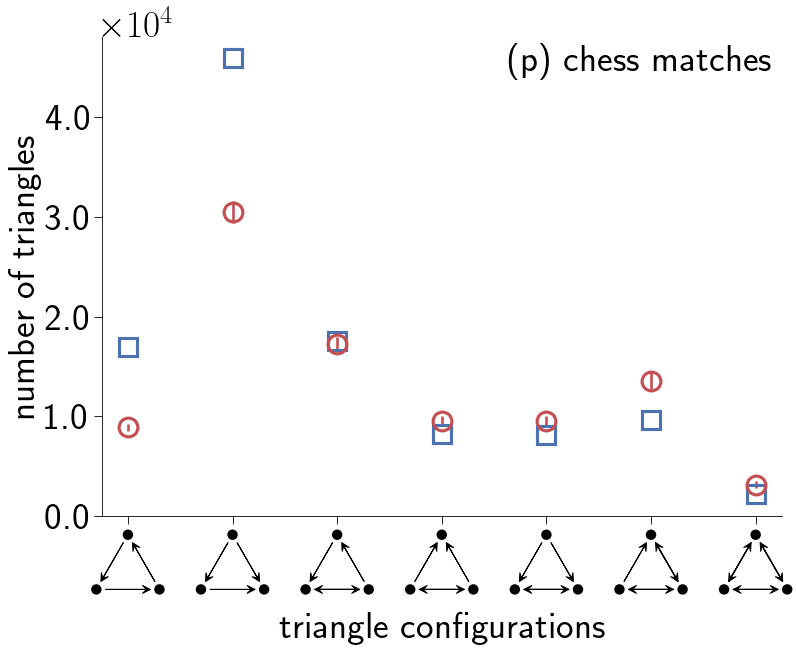

In [29]:
real_graph_name = "chess"
DRS1model_graph_name = real_graph_name + "_beta1p30_00"

num_g_prop_filename = "../../directedS1_data/synthetic_networks/network_properties/" + DRS1model_graph_name + "_gprop.txt"
header = open(num_g_prop_filename, 'r').readline().replace('#', ' ').split()
num_g_prop = pd.read_table(num_g_prop_filename, names=header, comment="#", delimiter=r"\s+", index_col=0)

real_g_prop_filename = "../../directedS1_data/real_networks/network_properties/all_gprop.txt"
header = open(real_g_prop_filename, 'r').readline().replace('#', ' ').split()
real_g_prop = pd.read_table(real_g_prop_filename, names=header, comment="#", delimiter=r"\s+", index_col=0)

fig, ax = plt.subplots()

plot_real_triangle_spectra(ax, real_graph_name)
plot_num_triangle_spectra(ax, real_graph_name, offset=0.0)

plt.text(0.9875, 0.9875, r"{}".format(r"(p) chess matches"),
         horizontalalignment="right", verticalalignment="top",
         fontsize='medium', transform=ax.transAxes)

cprops = {"facecolor":"k", "edgecolor":"None"}
aprops = {"color":"k", "length_includes_head":True, "overhang":0.5, "head_width":7.5, "head_length":7.5, "joinstyle":"round"}
draw_xlabels(ax, cprops, aprops, r=35, radius=5, offset_factor=1.75, DAwidth=40, DAheight=40, DAxdescent=20, DAydescent=20)

ax.set_ylim(bottom=0)
ax.set_ylabel("number of triangles")
ax.xaxis.labelpad = 80
# ax.ticklabel_format(axis='y', style='sci', scilimits=(0,0))

yfmt = ScalarFormatterForceFormat()
yfmt.set_powerlimits((0,0))
ax.yaxis.set_major_formatter(yfmt)

ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)

fig.savefig("../figures/pdf/figure_paper_" + DRS1model_graph_name + "_triangle_spectrum.pdf", bbox_inches='tight')
fig.savefig("../figures/svg/figure_paper_" + DRS1model_graph_name + "_triangle_spectrum.svg", bbox_inches='tight')

### Figure S3

##### (a) political blogs

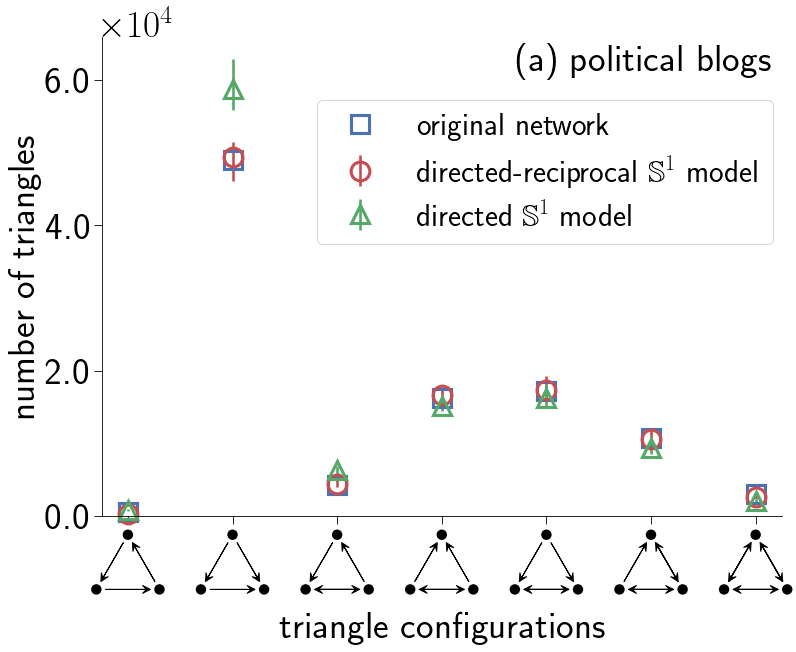

In [30]:
real_graph_name = "polblogs"
DRS1model_graph_name = real_graph_name + "_beta1p75_00"
DS1model_graph_name = real_graph_name + "_beta1p75_nu0p00_00"

fig, ax = plt.subplots()

real_g_prop_filename = "../../directedS1_data/real_networks/network_properties/all_gprop.txt"
header = open(real_g_prop_filename, 'r').readline().replace('#', ' ').split()
real_g_prop = pd.read_table(real_g_prop_filename, names=header, comment="#", delimiter=r"\s+", index_col=0)
plot_real_triangle_spectra(ax, real_graph_name)

num_g_prop_filename = "../../directedS1_data/synthetic_networks/network_properties/" + DRS1model_graph_name + "_gprop.txt"
header = open(num_g_prop_filename, 'r').readline().replace('#', ' ').split()
num_g_prop = pd.read_table(num_g_prop_filename, names=header, comment="#", delimiter=r"\s+", index_col=0)
plot_num_triangle_spectra(ax, real_graph_name, offset=0.0)

num_g_prop_filename = "../../directedS1_data/synthetic_networks/network_properties/" + DS1model_graph_name + "_gprop.txt"
header = open(num_g_prop_filename, 'r').readline().replace('#', ' ').split()
num_g_prop = pd.read_table(num_g_prop_filename, names=header, comment="#", delimiter=r"\s+", index_col=0)
plot_num_triangle_spectra(ax, real_graph_name, offset=0.0, marker='^', color='#55A868', label=r"directed $\mathbb{S}^1$ model")

plt.text(0.9875, 0.9875, r"{}".format(r"(a) political blogs"),
         horizontalalignment="right", verticalalignment="top",
         fontsize='medium', transform=ax.transAxes)

cprops = {"facecolor":"k", "edgecolor":"None"}
aprops = {"color":"k", "length_includes_head":True, "overhang":0.5, "head_width":7.5, "head_length":7.5, "joinstyle":"round"}
draw_xlabels(ax, cprops, aprops, r=35, radius=5, offset_factor=1.75, DAwidth=40, DAheight=40, DAxdescent=20, DAydescent=20)

ax.set_ylim(bottom=0)
ax.set_ylabel("number of triangles")
ax.xaxis.labelpad = 80
# ax.ticklabel_format(axis='y', style='sci', scilimits=(0,0))

yfmt = ScalarFormatterForceFormat()
yfmt.set_powerlimits((0,0))
ax.yaxis.set_major_formatter(yfmt)

ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)

ax.legend(loc="upper right", bbox_to_anchor=(1.01,0.9))

fig.savefig("../figures/pdf/figure_paper_" + DS1model_graph_name + "_triangle_spectrum.pdf", bbox_inches='tight')
fig.savefig("../figures/svg/figure_paper_" + DS1model_graph_name + "_triangle_spectrum.svg", bbox_inches='tight')

##### (b) tadpole larva brain (C. intestinalis)

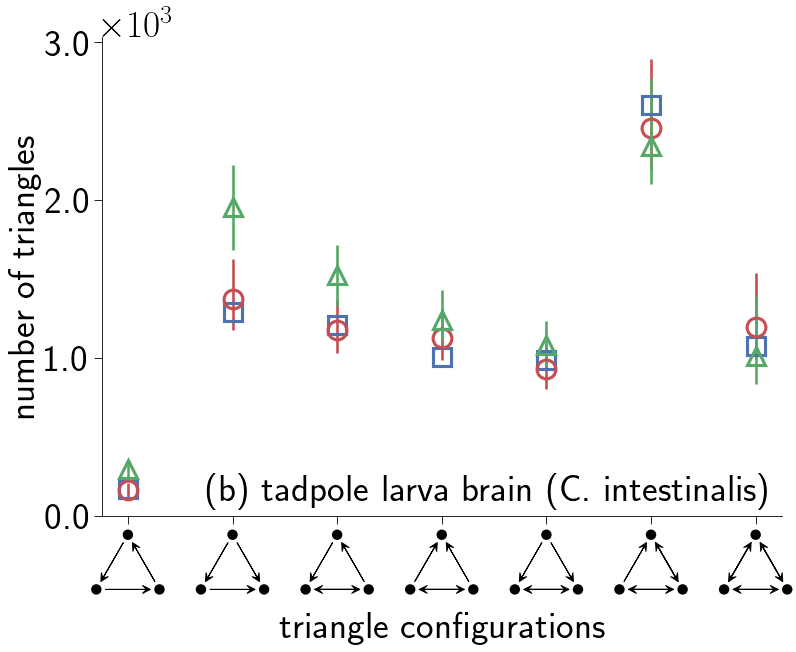

In [31]:
real_graph_name = "cintestinalis"
DRS1model_graph_name = real_graph_name + "_beta2p00_00"
DS1model_graph_name = real_graph_name + "_beta2p00_nu0p00_00"

fig, ax = plt.subplots()

real_g_prop_filename = "../../directedS1_data/real_networks/network_properties/all_gprop.txt"
header = open(real_g_prop_filename, 'r').readline().replace('#', ' ').split()
real_g_prop = pd.read_table(real_g_prop_filename, names=header, comment="#", delimiter=r"\s+", index_col=0)
plot_real_triangle_spectra(ax, real_graph_name)

num_g_prop_filename = "../../directedS1_data/synthetic_networks/network_properties/" + DRS1model_graph_name + "_gprop.txt"
header = open(num_g_prop_filename, 'r').readline().replace('#', ' ').split()
num_g_prop = pd.read_table(num_g_prop_filename, names=header, comment="#", delimiter=r"\s+", index_col=0)
plot_num_triangle_spectra(ax, real_graph_name, offset=0.0)

num_g_prop_filename = "../../directedS1_data/synthetic_networks/network_properties/" + DS1model_graph_name + "_gprop.txt"
header = open(num_g_prop_filename, 'r').readline().replace('#', ' ').split()
num_g_prop = pd.read_table(num_g_prop_filename, names=header, comment="#", delimiter=r"\s+", index_col=0)
plot_num_triangle_spectra(ax, real_graph_name, offset=0.0, marker='^', color='#55A868', label=r"directed $\mathbb{S}^1$ model")

plt.text(0.9875, 0.0125, r"{}".format(r"(b) tadpole larva brain (C. intestinalis)"),
         horizontalalignment="right", verticalalignment="bottom",
         fontsize='medium', transform=ax.transAxes)

cprops = {"facecolor":"k", "edgecolor":"None"}
aprops = {"color":"k", "length_includes_head":True, "overhang":0.5, "head_width":7.5, "head_length":7.5, "joinstyle":"round"}
draw_xlabels(ax, cprops, aprops, r=35, radius=5, offset_factor=1.75, DAwidth=40, DAheight=40, DAxdescent=20, DAydescent=20)

ax.set_ylim(bottom=0)
ax.set_ylabel("number of triangles")
ax.xaxis.labelpad = 80
# ax.ticklabel_format(axis='y', style='sci', scilimits=(0,0))

yfmt = ScalarFormatterForceFormat()
yfmt.set_powerlimits((0,0))
ax.yaxis.set_major_formatter(yfmt)

ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)

# ax.legend(loc="upper left")

fig.savefig("../figures/pdf/figure_paper_" + DS1model_graph_name + "_triangle_spectrum.pdf", bbox_inches='tight')
fig.savefig("../figures/svg/figure_paper_" + DS1model_graph_name + "_triangle_spectrum.svg", bbox_inches='tight')

##### (c) Little Rock Lake food web

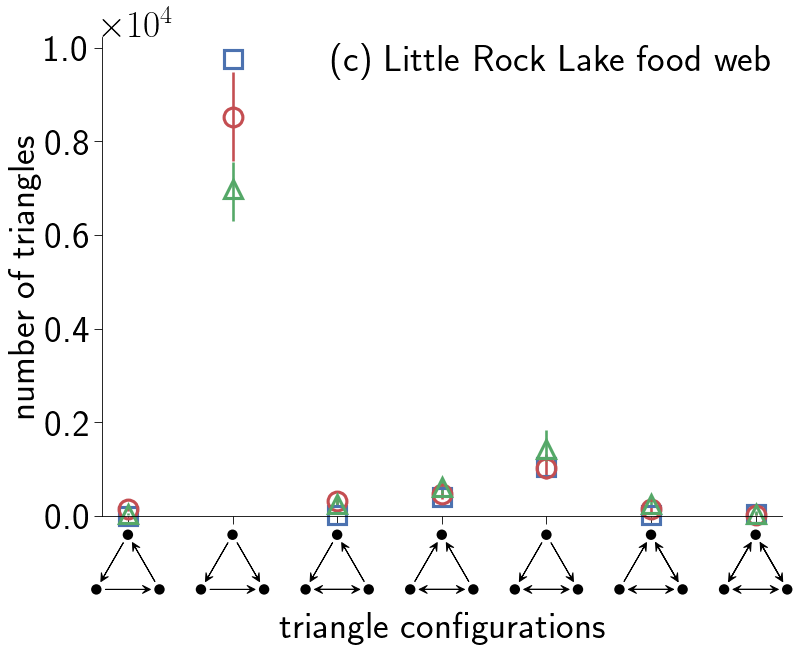

In [32]:
real_graph_name = "foodweb_little_rock"
DRS1model_graph_name = real_graph_name + "_beta1p50_00"
DS1model_graph_name = real_graph_name + "_beta1p50_nu0p00_00"

fig, ax = plt.subplots()

real_g_prop_filename = "../../directedS1_data/real_networks/network_properties/all_gprop.txt"
header = open(real_g_prop_filename, 'r').readline().replace('#', ' ').split()
real_g_prop = pd.read_table(real_g_prop_filename, names=header, comment="#", delimiter=r"\s+", index_col=0)
plot_real_triangle_spectra(ax, real_graph_name)

num_g_prop_filename = "../../directedS1_data/synthetic_networks/network_properties/" + DRS1model_graph_name + "_gprop.txt"
header = open(num_g_prop_filename, 'r').readline().replace('#', ' ').split()
num_g_prop = pd.read_table(num_g_prop_filename, names=header, comment="#", delimiter=r"\s+", index_col=0)
plot_num_triangle_spectra(ax, real_graph_name, offset=0.0)

num_g_prop_filename = "../../directedS1_data/synthetic_networks/network_properties/" + DS1model_graph_name + "_gprop.txt"
header = open(num_g_prop_filename, 'r').readline().replace('#', ' ').split()
num_g_prop = pd.read_table(num_g_prop_filename, names=header, comment="#", delimiter=r"\s+", index_col=0)
plot_num_triangle_spectra(ax, real_graph_name, offset=0.0, marker='^', color='#55A868', label=r"directed $\mathbb{S}^1$ model")

plt.text(0.9875, 0.9875, r"{}".format(r"(c) Little Rock Lake food web"),
         horizontalalignment="right", verticalalignment="top",
         fontsize='medium', transform=ax.transAxes)

cprops = {"facecolor":"k", "edgecolor":"None"}
aprops = {"color":"k", "length_includes_head":True, "overhang":0.5, "head_width":7.5, "head_length":7.5, "joinstyle":"round"}
draw_xlabels(ax, cprops, aprops, r=35, radius=5, offset_factor=1.75, DAwidth=40, DAheight=40, DAxdescent=20, DAydescent=20)

ax.set_ylim(bottom=0)
ax.set_ylabel("number of triangles")
ax.xaxis.labelpad = 80
# ax.ticklabel_format(axis='y', style='sci', scilimits=(0,0))

yfmt = ScalarFormatterForceFormat()
yfmt.set_powerlimits((0,0))
ax.yaxis.set_major_formatter(yfmt)

ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)

fig.savefig("../figures/pdf/figure_paper_" + DS1model_graph_name + "_triangle_spectrum.pdf", bbox_inches='tight')
fig.savefig("../figures/svg/figure_paper_" + DS1model_graph_name + "_triangle_spectrum.svg", bbox_inches='tight')

##### (d) FAO trade network

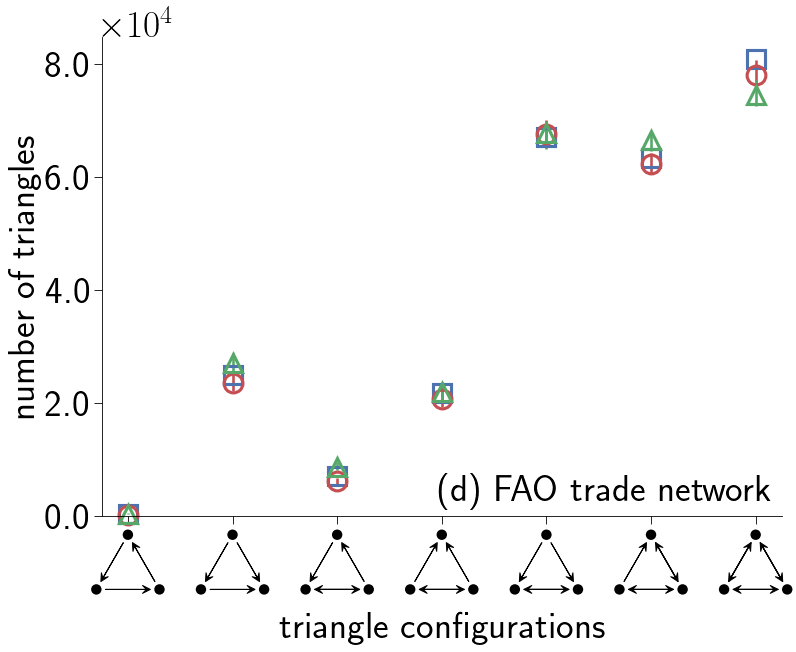

In [33]:
real_graph_name = "fao_trade"
DRS1model_graph_name = real_graph_name + "_beta1p75_00"
DS1model_graph_name = real_graph_name + "_beta1p75_nu0p00_00"

fig, ax = plt.subplots()

real_g_prop_filename = "../../directedS1_data/real_networks/network_properties/all_gprop.txt"
header = open(real_g_prop_filename, 'r').readline().replace('#', ' ').split()
real_g_prop = pd.read_table(real_g_prop_filename, names=header, comment="#", delimiter=r"\s+", index_col=0)
plot_real_triangle_spectra(ax, real_graph_name)

num_g_prop_filename = "../../directedS1_data/synthetic_networks/network_properties/" + DRS1model_graph_name + "_gprop.txt"
header = open(num_g_prop_filename, 'r').readline().replace('#', ' ').split()
num_g_prop = pd.read_table(num_g_prop_filename, names=header, comment="#", delimiter=r"\s+", index_col=0)
plot_num_triangle_spectra(ax, real_graph_name, offset=0.0)

num_g_prop_filename = "../../directedS1_data/synthetic_networks/network_properties/" + DS1model_graph_name + "_gprop.txt"
header = open(num_g_prop_filename, 'r').readline().replace('#', ' ').split()
num_g_prop = pd.read_table(num_g_prop_filename, names=header, comment="#", delimiter=r"\s+", index_col=0)
plot_num_triangle_spectra(ax, real_graph_name, offset=0.0, marker='^', color='#55A868', label=r"directed $\mathbb{S}^1$ model")

plt.text(0.9875, 0.0125, r"{}".format(r"(d) FAO trade network"),
         horizontalalignment="right", verticalalignment="bottom",
         fontsize='medium', transform=ax.transAxes)

cprops = {"facecolor":"k", "edgecolor":"None"}
aprops = {"color":"k", "length_includes_head":True, "overhang":0.5, "head_width":7.5, "head_length":7.5, "joinstyle":"round"}
draw_xlabels(ax, cprops, aprops, r=35, radius=5, offset_factor=1.75, DAwidth=40, DAheight=40, DAxdescent=20, DAydescent=20)

ax.set_ylim(bottom=0)
ax.set_ylabel("number of triangles")
ax.xaxis.labelpad = 80
# ax.ticklabel_format(axis='y', style='sci', scilimits=(0,0))

yfmt = ScalarFormatterForceFormat()
yfmt.set_powerlimits((0,0))
ax.yaxis.set_major_formatter(yfmt)

ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)

fig.savefig("../figures/pdf/figure_paper_" + DS1model_graph_name + "_triangle_spectrum.pdf", bbox_inches='tight')
fig.savefig("../figures/svg/figure_paper_" + DS1model_graph_name + "_triangle_spectrum.svg", bbox_inches='tight')

##### (e) Advogato trust network

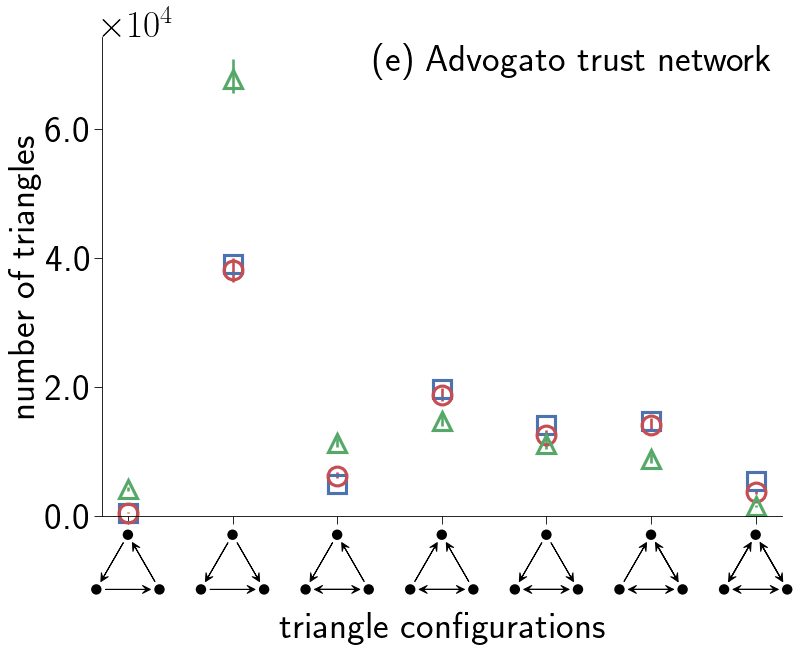

In [34]:
real_graph_name = "advogato"
DRS1model_graph_name = real_graph_name + "_00"
DS1model_graph_name = real_graph_name + "_nu0p00_00"

fig, ax = plt.subplots()

real_g_prop_filename = "../../directedS1_data/real_networks/network_properties/all_gprop.txt"
header = open(real_g_prop_filename, 'r').readline().replace('#', ' ').split()
real_g_prop = pd.read_table(real_g_prop_filename, names=header, comment="#", delimiter=r"\s+", index_col=0)
plot_real_triangle_spectra(ax, real_graph_name)

num_g_prop_filename = "../../directedS1_data/synthetic_networks/network_properties/" + DRS1model_graph_name + "_gprop.txt"
header = open(num_g_prop_filename, 'r').readline().replace('#', ' ').split()
num_g_prop = pd.read_table(num_g_prop_filename, names=header, comment="#", delimiter=r"\s+", index_col=0)
plot_num_triangle_spectra(ax, real_graph_name, offset=0.0)

num_g_prop_filename = "../../directedS1_data/synthetic_networks/network_properties/" + DS1model_graph_name + "_gprop.txt"
header = open(num_g_prop_filename, 'r').readline().replace('#', ' ').split()
num_g_prop = pd.read_table(num_g_prop_filename, names=header, comment="#", delimiter=r"\s+", index_col=0)
plot_num_triangle_spectra(ax, real_graph_name, offset=0.0, marker='^', color='#55A868', label=r"directed $\mathbb{S}^1$ model")

plt.text(0.9875, 0.9875, r"{}".format(r"(e) Advogato trust network"),
         horizontalalignment="right", verticalalignment="top",
         fontsize='medium', transform=ax.transAxes)

cprops = {"facecolor":"k", "edgecolor":"None"}
aprops = {"color":"k", "length_includes_head":True, "overhang":0.5, "head_width":7.5, "head_length":7.5, "joinstyle":"round"}
draw_xlabels(ax, cprops, aprops, r=35, radius=5, offset_factor=1.75, DAwidth=40, DAheight=40, DAxdescent=20, DAydescent=20)

ax.set_ylim(bottom=0)
ax.set_ylabel("number of triangles")
ax.xaxis.labelpad = 80
# ax.ticklabel_format(axis='y', style='sci', scilimits=(0,0))

yfmt = ScalarFormatterForceFormat()
yfmt.set_powerlimits((0,0))
ax.yaxis.set_major_formatter(yfmt)

ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)

fig.savefig("../figures/pdf/figure_paper_" + DS1model_graph_name + "_triangle_spectrum.pdf", bbox_inches='tight')
fig.savefig("../figures/svg/figure_paper_" + DS1model_graph_name + "_triangle_spectrum.svg", bbox_inches='tight')

##### (f) manufacturing company email

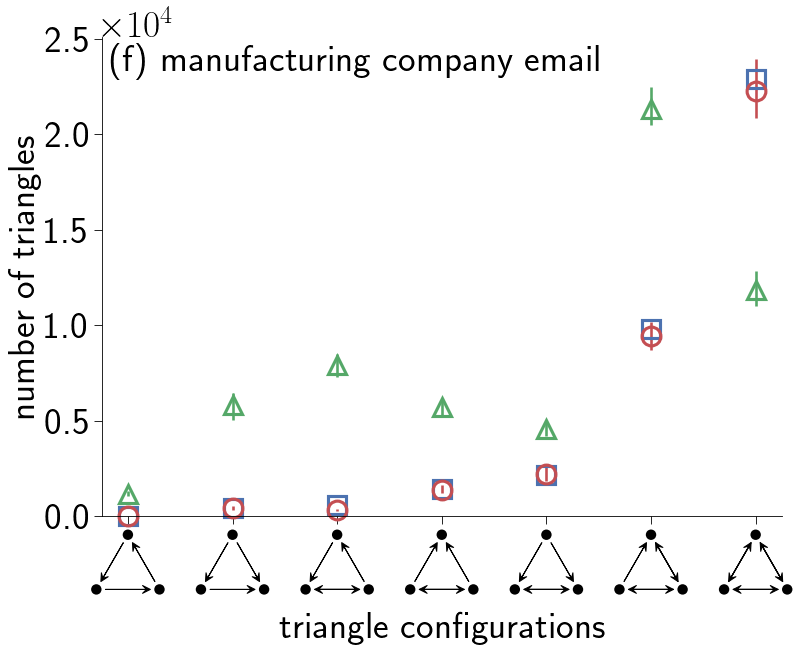

In [35]:
real_graph_name = "email_company"
DRS1model_graph_name = real_graph_name + "_beta1p50_00"
DS1model_graph_name = real_graph_name + "_beta1p50_nu0p00_00"

fig, ax = plt.subplots()

real_g_prop_filename = "../../directedS1_data/real_networks/network_properties/all_gprop.txt"
header = open(real_g_prop_filename, 'r').readline().replace('#', ' ').split()
real_g_prop = pd.read_table(real_g_prop_filename, names=header, comment="#", delimiter=r"\s+", index_col=0)
plot_real_triangle_spectra(ax, real_graph_name)

num_g_prop_filename = "../../directedS1_data/synthetic_networks/network_properties/" + DRS1model_graph_name + "_gprop.txt"
header = open(num_g_prop_filename, 'r').readline().replace('#', ' ').split()
num_g_prop = pd.read_table(num_g_prop_filename, names=header, comment="#", delimiter=r"\s+", index_col=0)
plot_num_triangle_spectra(ax, real_graph_name, offset=0.0)

num_g_prop_filename = "../../directedS1_data/synthetic_networks/network_properties/" + DS1model_graph_name + "_gprop.txt"
header = open(num_g_prop_filename, 'r').readline().replace('#', ' ').split()
num_g_prop = pd.read_table(num_g_prop_filename, names=header, comment="#", delimiter=r"\s+", index_col=0)
plot_num_triangle_spectra(ax, real_graph_name, offset=0.0, marker='^', color='#55A868', label=r"directed $\mathbb{S}^1$ model")

plt.text(0.0125, 0.9875, r"{}".format(r"(f) manufacturing company email"),
         horizontalalignment="left", verticalalignment="top",
         fontsize='medium', transform=ax.transAxes)

cprops = {"facecolor":"k", "edgecolor":"None"}
aprops = {"color":"k", "length_includes_head":True, "overhang":0.5, "head_width":7.5, "head_length":7.5, "joinstyle":"round"}
draw_xlabels(ax, cprops, aprops, r=35, radius=5, offset_factor=1.75, DAwidth=40, DAheight=40, DAxdescent=20, DAydescent=20)

ax.set_ylim(bottom=0)
ax.set_ylabel("number of triangles")
ax.xaxis.labelpad = 80
# ax.ticklabel_format(axis='y', style='sci', scilimits=(0,0))

yfmt = ScalarFormatterForceFormat()
yfmt.set_powerlimits((0,0))
ax.yaxis.set_major_formatter(yfmt)

ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)

fig.savefig("../figures/pdf/figure_paper_" + DS1model_graph_name + "_triangle_spectrum.pdf", bbox_inches='tight')
fig.savefig("../figures/svg/figure_paper_" + DS1model_graph_name + "_triangle_spectrum.svg", bbox_inches='tight')

##### (g) primary school contacts

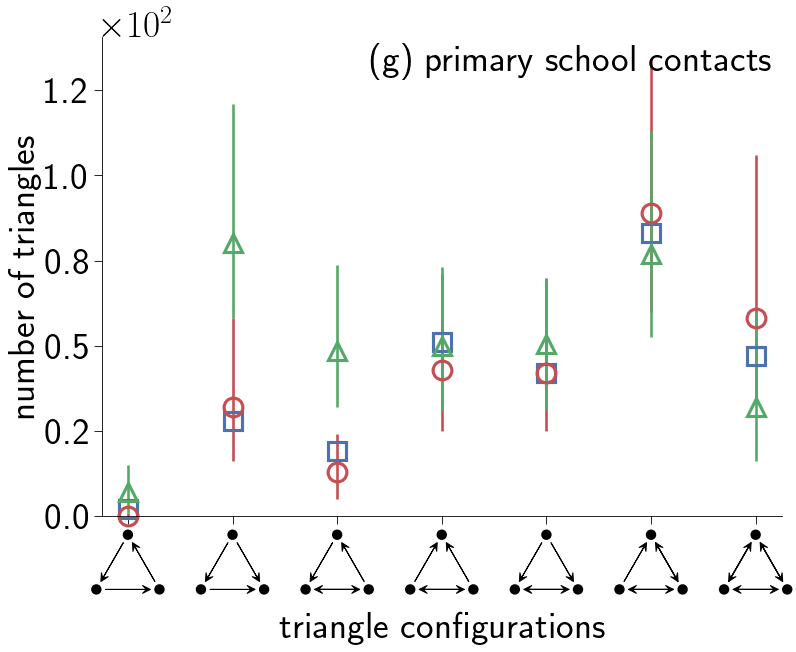

In [36]:
real_graph_name = "sp_high_school_diaries"
DRS1model_graph_name = real_graph_name + "_00"
DS1model_graph_name = real_graph_name + "_nu0p00_00"

fig, ax = plt.subplots()

real_g_prop_filename = "../../directedS1_data/real_networks/network_properties/all_gprop.txt"
header = open(real_g_prop_filename, 'r').readline().replace('#', ' ').split()
real_g_prop = pd.read_table(real_g_prop_filename, names=header, comment="#", delimiter=r"\s+", index_col=0)
plot_real_triangle_spectra(ax, real_graph_name)

num_g_prop_filename = "../../directedS1_data/synthetic_networks/network_properties/" + DRS1model_graph_name + "_gprop.txt"
header = open(num_g_prop_filename, 'r').readline().replace('#', ' ').split()
num_g_prop = pd.read_table(num_g_prop_filename, names=header, comment="#", delimiter=r"\s+", index_col=0)
plot_num_triangle_spectra(ax, real_graph_name, offset=0.0)

num_g_prop_filename = "../../directedS1_data/synthetic_networks/network_properties/" + DS1model_graph_name + "_gprop.txt"
header = open(num_g_prop_filename, 'r').readline().replace('#', ' ').split()
num_g_prop = pd.read_table(num_g_prop_filename, names=header, comment="#", delimiter=r"\s+", index_col=0)
plot_num_triangle_spectra(ax, real_graph_name, offset=0.0, marker='^', color='#55A868', label=r"directed $\mathbb{S}^1$ model")

plt.text(0.9875, 0.9875, r"{}".format(r"(g) primary school contacts"),
         horizontalalignment="right", verticalalignment="top",
         fontsize='medium', transform=ax.transAxes)

cprops = {"facecolor":"k", "edgecolor":"None"}
aprops = {"color":"k", "length_includes_head":True, "overhang":0.5, "head_width":7.5, "head_length":7.5, "joinstyle":"round"}
draw_xlabels(ax, cprops, aprops, r=35, radius=5, offset_factor=1.75, DAwidth=40, DAheight=40, DAxdescent=20, DAydescent=20)

ax.set_ylim(bottom=0)
ax.set_ylabel("number of triangles")
ax.xaxis.labelpad = 80
# ax.ticklabel_format(axis='y', style='sci', scilimits=(0,0))

yfmt = ScalarFormatterForceFormat()
yfmt.set_powerlimits((0,0))
ax.yaxis.set_major_formatter(yfmt)

ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)

fig.savefig("../figures/pdf/figure_paper_" + DS1model_graph_name + "_triangle_spectrum.pdf", bbox_inches='tight')
fig.savefig("../figures/svg/figure_paper_" + DS1model_graph_name + "_triangle_spectrum.svg", bbox_inches='tight')

##### (h) U.S. government agency websites

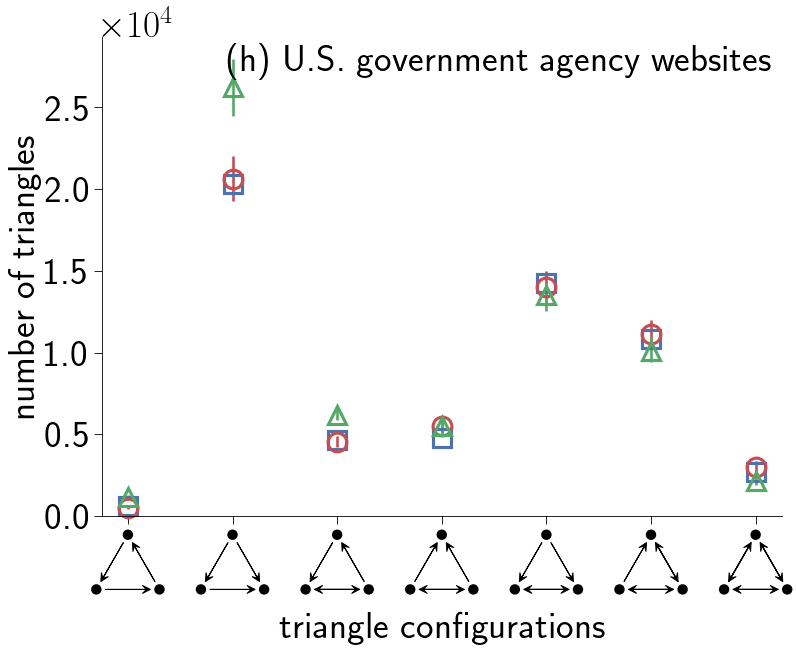

In [37]:
real_graph_name = "us_agencies_washington"
DRS1model_graph_name = real_graph_name + "_00"
DS1model_graph_name = real_graph_name + "_nu0p00_00"

fig, ax = plt.subplots()

real_g_prop_filename = "../../directedS1_data/real_networks/network_properties/all_gprop.txt"
header = open(real_g_prop_filename, 'r').readline().replace('#', ' ').split()
real_g_prop = pd.read_table(real_g_prop_filename, names=header, comment="#", delimiter=r"\s+", index_col=0)
plot_real_triangle_spectra(ax, real_graph_name)

num_g_prop_filename = "../../directedS1_data/synthetic_networks/network_properties/" + DRS1model_graph_name + "_gprop.txt"
header = open(num_g_prop_filename, 'r').readline().replace('#', ' ').split()
num_g_prop = pd.read_table(num_g_prop_filename, names=header, comment="#", delimiter=r"\s+", index_col=0)
plot_num_triangle_spectra(ax, real_graph_name, offset=0.0)

num_g_prop_filename = "../../directedS1_data/synthetic_networks/network_properties/" + DS1model_graph_name + "_gprop.txt"
header = open(num_g_prop_filename, 'r').readline().replace('#', ' ').split()
num_g_prop = pd.read_table(num_g_prop_filename, names=header, comment="#", delimiter=r"\s+", index_col=0)
plot_num_triangle_spectra(ax, real_graph_name, offset=0.0, marker='^', color='#55A868', label=r"directed $\mathbb{S}^1$ model")

plt.text(0.9875, 0.9875, r"{}".format(r"(h) U.S. government agency websites"),
         horizontalalignment="right", verticalalignment="top",
         fontsize='medium', transform=ax.transAxes)

cprops = {"facecolor":"k", "edgecolor":"None"}
aprops = {"color":"k", "length_includes_head":True, "overhang":0.5, "head_width":7.5, "head_length":7.5, "joinstyle":"round"}
draw_xlabels(ax, cprops, aprops, r=35, radius=5, offset_factor=1.75, DAwidth=40, DAheight=40, DAxdescent=20, DAydescent=20)

ax.set_ylim(bottom=0)
ax.set_ylabel("number of triangles")
ax.xaxis.labelpad = 80
# ax.ticklabel_format(axis='y', style='sci', scilimits=(0,0))

yfmt = ScalarFormatterForceFormat()
yfmt.set_powerlimits((0,0))
ax.yaxis.set_major_formatter(yfmt)

ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)

fig.savefig("../figures/pdf/figure_paper_" + DS1model_graph_name + "_triangle_spectrum.pdf", bbox_inches='tight')
fig.savefig("../figures/svg/figure_paper_" + DS1model_graph_name + "_triangle_spectrum.svg", bbox_inches='tight')

##### (i) friendship network

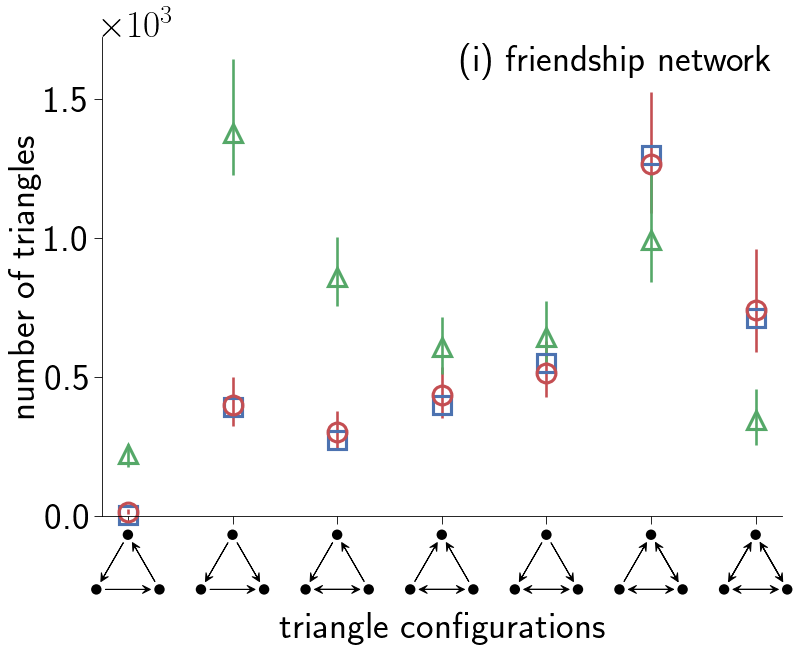

In [38]:
real_graph_name = "residence_hall"
DRS1model_graph_name = real_graph_name + "_00"
DS1model_graph_name = real_graph_name + "_nu0p00_00"

fig, ax = plt.subplots()

real_g_prop_filename = "../../directedS1_data/real_networks/network_properties/all_gprop.txt"
header = open(real_g_prop_filename, 'r').readline().replace('#', ' ').split()
real_g_prop = pd.read_table(real_g_prop_filename, names=header, comment="#", delimiter=r"\s+", index_col=0)
plot_real_triangle_spectra(ax, real_graph_name)

num_g_prop_filename = "../../directedS1_data/synthetic_networks/network_properties/" + DRS1model_graph_name + "_gprop.txt"
header = open(num_g_prop_filename, 'r').readline().replace('#', ' ').split()
num_g_prop = pd.read_table(num_g_prop_filename, names=header, comment="#", delimiter=r"\s+", index_col=0)
plot_num_triangle_spectra(ax, real_graph_name, offset=0.0)

num_g_prop_filename = "../../directedS1_data/synthetic_networks/network_properties/" + DS1model_graph_name + "_gprop.txt"
header = open(num_g_prop_filename, 'r').readline().replace('#', ' ').split()
num_g_prop = pd.read_table(num_g_prop_filename, names=header, comment="#", delimiter=r"\s+", index_col=0)
plot_num_triangle_spectra(ax, real_graph_name, offset=0.0, marker='^', color='#55A868', label=r"directed $\mathbb{S}^1$ model")

plt.text(0.9875, 0.9875, r"{}".format(r"(i) friendship network"),
         horizontalalignment="right", verticalalignment="top",
         fontsize='medium', transform=ax.transAxes)

cprops = {"facecolor":"k", "edgecolor":"None"}
aprops = {"color":"k", "length_includes_head":True, "overhang":0.5, "head_width":7.5, "head_length":7.5, "joinstyle":"round"}
draw_xlabels(ax, cprops, aprops, r=35, radius=5, offset_factor=1.75, DAwidth=40, DAheight=40, DAxdescent=20, DAydescent=20)

ax.set_ylim(bottom=0)
ax.set_ylabel("number of triangles")
ax.xaxis.labelpad = 80
# ax.ticklabel_format(axis='y', style='sci', scilimits=(0,0))

yfmt = ScalarFormatterForceFormat()
yfmt.set_powerlimits((0,0))
ax.yaxis.set_major_formatter(yfmt)

ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)

fig.savefig("../figures/pdf/figure_paper_" + DS1model_graph_name + "_triangle_spectrum.pdf", bbox_inches='tight')
fig.savefig("../figures/svg/figure_paper_" + DS1model_graph_name + "_triangle_spectrum.svg", bbox_inches='tight')

### Figure S4

##### (a) C. elegans connectome

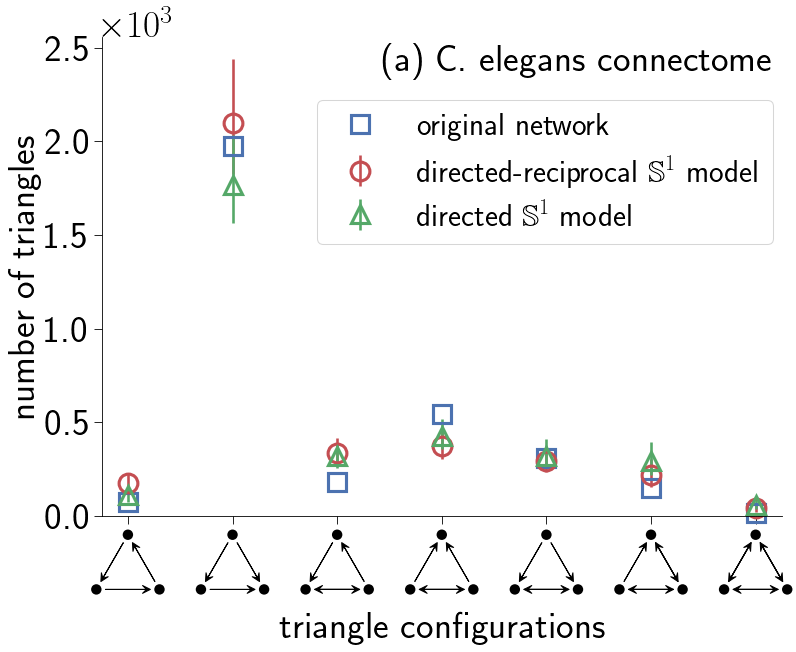

In [39]:
real_graph_name = "celegansneural"
DRS1model_graph_name = real_graph_name + "_00"
DS1model_graph_name = real_graph_name + "_nu0p00_00"

fig, ax = plt.subplots()

real_g_prop_filename = "../../directedS1_data/real_networks/network_properties/all_gprop.txt"
header = open(real_g_prop_filename, 'r').readline().replace('#', ' ').split()
real_g_prop = pd.read_table(real_g_prop_filename, names=header, comment="#", delimiter=r"\s+", index_col=0)
plot_real_triangle_spectra(ax, real_graph_name)

num_g_prop_filename = "../../directedS1_data/synthetic_networks/network_properties/" + DRS1model_graph_name + "_gprop.txt"
header = open(num_g_prop_filename, 'r').readline().replace('#', ' ').split()
num_g_prop = pd.read_table(num_g_prop_filename, names=header, comment="#", delimiter=r"\s+", index_col=0)
plot_num_triangle_spectra(ax, real_graph_name, offset=0.0)

num_g_prop_filename = "../../directedS1_data/synthetic_networks/network_properties/" + DS1model_graph_name + "_gprop.txt"
header = open(num_g_prop_filename, 'r').readline().replace('#', ' ').split()
num_g_prop = pd.read_table(num_g_prop_filename, names=header, comment="#", delimiter=r"\s+", index_col=0)
plot_num_triangle_spectra(ax, real_graph_name, offset=0.0, marker='^', color='#55A868', label=r"directed $\mathbb{S}^1$ model")

plt.text(0.9875, 0.9875, r"{}".format(r"(a) C. elegans connectome"),
         horizontalalignment="right", verticalalignment="top",
         fontsize='medium', transform=ax.transAxes)

cprops = {"facecolor":"k", "edgecolor":"None"}
aprops = {"color":"k", "length_includes_head":True, "overhang":0.5, "head_width":7.5, "head_length":7.5, "joinstyle":"round"}
draw_xlabels(ax, cprops, aprops, r=35, radius=5, offset_factor=1.75, DAwidth=40, DAheight=40, DAxdescent=20, DAydescent=20)

ax.set_ylim(bottom=0)
ax.set_ylabel("number of triangles")
ax.xaxis.labelpad = 80
# ax.ticklabel_format(axis='y', style='sci', scilimits=(0,0))

yfmt = ScalarFormatterForceFormat()
yfmt.set_powerlimits((0,0))
ax.yaxis.set_major_formatter(yfmt)

ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)

ax.legend(loc="upper right", bbox_to_anchor=(1.01,0.9))

fig.savefig("../figures/pdf/figure_paper_" + DS1model_graph_name + "_triangle_spectrum.pdf", bbox_inches='tight')
fig.savefig("../figures/svg/figure_paper_" + DS1model_graph_name + "_triangle_spectrum.svg", bbox_inches='tight')

##### (b) email network (Uni. R-V, Spain)

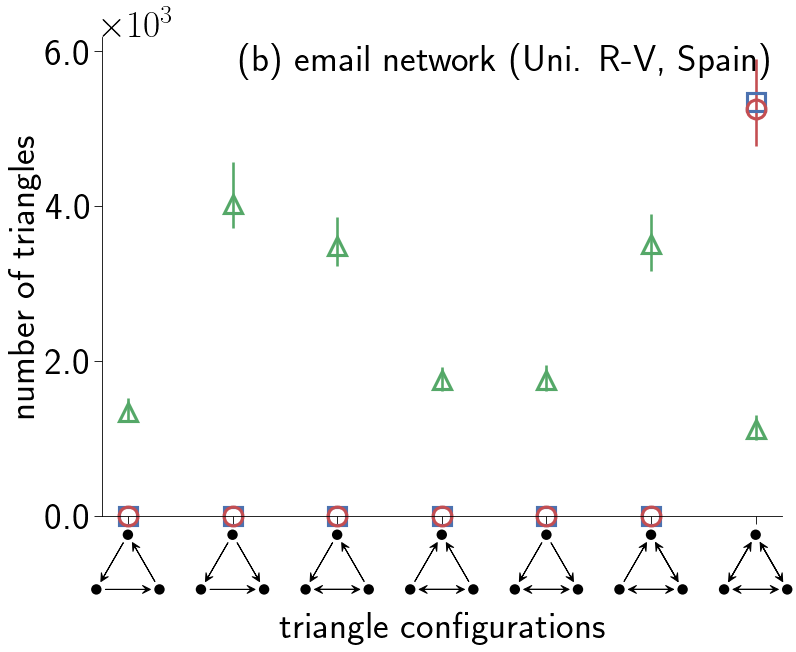

In [40]:
real_graph_name = "uni_email"
DRS1model_graph_name = real_graph_name + "_beta1p45_00"
DS1model_graph_name = real_graph_name + "_beta1p45_nu0p00_00"

fig, ax = plt.subplots()

real_g_prop_filename = "../../directedS1_data/real_networks/network_properties/all_gprop.txt"
header = open(real_g_prop_filename, 'r').readline().replace('#', ' ').split()
real_g_prop = pd.read_table(real_g_prop_filename, names=header, comment="#", delimiter=r"\s+", index_col=0)
plot_real_triangle_spectra(ax, real_graph_name)

num_g_prop_filename = "../../directedS1_data/synthetic_networks/network_properties/" + DRS1model_graph_name + "_gprop.txt"
header = open(num_g_prop_filename, 'r').readline().replace('#', ' ').split()
num_g_prop = pd.read_table(num_g_prop_filename, names=header, comment="#", delimiter=r"\s+", index_col=0)
plot_num_triangle_spectra(ax, real_graph_name, offset=0.0)

num_g_prop_filename = "../../directedS1_data/synthetic_networks/network_properties/" + DS1model_graph_name + "_gprop.txt"
header = open(num_g_prop_filename, 'r').readline().replace('#', ' ').split()
num_g_prop = pd.read_table(num_g_prop_filename, names=header, comment="#", delimiter=r"\s+", index_col=0)
plot_num_triangle_spectra(ax, real_graph_name, offset=0.0, marker='^', color='#55A868', label=r"directed $\mathbb{S}^1$ model")

plt.text(0.9875, 0.9875, r"{}".format(r"(b) email network (Uni. R-V, Spain)"),
         horizontalalignment="right", verticalalignment="top",
         fontsize='medium', transform=ax.transAxes)

cprops = {"facecolor":"k", "edgecolor":"None"}
aprops = {"color":"k", "length_includes_head":True, "overhang":0.5, "head_width":7.5, "head_length":7.5, "joinstyle":"round"}
draw_xlabels(ax, cprops, aprops, r=35, radius=5, offset_factor=1.75, DAwidth=40, DAheight=40, DAxdescent=20, DAydescent=20)

ax.set_ylim(bottom=0)
ax.set_ylabel("number of triangles")
ax.xaxis.labelpad = 80
# ax.ticklabel_format(axis='y', style='sci', scilimits=(0,0))

yfmt = ScalarFormatterForceFormat()
yfmt.set_powerlimits((0,0))
ax.yaxis.set_major_formatter(yfmt)

ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)

fig.savefig("../figures/pdf/figure_paper_" + DS1model_graph_name + "_triangle_spectrum.pdf", bbox_inches='tight')
fig.savefig("../figures/svg/figure_paper_" + DS1model_graph_name + "_triangle_spectrum.svg", bbox_inches='tight')

##### (c) frienship network 2

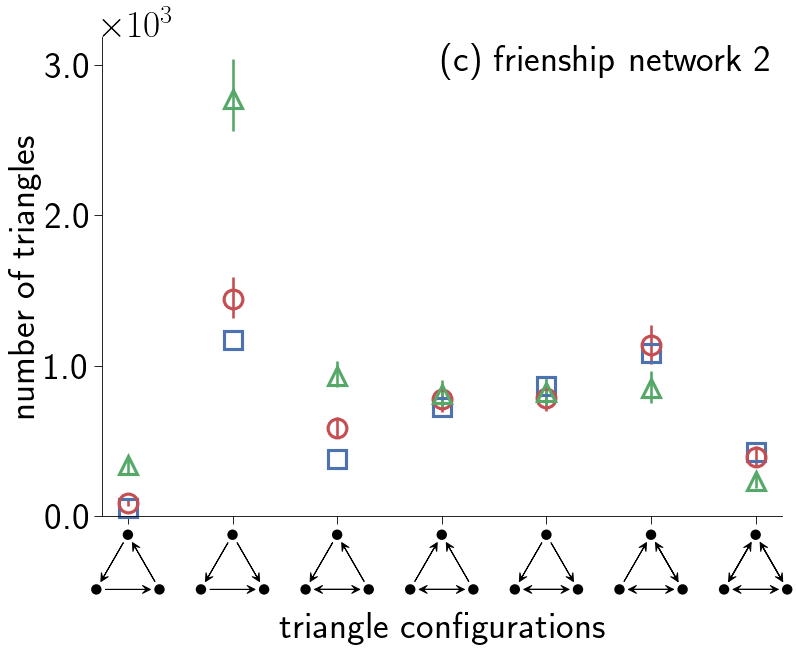

In [41]:
real_graph_name = "add_health_comm50"
DRS1model_graph_name = real_graph_name + "_beta1p40_00"
DS1model_graph_name = real_graph_name + "_beta1p40_nu0p00_00"

fig, ax = plt.subplots()

real_g_prop_filename = "../../directedS1_data/real_networks/network_properties/all_gprop.txt"
header = open(real_g_prop_filename, 'r').readline().replace('#', ' ').split()
real_g_prop = pd.read_table(real_g_prop_filename, names=header, comment="#", delimiter=r"\s+", index_col=0)
plot_real_triangle_spectra(ax, real_graph_name)

num_g_prop_filename = "../../directedS1_data/synthetic_networks/network_properties/" + DRS1model_graph_name + "_gprop.txt"
header = open(num_g_prop_filename, 'r').readline().replace('#', ' ').split()
num_g_prop = pd.read_table(num_g_prop_filename, names=header, comment="#", delimiter=r"\s+", index_col=0)
plot_num_triangle_spectra(ax, real_graph_name, offset=0.0)

num_g_prop_filename = "../../directedS1_data/synthetic_networks/network_properties/" + DS1model_graph_name + "_gprop.txt"
header = open(num_g_prop_filename, 'r').readline().replace('#', ' ').split()
num_g_prop = pd.read_table(num_g_prop_filename, names=header, comment="#", delimiter=r"\s+", index_col=0)
plot_num_triangle_spectra(ax, real_graph_name, offset=0.0, marker='^', color='#55A868', label=r"directed $\mathbb{S}^1$ model")

plt.text(0.9875, 0.9875, r"{}".format(r"(c) frienship network 2"),
         horizontalalignment="right", verticalalignment="top",
         fontsize='medium', transform=ax.transAxes)

cprops = {"facecolor":"k", "edgecolor":"None"}
aprops = {"color":"k", "length_includes_head":True, "overhang":0.5, "head_width":7.5, "head_length":7.5, "joinstyle":"round"}
draw_xlabels(ax, cprops, aprops, r=35, radius=5, offset_factor=1.75, DAwidth=40, DAheight=40, DAxdescent=20, DAydescent=20)

ax.set_ylim(bottom=0)
ax.set_ylabel("number of triangles")
ax.xaxis.labelpad = 80
# ax.ticklabel_format(axis='y', style='sci', scilimits=(0,0))

yfmt = ScalarFormatterForceFormat()
yfmt.set_powerlimits((0,0))
ax.yaxis.set_major_formatter(yfmt)

ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)

fig.savefig("../figures/pdf/figure_paper_" + DS1model_graph_name + "_triangle_spectrum.pdf", bbox_inches='tight')
fig.savefig("../figures/svg/figure_paper_" + DS1model_graph_name + "_triangle_spectrum.svg", bbox_inches='tight')

##### (d) Messel Shale food web

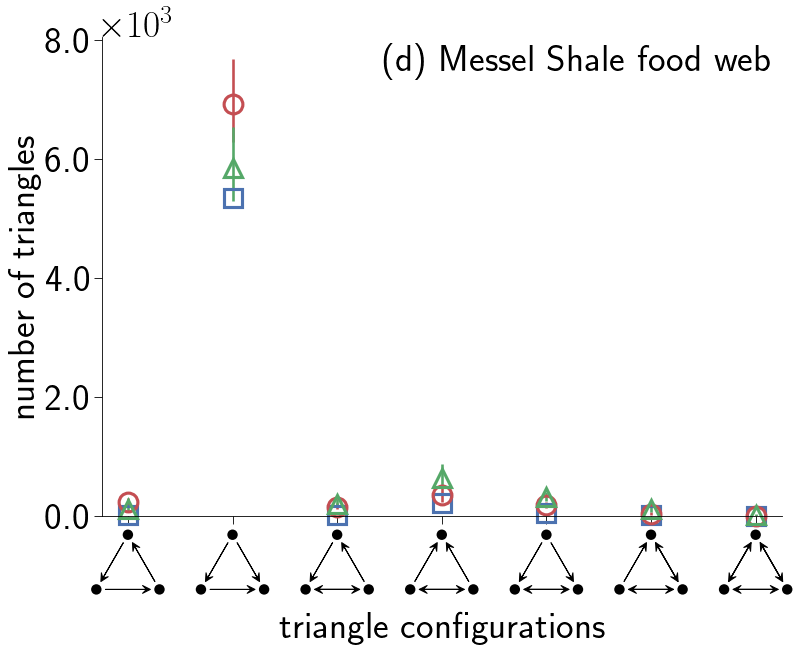

In [42]:
real_graph_name = "messal_shale"
DRS1model_graph_name = real_graph_name + "_00"
DS1model_graph_name = real_graph_name + "_nu0p00_00"

fig, ax = plt.subplots()

real_g_prop_filename = "../../directedS1_data/real_networks/network_properties/all_gprop.txt"
header = open(real_g_prop_filename, 'r').readline().replace('#', ' ').split()
real_g_prop = pd.read_table(real_g_prop_filename, names=header, comment="#", delimiter=r"\s+", index_col=0)
plot_real_triangle_spectra(ax, real_graph_name)

num_g_prop_filename = "../../directedS1_data/synthetic_networks/network_properties/" + DRS1model_graph_name + "_gprop.txt"
header = open(num_g_prop_filename, 'r').readline().replace('#', ' ').split()
num_g_prop = pd.read_table(num_g_prop_filename, names=header, comment="#", delimiter=r"\s+", index_col=0)
plot_num_triangle_spectra(ax, real_graph_name, offset=0.0)

num_g_prop_filename = "../../directedS1_data/synthetic_networks/network_properties/" + DS1model_graph_name + "_gprop.txt"
header = open(num_g_prop_filename, 'r').readline().replace('#', ' ').split()
num_g_prop = pd.read_table(num_g_prop_filename, names=header, comment="#", delimiter=r"\s+", index_col=0)
plot_num_triangle_spectra(ax, real_graph_name, offset=0.0, marker='^', color='#55A868', label=r"directed $\mathbb{S}^1$ model")

plt.text(0.9875, 0.9875, r"{}".format(r"(d) Messel Shale food web"),
         horizontalalignment="right", verticalalignment="top",
         fontsize='medium', transform=ax.transAxes)

cprops = {"facecolor":"k", "edgecolor":"None"}
aprops = {"color":"k", "length_includes_head":True, "overhang":0.5, "head_width":7.5, "head_length":7.5, "joinstyle":"round"}
draw_xlabels(ax, cprops, aprops, r=35, radius=5, offset_factor=1.75, DAwidth=40, DAheight=40, DAxdescent=20, DAydescent=20)

ax.set_ylim(bottom=0)
ax.set_ylabel("number of triangles")
ax.xaxis.labelpad = 80
# ax.ticklabel_format(axis='y', style='sci', scilimits=(0,0))

yfmt = ScalarFormatterForceFormat()
yfmt.set_powerlimits((0,0))
ax.yaxis.set_major_formatter(yfmt)

ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)

fig.savefig("../figures/pdf/figure_paper_" + DS1model_graph_name + "_triangle_spectrum.pdf", bbox_inches='tight')
fig.savefig("../figures/svg/figure_paper_" + DS1model_graph_name + "_triangle_spectrum.svg", bbox_inches='tight')

##### (e) E. coli transcription network

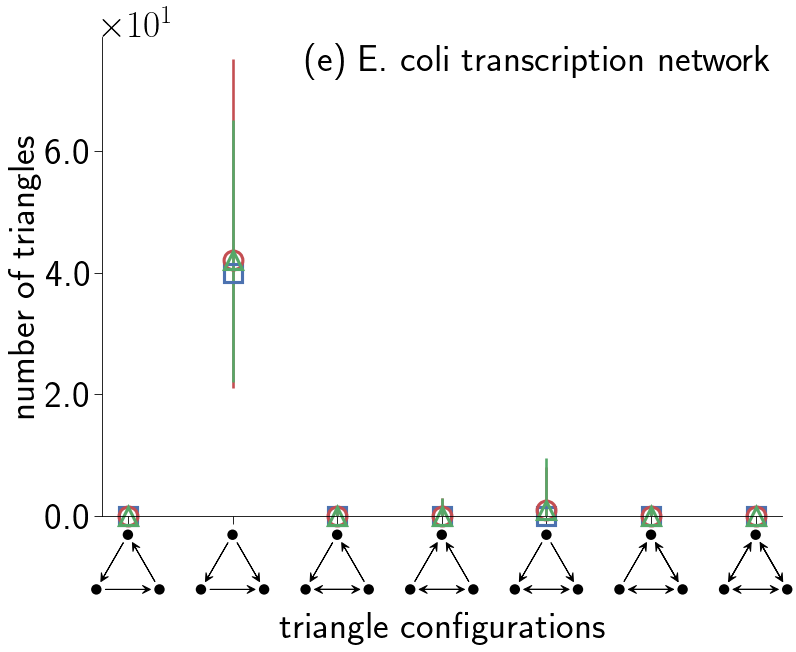

In [43]:
real_graph_name = "ecoli_transcription_v1_0"
DRS1model_graph_name = real_graph_name + "_beta1p50_00"
DS1model_graph_name = real_graph_name + "_beta1p50_nu0p00_00"

fig, ax = plt.subplots()

real_g_prop_filename = "../../directedS1_data/real_networks/network_properties/all_gprop.txt"
header = open(real_g_prop_filename, 'r').readline().replace('#', ' ').split()
real_g_prop = pd.read_table(real_g_prop_filename, names=header, comment="#", delimiter=r"\s+", index_col=0)
plot_real_triangle_spectra(ax, real_graph_name)

num_g_prop_filename = "../../directedS1_data/synthetic_networks/network_properties/" + DRS1model_graph_name + "_gprop.txt"
header = open(num_g_prop_filename, 'r').readline().replace('#', ' ').split()
num_g_prop = pd.read_table(num_g_prop_filename, names=header, comment="#", delimiter=r"\s+", index_col=0)
plot_num_triangle_spectra(ax, real_graph_name, offset=0.0)

num_g_prop_filename = "../../directedS1_data/synthetic_networks/network_properties/" + DS1model_graph_name + "_gprop.txt"
header = open(num_g_prop_filename, 'r').readline().replace('#', ' ').split()
num_g_prop = pd.read_table(num_g_prop_filename, names=header, comment="#", delimiter=r"\s+", index_col=0)
plot_num_triangle_spectra(ax, real_graph_name, offset=0.0, marker='^', color='#55A868', label=r"directed $\mathbb{S}^1$ model")

plt.text(0.9875, 0.9875, r"{}".format(r"(e) E. coli transcription network"),
         horizontalalignment="right", verticalalignment="top",
         fontsize='medium', transform=ax.transAxes)

cprops = {"facecolor":"k", "edgecolor":"None"}
aprops = {"color":"k", "length_includes_head":True, "overhang":0.5, "head_width":7.5, "head_length":7.5, "joinstyle":"round"}
draw_xlabels(ax, cprops, aprops, r=35, radius=5, offset_factor=1.75, DAwidth=40, DAheight=40, DAxdescent=20, DAydescent=20)

ax.set_ylim(bottom=0)
ax.set_ylabel("number of triangles")
ax.xaxis.labelpad = 80
# ax.ticklabel_format(axis='y', style='sci', scilimits=(0,0))

yfmt = ScalarFormatterForceFormat()
yfmt.set_powerlimits((0,0))
ax.yaxis.set_major_formatter(yfmt)

ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)

fig.savefig("../figures/pdf/figure_paper_" + DS1model_graph_name + "_triangle_spectrum.pdf", bbox_inches='tight')
fig.savefig("../figures/svg/figure_paper_" + DS1model_graph_name + "_triangle_spectrum.svg", bbox_inches='tight')

##### (f) Copenhagen networks study (calls)

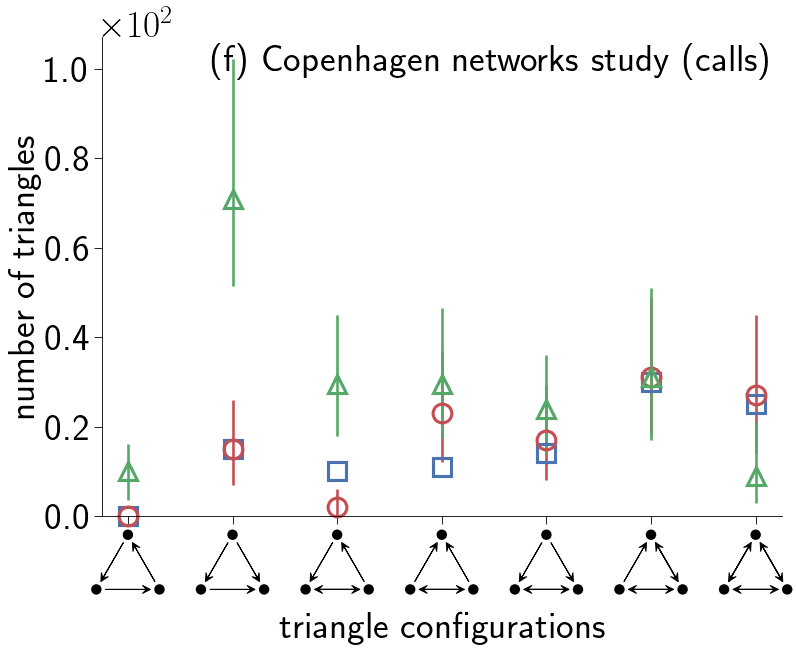

In [44]:
real_graph_name = "copenhagen_calls"
DRS1model_graph_name = real_graph_name + "_beta1p50_00"
DS1model_graph_name = real_graph_name + "_beta1p50_nu0p00_00"

fig, ax = plt.subplots()

real_g_prop_filename = "../../directedS1_data/real_networks/network_properties/all_gprop.txt"
header = open(real_g_prop_filename, 'r').readline().replace('#', ' ').split()
real_g_prop = pd.read_table(real_g_prop_filename, names=header, comment="#", delimiter=r"\s+", index_col=0)
plot_real_triangle_spectra(ax, real_graph_name)

num_g_prop_filename = "../../directedS1_data/synthetic_networks/network_properties/" + DRS1model_graph_name + "_gprop.txt"
header = open(num_g_prop_filename, 'r').readline().replace('#', ' ').split()
num_g_prop = pd.read_table(num_g_prop_filename, names=header, comment="#", delimiter=r"\s+", index_col=0)
plot_num_triangle_spectra(ax, real_graph_name, offset=0.0)

num_g_prop_filename = "../../directedS1_data/synthetic_networks/network_properties/" + DS1model_graph_name + "_gprop.txt"
header = open(num_g_prop_filename, 'r').readline().replace('#', ' ').split()
num_g_prop = pd.read_table(num_g_prop_filename, names=header, comment="#", delimiter=r"\s+", index_col=0)
plot_num_triangle_spectra(ax, real_graph_name, offset=0.0, marker='^', color='#55A868', label=r"directed $\mathbb{S}^1$ model")

plt.text(0.9875, 0.9875, r"{}".format(r"(f) Copenhagen networks study (calls)"),
         horizontalalignment="right", verticalalignment="top",
         fontsize='medium', transform=ax.transAxes)

cprops = {"facecolor":"k", "edgecolor":"None"}
aprops = {"color":"k", "length_includes_head":True, "overhang":0.5, "head_width":7.5, "head_length":7.5, "joinstyle":"round"}
draw_xlabels(ax, cprops, aprops, r=35, radius=5, offset_factor=1.75, DAwidth=40, DAheight=40, DAxdescent=20, DAydescent=20)

ax.set_ylim(bottom=0)
ax.set_ylabel("number of triangles")
ax.xaxis.labelpad = 80
# ax.ticklabel_format(axis='y', style='sci', scilimits=(0,0))

yfmt = ScalarFormatterForceFormat()
yfmt.set_powerlimits((0,0))
ax.yaxis.set_major_formatter(yfmt)

ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)

fig.savefig("../figures/pdf/figure_paper_" + DS1model_graph_name + "_triangle_spectrum.pdf", bbox_inches='tight')
fig.savefig("../figures/svg/figure_paper_" + DS1model_graph_name + "_triangle_spectrum.svg", bbox_inches='tight')

##### (g) U.S. government agency websites (VT)

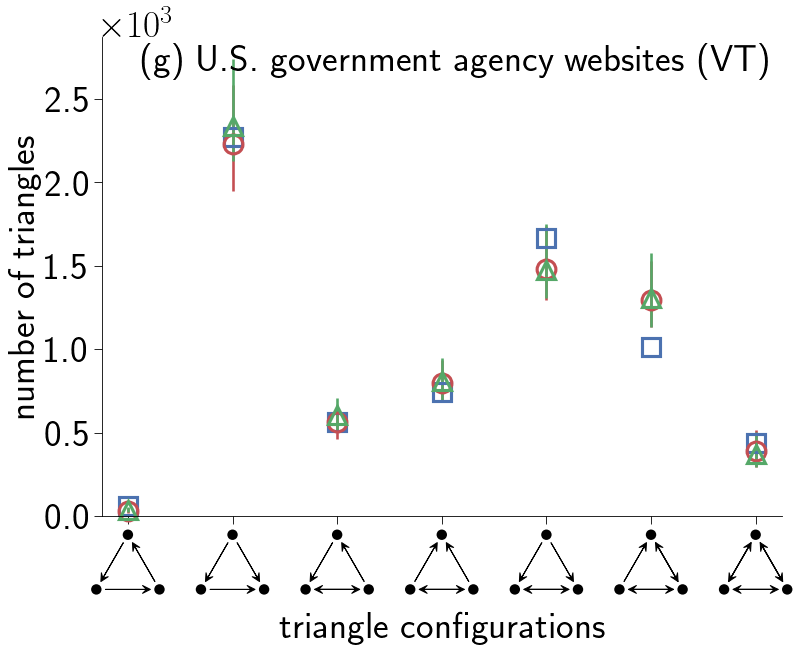

In [45]:
real_graph_name = "us_agencies_vermont"
DRS1model_graph_name = real_graph_name + "_beta2p00_00"
DS1model_graph_name = real_graph_name + "_beta2p00_nu0p00_00"

fig, ax = plt.subplots()

real_g_prop_filename = "../../directedS1_data/real_networks/network_properties/all_gprop.txt"
header = open(real_g_prop_filename, 'r').readline().replace('#', ' ').split()
real_g_prop = pd.read_table(real_g_prop_filename, names=header, comment="#", delimiter=r"\s+", index_col=0)
plot_real_triangle_spectra(ax, real_graph_name)

num_g_prop_filename = "../../directedS1_data/synthetic_networks/network_properties/" + DRS1model_graph_name + "_gprop.txt"
header = open(num_g_prop_filename, 'r').readline().replace('#', ' ').split()
num_g_prop = pd.read_table(num_g_prop_filename, names=header, comment="#", delimiter=r"\s+", index_col=0)
plot_num_triangle_spectra(ax, real_graph_name, offset=0.0)

num_g_prop_filename = "../../directedS1_data/synthetic_networks/network_properties/" + DS1model_graph_name + "_gprop.txt"
header = open(num_g_prop_filename, 'r').readline().replace('#', ' ').split()
num_g_prop = pd.read_table(num_g_prop_filename, names=header, comment="#", delimiter=r"\s+", index_col=0)
plot_num_triangle_spectra(ax, real_graph_name, offset=0.0, marker='^', color='#55A868', label=r"directed $\mathbb{S}^1$ model")

plt.text(0.9875, 0.9875, r"{}".format(r"(g) U.S. government agency websites (VT)"),
         horizontalalignment="right", verticalalignment="top",
         fontsize='medium', transform=ax.transAxes)

cprops = {"facecolor":"k", "edgecolor":"None"}
aprops = {"color":"k", "length_includes_head":True, "overhang":0.5, "head_width":7.5, "head_length":7.5, "joinstyle":"round"}
draw_xlabels(ax, cprops, aprops, r=35, radius=5, offset_factor=1.75, DAwidth=40, DAheight=40, DAxdescent=20, DAydescent=20)

ax.set_ylim(bottom=0)
ax.set_ylabel("number of triangles")
ax.xaxis.labelpad = 80
# ax.ticklabel_format(axis='y', style='sci', scilimits=(0,0))

yfmt = ScalarFormatterForceFormat()
yfmt.set_powerlimits((0,0))
ax.yaxis.set_major_formatter(yfmt)

ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)

fig.savefig("../figures/pdf/figure_paper_" + DS1model_graph_name + "_triangle_spectrum.pdf", bbox_inches='tight')
fig.savefig("../figures/svg/figure_paper_" + DS1model_graph_name + "_triangle_spectrum.svg", bbox_inches='tight')

##### (h) physician trust network

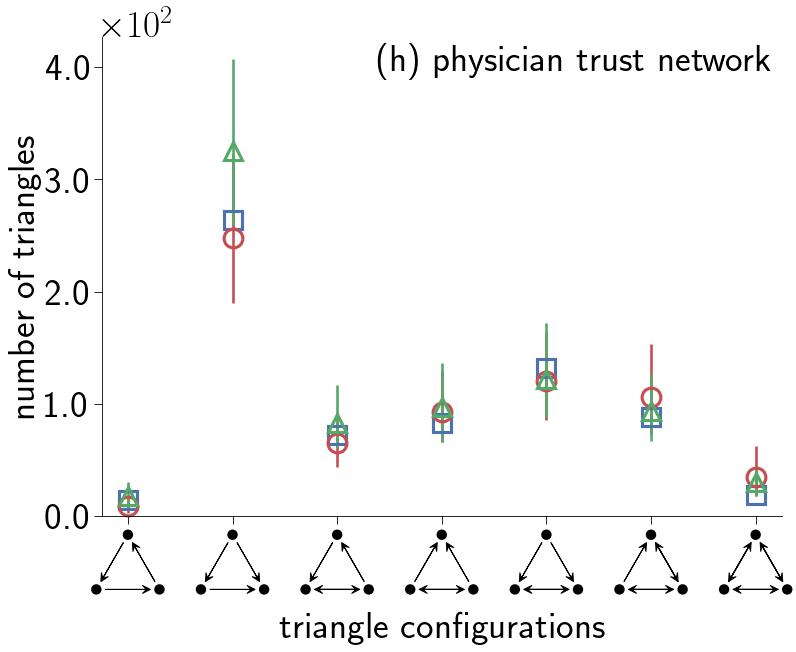

In [46]:
real_graph_name = "physician_trust"
DRS1model_graph_name = real_graph_name + "_00"
DS1model_graph_name = real_graph_name + "_nu0p00_00"

fig, ax = plt.subplots()

real_g_prop_filename = "../../directedS1_data/real_networks/network_properties/all_gprop.txt"
header = open(real_g_prop_filename, 'r').readline().replace('#', ' ').split()
real_g_prop = pd.read_table(real_g_prop_filename, names=header, comment="#", delimiter=r"\s+", index_col=0)
plot_real_triangle_spectra(ax, real_graph_name)

num_g_prop_filename = "../../directedS1_data/synthetic_networks/network_properties/" + DRS1model_graph_name + "_gprop.txt"
header = open(num_g_prop_filename, 'r').readline().replace('#', ' ').split()
num_g_prop = pd.read_table(num_g_prop_filename, names=header, comment="#", delimiter=r"\s+", index_col=0)
plot_num_triangle_spectra(ax, real_graph_name, offset=0.0)

num_g_prop_filename = "../../directedS1_data/synthetic_networks/network_properties/" + DS1model_graph_name + "_gprop.txt"
header = open(num_g_prop_filename, 'r').readline().replace('#', ' ').split()
num_g_prop = pd.read_table(num_g_prop_filename, names=header, comment="#", delimiter=r"\s+", index_col=0)
plot_num_triangle_spectra(ax, real_graph_name, offset=0.0, marker='^', color='#55A868', label=r"directed $\mathbb{S}^1$ model")

plt.text(0.9875, 0.9875, r"{}".format(r"(h) physician trust network"),
         horizontalalignment="right", verticalalignment="top",
         fontsize='medium', transform=ax.transAxes)

cprops = {"facecolor":"k", "edgecolor":"None"}
aprops = {"color":"k", "length_includes_head":True, "overhang":0.5, "head_width":7.5, "head_length":7.5, "joinstyle":"round"}
draw_xlabels(ax, cprops, aprops, r=35, radius=5, offset_factor=1.75, DAwidth=40, DAheight=40, DAxdescent=20, DAydescent=20)

ax.set_ylim(bottom=0)
ax.set_ylabel("number of triangles")
ax.xaxis.labelpad = 80
# ax.ticklabel_format(axis='y', style='sci', scilimits=(0,0))

yfmt = ScalarFormatterForceFormat()
yfmt.set_powerlimits((0,0))
ax.yaxis.set_major_formatter(yfmt)

ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)

fig.savefig("../figures/pdf/figure_paper_" + DS1model_graph_name + "_triangle_spectrum.pdf", bbox_inches='tight')
fig.savefig("../figures/svg/figure_paper_" + DS1model_graph_name + "_triangle_spectrum.svg", bbox_inches='tight')

##### (i) UN migration stock

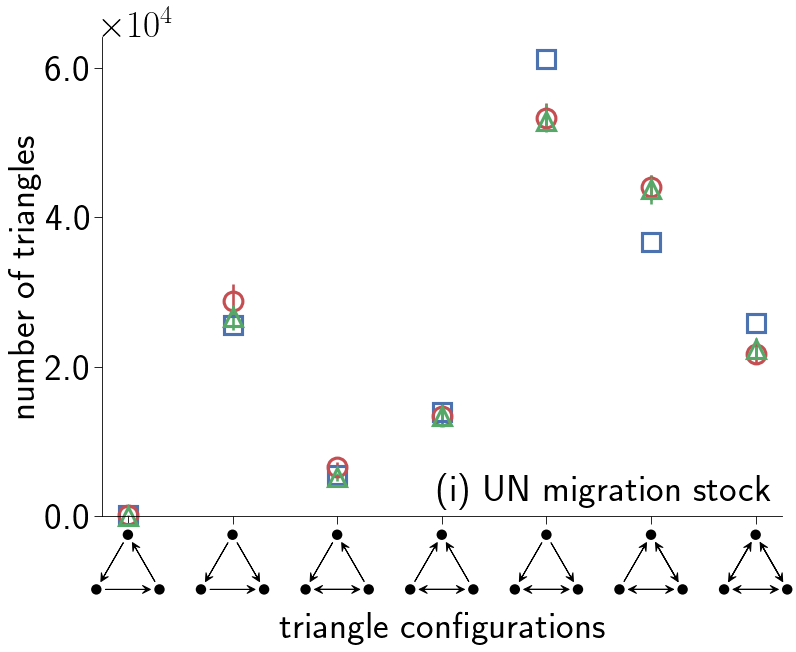

In [47]:
real_graph_name = "un_migrations"
DRS1model_graph_name = real_graph_name + "_beta4p50_00"
DS1model_graph_name = real_graph_name + "_beta4p50_nu0p00_00"

fig, ax = plt.subplots()

real_g_prop_filename = "../../directedS1_data/real_networks/network_properties/all_gprop.txt"
header = open(real_g_prop_filename, 'r').readline().replace('#', ' ').split()
real_g_prop = pd.read_table(real_g_prop_filename, names=header, comment="#", delimiter=r"\s+", index_col=0)
plot_real_triangle_spectra(ax, real_graph_name)

num_g_prop_filename = "../../directedS1_data/synthetic_networks/network_properties/" + DRS1model_graph_name + "_gprop.txt"
header = open(num_g_prop_filename, 'r').readline().replace('#', ' ').split()
num_g_prop = pd.read_table(num_g_prop_filename, names=header, comment="#", delimiter=r"\s+", index_col=0)
plot_num_triangle_spectra(ax, real_graph_name, offset=0.0)

num_g_prop_filename = "../../directedS1_data/synthetic_networks/network_properties/" + DS1model_graph_name + "_gprop.txt"
header = open(num_g_prop_filename, 'r').readline().replace('#', ' ').split()
num_g_prop = pd.read_table(num_g_prop_filename, names=header, comment="#", delimiter=r"\s+", index_col=0)
plot_num_triangle_spectra(ax, real_graph_name, offset=0.0, marker='^', color='#55A868', label=r"directed $\mathbb{S}^1$ model")

plt.text(0.9875, 0.0125, r"{}".format(r"(i) UN migration stock"),
         horizontalalignment="right", verticalalignment="bottom",
         fontsize='medium', transform=ax.transAxes)

cprops = {"facecolor":"k", "edgecolor":"None"}
aprops = {"color":"k", "length_includes_head":True, "overhang":0.5, "head_width":7.5, "head_length":7.5, "joinstyle":"round"}
draw_xlabels(ax, cprops, aprops, r=35, radius=5, offset_factor=1.75, DAwidth=40, DAheight=40, DAxdescent=20, DAydescent=20)

ax.set_ylim(bottom=0)
ax.set_ylabel("number of triangles")
ax.xaxis.labelpad = 80
# ax.ticklabel_format(axis='y', style='sci', scilimits=(0,0))

yfmt = ScalarFormatterForceFormat()
yfmt.set_powerlimits((0,0))
ax.yaxis.set_major_formatter(yfmt)

ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)

fig.savefig("../figures/pdf/figure_paper_" + DS1model_graph_name + "_triangle_spectrum.pdf", bbox_inches='tight')
fig.savefig("../figures/svg/figure_paper_" + DS1model_graph_name + "_triangle_spectrum.svg", bbox_inches='tight')

##### (j) yeast transcription network

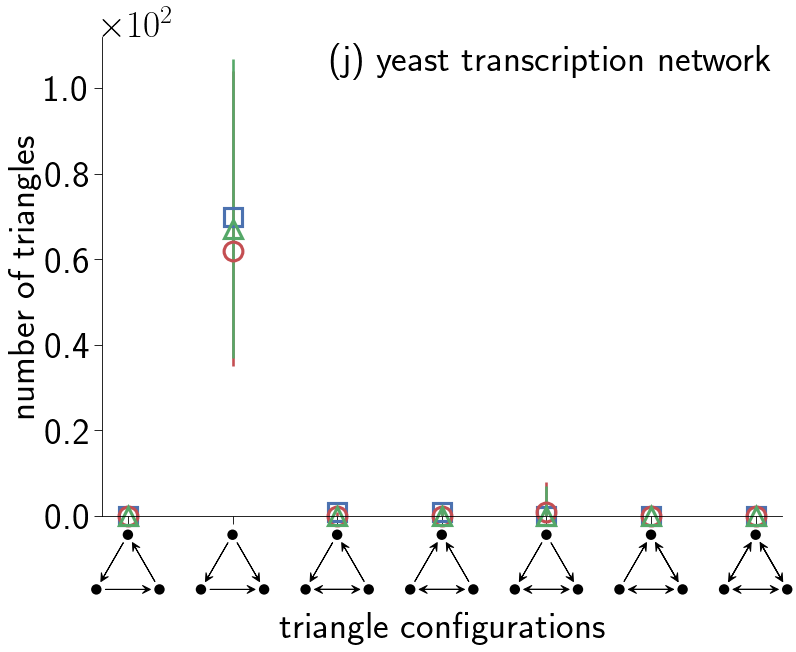

In [48]:
real_graph_name = "yeast_transcription"
DRS1model_graph_name = real_graph_name + "_beta1p20_00"
DS1model_graph_name = real_graph_name + "_beta1p20_nu0p00_00"

fig, ax = plt.subplots()

real_g_prop_filename = "../../directedS1_data/real_networks/network_properties/all_gprop.txt"
header = open(real_g_prop_filename, 'r').readline().replace('#', ' ').split()
real_g_prop = pd.read_table(real_g_prop_filename, names=header, comment="#", delimiter=r"\s+", index_col=0)
plot_real_triangle_spectra(ax, real_graph_name)

num_g_prop_filename = "../../directedS1_data/synthetic_networks/network_properties/" + DRS1model_graph_name + "_gprop.txt"
header = open(num_g_prop_filename, 'r').readline().replace('#', ' ').split()
num_g_prop = pd.read_table(num_g_prop_filename, names=header, comment="#", delimiter=r"\s+", index_col=0)
plot_num_triangle_spectra(ax, real_graph_name, offset=0.0)

num_g_prop_filename = "../../directedS1_data/synthetic_networks/network_properties/" + DS1model_graph_name + "_gprop.txt"
header = open(num_g_prop_filename, 'r').readline().replace('#', ' ').split()
num_g_prop = pd.read_table(num_g_prop_filename, names=header, comment="#", delimiter=r"\s+", index_col=0)
plot_num_triangle_spectra(ax, real_graph_name, offset=0.0, marker='^', color='#55A868', label=r"directed $\mathbb{S}^1$ model")

plt.text(0.9875, 0.9875, r"{}".format(r"(j) yeast transcription network"),
         horizontalalignment="right", verticalalignment="top",
         fontsize='medium', transform=ax.transAxes)

cprops = {"facecolor":"k", "edgecolor":"None"}
aprops = {"color":"k", "length_includes_head":True, "overhang":0.5, "head_width":7.5, "head_length":7.5, "joinstyle":"round"}
draw_xlabels(ax, cprops, aprops, r=35, radius=5, offset_factor=1.75, DAwidth=40, DAheight=40, DAxdescent=20, DAydescent=20)

ax.set_ylim(bottom=0)
ax.set_ylabel("number of triangles")
ax.xaxis.labelpad = 80
# ax.ticklabel_format(axis='y', style='sci', scilimits=(0,0))

yfmt = ScalarFormatterForceFormat()
yfmt.set_powerlimits((0,0))
ax.yaxis.set_major_formatter(yfmt)

ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)

fig.savefig("../figures/pdf/figure_paper_" + DS1model_graph_name + "_triangle_spectrum.pdf", bbox_inches='tight')
fig.savefig("../figures/svg/figure_paper_" + DS1model_graph_name + "_triangle_spectrum.svg", bbox_inches='tight')

##### (k) FAA preferred routes

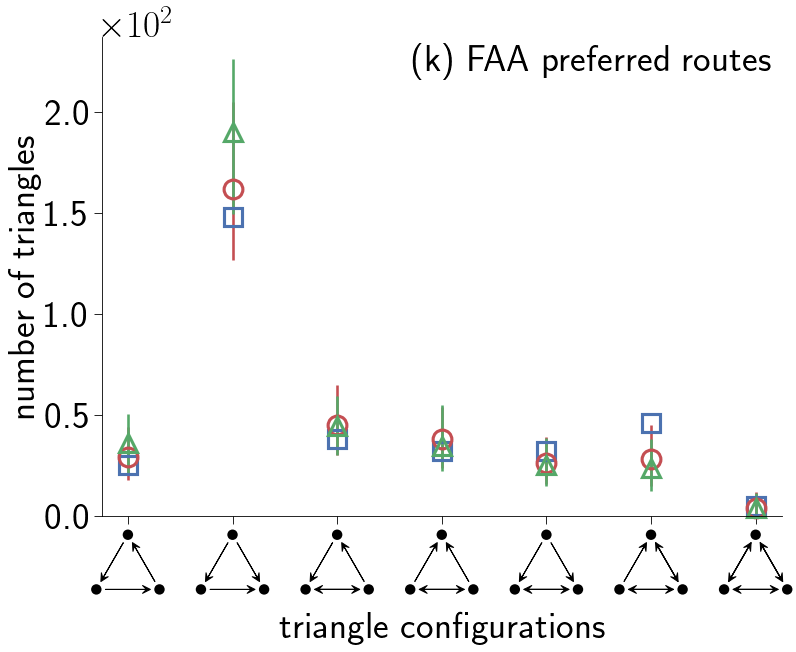

In [49]:
real_graph_name = "faa_routes"
DRS1model_graph_name = real_graph_name + "_00"
DS1model_graph_name = real_graph_name + "_nu0p00_00"

fig, ax = plt.subplots()

real_g_prop_filename = "../../directedS1_data/real_networks/network_properties/all_gprop.txt"
header = open(real_g_prop_filename, 'r').readline().replace('#', ' ').split()
real_g_prop = pd.read_table(real_g_prop_filename, names=header, comment="#", delimiter=r"\s+", index_col=0)
plot_real_triangle_spectra(ax, real_graph_name)

num_g_prop_filename = "../../directedS1_data/synthetic_networks/network_properties/" + DRS1model_graph_name + "_gprop.txt"
header = open(num_g_prop_filename, 'r').readline().replace('#', ' ').split()
num_g_prop = pd.read_table(num_g_prop_filename, names=header, comment="#", delimiter=r"\s+", index_col=0)
plot_num_triangle_spectra(ax, real_graph_name, offset=0.0)

num_g_prop_filename = "../../directedS1_data/synthetic_networks/network_properties/" + DS1model_graph_name + "_gprop.txt"
header = open(num_g_prop_filename, 'r').readline().replace('#', ' ').split()
num_g_prop = pd.read_table(num_g_prop_filename, names=header, comment="#", delimiter=r"\s+", index_col=0)
plot_num_triangle_spectra(ax, real_graph_name, offset=0.0, marker='^', color='#55A868', label=r"directed $\mathbb{S}^1$ model")

plt.text(0.9875, 0.9875, r"{}".format(r"(k) FAA preferred routes"),
         horizontalalignment="right", verticalalignment="top",
         fontsize='medium', transform=ax.transAxes)

cprops = {"facecolor":"k", "edgecolor":"None"}
aprops = {"color":"k", "length_includes_head":True, "overhang":0.5, "head_width":7.5, "head_length":7.5, "joinstyle":"round"}
draw_xlabels(ax, cprops, aprops, r=35, radius=5, offset_factor=1.75, DAwidth=40, DAheight=40, DAxdescent=20, DAydescent=20)

ax.set_ylim(bottom=0)
ax.set_ylabel("number of triangles")
ax.xaxis.labelpad = 80
# ax.ticklabel_format(axis='y', style='sci', scilimits=(0,0))

yfmt = ScalarFormatterForceFormat()
yfmt.set_powerlimits((0,0))
ax.yaxis.set_major_formatter(yfmt)

ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)

fig.savefig("../figures/pdf/figure_paper_" + DS1model_graph_name + "_triangle_spectrum.pdf", bbox_inches='tight')
fig.savefig("../figures/svg/figure_paper_" + DS1model_graph_name + "_triangle_spectrum.svg", bbox_inches='tight')

##### (l) Copenhagen networks study (sms)

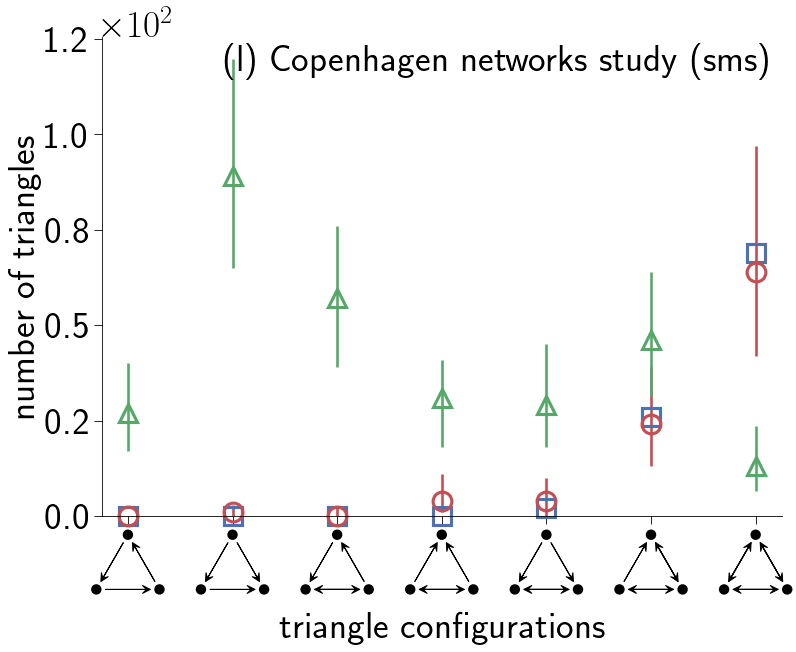

In [50]:
real_graph_name = "copenhagen_sms"
DRS1model_graph_name = real_graph_name + "_beta1p30_00"
DS1model_graph_name = real_graph_name + "_beta1p30_nu0p00_00"

fig, ax = plt.subplots()

real_g_prop_filename = "../../directedS1_data/real_networks/network_properties/all_gprop.txt"
header = open(real_g_prop_filename, 'r').readline().replace('#', ' ').split()
real_g_prop = pd.read_table(real_g_prop_filename, names=header, comment="#", delimiter=r"\s+", index_col=0)
plot_real_triangle_spectra(ax, real_graph_name)

num_g_prop_filename = "../../directedS1_data/synthetic_networks/network_properties/" + DRS1model_graph_name + "_gprop.txt"
header = open(num_g_prop_filename, 'r').readline().replace('#', ' ').split()
num_g_prop = pd.read_table(num_g_prop_filename, names=header, comment="#", delimiter=r"\s+", index_col=0)
plot_num_triangle_spectra(ax, real_graph_name, offset=0.0)

num_g_prop_filename = "../../directedS1_data/synthetic_networks/network_properties/" + DS1model_graph_name + "_gprop.txt"
header = open(num_g_prop_filename, 'r').readline().replace('#', ' ').split()
num_g_prop = pd.read_table(num_g_prop_filename, names=header, comment="#", delimiter=r"\s+", index_col=0)
plot_num_triangle_spectra(ax, real_graph_name, offset=0.0, marker='^', color='#55A868', label=r"directed $\mathbb{S}^1$ model")

plt.text(0.9875, 0.9875, r"{}".format(r"(l) Copenhagen networks study (sms)"),
         horizontalalignment="right", verticalalignment="top",
         fontsize='medium', transform=ax.transAxes)

cprops = {"facecolor":"k", "edgecolor":"None"}
aprops = {"color":"k", "length_includes_head":True, "overhang":0.5, "head_width":7.5, "head_length":7.5, "joinstyle":"round"}
draw_xlabels(ax, cprops, aprops, r=35, radius=5, offset_factor=1.75, DAwidth=40, DAheight=40, DAxdescent=20, DAydescent=20)

ax.set_ylim(bottom=0)
ax.set_ylabel("number of triangles")
ax.xaxis.labelpad = 80
# ax.ticklabel_format(axis='y', style='sci', scilimits=(0,0))

yfmt = ScalarFormatterForceFormat()
yfmt.set_powerlimits((0,0))
ax.yaxis.set_major_formatter(yfmt)

ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)

fig.savefig("../figures/pdf/figure_paper_" + DS1model_graph_name + "_triangle_spectrum.pdf", bbox_inches='tight')
fig.savefig("../figures/svg/figure_paper_" + DS1model_graph_name + "_triangle_spectrum.svg", bbox_inches='tight')

##### (m) Figeys human interactome

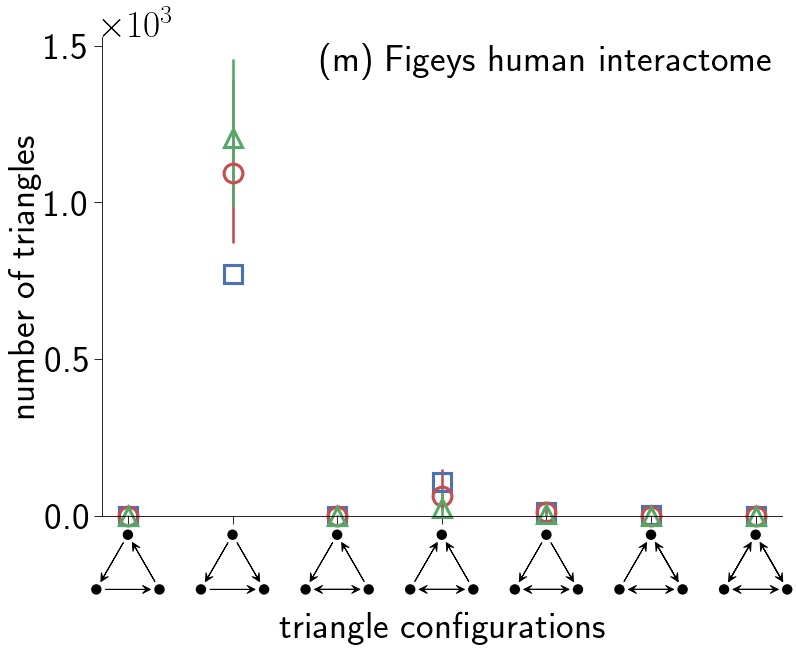

In [51]:
real_graph_name = "interactome_figeys"
DRS1model_graph_name = real_graph_name + "_beta1p01_00"
DS1model_graph_name = real_graph_name + "_beta1p01_nu0p00_00"

fig, ax = plt.subplots()

real_g_prop_filename = "../../directedS1_data/real_networks/network_properties/all_gprop.txt"
header = open(real_g_prop_filename, 'r').readline().replace('#', ' ').split()
real_g_prop = pd.read_table(real_g_prop_filename, names=header, comment="#", delimiter=r"\s+", index_col=0)
plot_real_triangle_spectra(ax, real_graph_name)

num_g_prop_filename = "../../directedS1_data/synthetic_networks/network_properties/" + DRS1model_graph_name + "_gprop.txt"
header = open(num_g_prop_filename, 'r').readline().replace('#', ' ').split()
num_g_prop = pd.read_table(num_g_prop_filename, names=header, comment="#", delimiter=r"\s+", index_col=0)
plot_num_triangle_spectra(ax, real_graph_name, offset=0.0)

num_g_prop_filename = "../../directedS1_data/synthetic_networks/network_properties/" + DS1model_graph_name + "_gprop.txt"
header = open(num_g_prop_filename, 'r').readline().replace('#', ' ').split()
num_g_prop = pd.read_table(num_g_prop_filename, names=header, comment="#", delimiter=r"\s+", index_col=0)
plot_num_triangle_spectra(ax, real_graph_name, offset=0.0, marker='^', color='#55A868', label=r"directed $\mathbb{S}^1$ model")

plt.text(0.9875, 0.9875, r"{}".format(r"(m) Figeys human interactome"),
         horizontalalignment="right", verticalalignment="top",
         fontsize='medium', transform=ax.transAxes)

cprops = {"facecolor":"k", "edgecolor":"None"}
aprops = {"color":"k", "length_includes_head":True, "overhang":0.5, "head_width":7.5, "head_length":7.5, "joinstyle":"round"}
draw_xlabels(ax, cprops, aprops, r=35, radius=5, offset_factor=1.75, DAwidth=40, DAheight=40, DAxdescent=20, DAydescent=20)

ax.set_ylim(bottom=0)
ax.set_ylabel("number of triangles")
ax.xaxis.labelpad = 80
# ax.ticklabel_format(axis='y', style='sci', scilimits=(0,0))

yfmt = ScalarFormatterForceFormat()
yfmt.set_powerlimits((0,0))
ax.yaxis.set_major_formatter(yfmt)

ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)

fig.savefig("../figures/pdf/figure_paper_" + DS1model_graph_name + "_triangle_spectrum.pdf", bbox_inches='tight')
fig.savefig("../figures/svg/figure_paper_" + DS1model_graph_name + "_triangle_spectrum.svg", bbox_inches='tight')

##### (n) Openflights airport network

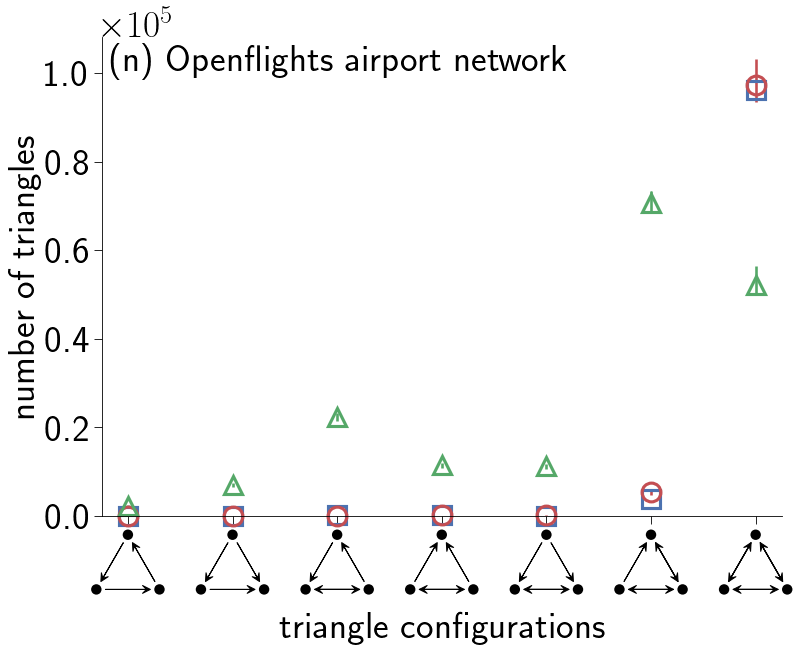

In [52]:
real_graph_name = "openflights"
DRS1model_graph_name = real_graph_name + "_beta3p25_00"
DS1model_graph_name = real_graph_name + "_beta3p25_nu0p00_00"

fig, ax = plt.subplots()

real_g_prop_filename = "../../directedS1_data/real_networks/network_properties/all_gprop.txt"
header = open(real_g_prop_filename, 'r').readline().replace('#', ' ').split()
real_g_prop = pd.read_table(real_g_prop_filename, names=header, comment="#", delimiter=r"\s+", index_col=0)
plot_real_triangle_spectra(ax, real_graph_name)

num_g_prop_filename = "../../directedS1_data/synthetic_networks/network_properties/" + DRS1model_graph_name + "_gprop.txt"
header = open(num_g_prop_filename, 'r').readline().replace('#', ' ').split()
num_g_prop = pd.read_table(num_g_prop_filename, names=header, comment="#", delimiter=r"\s+", index_col=0)
plot_num_triangle_spectra(ax, real_graph_name, offset=0.0)

num_g_prop_filename = "../../directedS1_data/synthetic_networks/network_properties/" + DS1model_graph_name + "_gprop.txt"
header = open(num_g_prop_filename, 'r').readline().replace('#', ' ').split()
num_g_prop = pd.read_table(num_g_prop_filename, names=header, comment="#", delimiter=r"\s+", index_col=0)
plot_num_triangle_spectra(ax, real_graph_name, offset=0.0, marker='^', color='#55A868', label=r"directed $\mathbb{S}^1$ model")

plt.text(0.0125, 0.9875, r"{}".format(r"(n) Openflights airport network"),
         horizontalalignment="left", verticalalignment="top",
         fontsize='medium', transform=ax.transAxes)

cprops = {"facecolor":"k", "edgecolor":"None"}
aprops = {"color":"k", "length_includes_head":True, "overhang":0.5, "head_width":7.5, "head_length":7.5, "joinstyle":"round"}
draw_xlabels(ax, cprops, aprops, r=35, radius=5, offset_factor=1.75, DAwidth=40, DAheight=40, DAxdescent=20, DAydescent=20)

ax.set_ylim(bottom=0)
ax.set_ylabel("number of triangles")
ax.xaxis.labelpad = 80
# ax.ticklabel_format(axis='y', style='sci', scilimits=(0,0))

yfmt = ScalarFormatterForceFormat()
yfmt.set_powerlimits((0,0))
ax.yaxis.set_major_formatter(yfmt)

ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)

fig.savefig("../figures/pdf/figure_paper_" + DS1model_graph_name + "_triangle_spectrum.pdf", bbox_inches='tight')
fig.savefig("../figures/svg/figure_paper_" + DS1model_graph_name + "_triangle_spectrum.svg", bbox_inches='tight')

##### (o) C. elegans neurons (male, chemical)

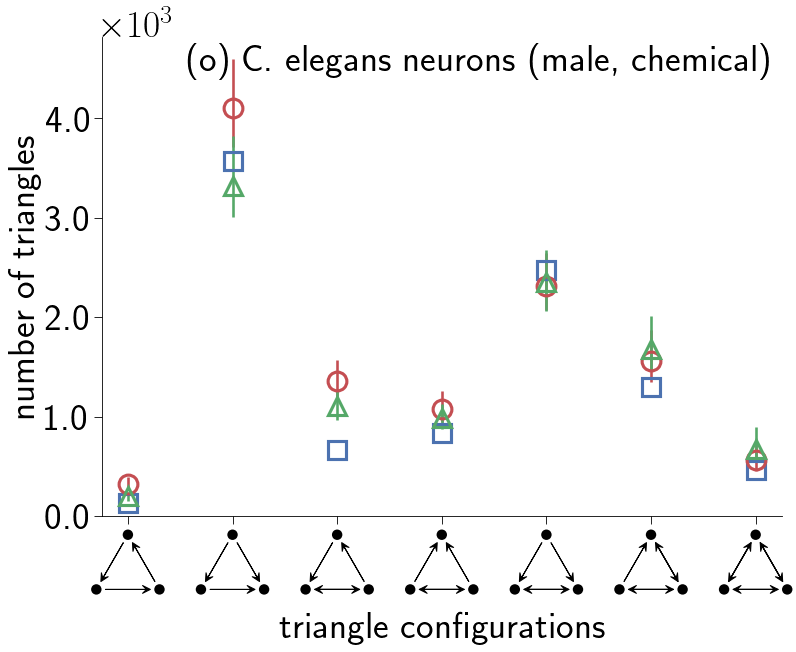

In [53]:
real_graph_name = "celegans_2019_male_chemical"
DRS1model_graph_name = real_graph_name + "_beta2p00_00"
DS1model_graph_name = real_graph_name + "_beta2p00_nu0p00_00"

fig, ax = plt.subplots()

real_g_prop_filename = "../../directedS1_data/real_networks/network_properties/all_gprop.txt"
header = open(real_g_prop_filename, 'r').readline().replace('#', ' ').split()
real_g_prop = pd.read_table(real_g_prop_filename, names=header, comment="#", delimiter=r"\s+", index_col=0)
plot_real_triangle_spectra(ax, real_graph_name)

num_g_prop_filename = "../../directedS1_data/synthetic_networks/network_properties/" + DRS1model_graph_name + "_gprop.txt"
header = open(num_g_prop_filename, 'r').readline().replace('#', ' ').split()
num_g_prop = pd.read_table(num_g_prop_filename, names=header, comment="#", delimiter=r"\s+", index_col=0)
plot_num_triangle_spectra(ax, real_graph_name, offset=0.0)

num_g_prop_filename = "../../directedS1_data/synthetic_networks/network_properties/" + DS1model_graph_name + "_gprop.txt"
header = open(num_g_prop_filename, 'r').readline().replace('#', ' ').split()
num_g_prop = pd.read_table(num_g_prop_filename, names=header, comment="#", delimiter=r"\s+", index_col=0)
plot_num_triangle_spectra(ax, real_graph_name, offset=0.0, marker='^', color='#55A868', label=r"directed $\mathbb{S}^1$ model")

plt.text(0.9875, 0.9875, r"{}".format(r"(o) C. elegans neurons (male, chemical)"),
         horizontalalignment="right", verticalalignment="top",
         fontsize='medium', transform=ax.transAxes)

cprops = {"facecolor":"k", "edgecolor":"None"}
aprops = {"color":"k", "length_includes_head":True, "overhang":0.5, "head_width":7.5, "head_length":7.5, "joinstyle":"round"}
draw_xlabels(ax, cprops, aprops, r=35, radius=5, offset_factor=1.75, DAwidth=40, DAheight=40, DAxdescent=20, DAydescent=20)

ax.set_ylim(bottom=0)
ax.set_ylabel("number of triangles")
ax.xaxis.labelpad = 80
# ax.ticklabel_format(axis='y', style='sci', scilimits=(0,0))

yfmt = ScalarFormatterForceFormat()
yfmt.set_powerlimits((0,0))
ax.yaxis.set_major_formatter(yfmt)

ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)

fig.savefig("../figures/pdf/figure_paper_" + DS1model_graph_name + "_triangle_spectrum.pdf", bbox_inches='tight')
fig.savefig("../figures/svg/figure_paper_" + DS1model_graph_name + "_triangle_spectrum.svg", bbox_inches='tight')

##### (p) chess matches

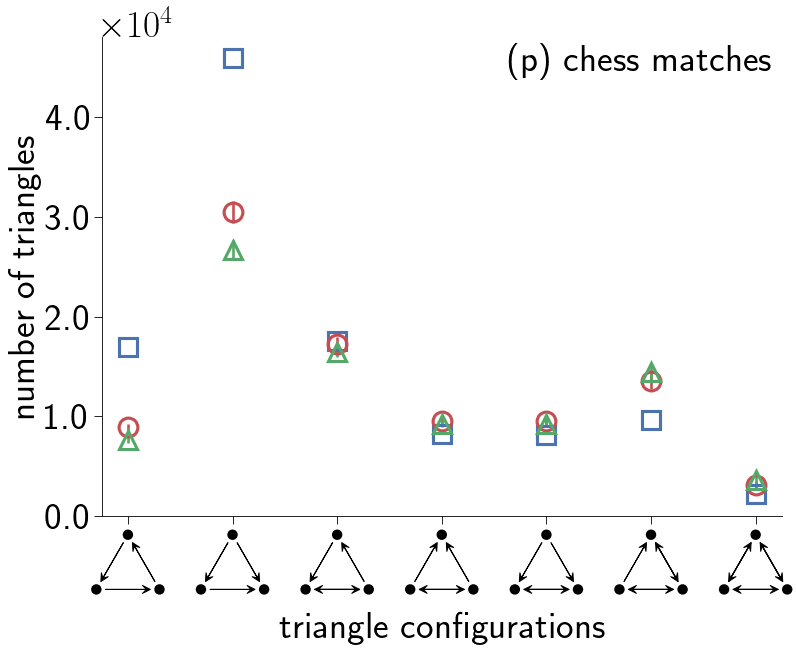

In [54]:
real_graph_name = "chess"
DRS1model_graph_name = real_graph_name + "_beta1p30_00"
DS1model_graph_name = real_graph_name + "_beta1p30_nu0p00_00"

fig, ax = plt.subplots()

real_g_prop_filename = "../../directedS1_data/real_networks/network_properties/all_gprop.txt"
header = open(real_g_prop_filename, 'r').readline().replace('#', ' ').split()
real_g_prop = pd.read_table(real_g_prop_filename, names=header, comment="#", delimiter=r"\s+", index_col=0)
plot_real_triangle_spectra(ax, real_graph_name)

num_g_prop_filename = "../../directedS1_data/synthetic_networks/network_properties/" + DRS1model_graph_name + "_gprop.txt"
header = open(num_g_prop_filename, 'r').readline().replace('#', ' ').split()
num_g_prop = pd.read_table(num_g_prop_filename, names=header, comment="#", delimiter=r"\s+", index_col=0)
plot_num_triangle_spectra(ax, real_graph_name, offset=0.0)

num_g_prop_filename = "../../directedS1_data/synthetic_networks/network_properties/" + DS1model_graph_name + "_gprop.txt"
header = open(num_g_prop_filename, 'r').readline().replace('#', ' ').split()
num_g_prop = pd.read_table(num_g_prop_filename, names=header, comment="#", delimiter=r"\s+", index_col=0)
plot_num_triangle_spectra(ax, real_graph_name, offset=0.0, marker='^', color='#55A868', label=r"directed $\mathbb{S}^1$ model")

plt.text(0.9875, 0.9875, r"{}".format(r"(p) chess matches"),
         horizontalalignment="right", verticalalignment="top",
         fontsize='medium', transform=ax.transAxes)

cprops = {"facecolor":"k", "edgecolor":"None"}
aprops = {"color":"k", "length_includes_head":True, "overhang":0.5, "head_width":7.5, "head_length":7.5, "joinstyle":"round"}
draw_xlabels(ax, cprops, aprops, r=35, radius=5, offset_factor=1.75, DAwidth=40, DAheight=40, DAxdescent=20, DAydescent=20)

ax.set_ylim(bottom=0)
ax.set_ylabel("number of triangles")
ax.xaxis.labelpad = 80
# ax.ticklabel_format(axis='y', style='sci', scilimits=(0,0))

yfmt = ScalarFormatterForceFormat()
yfmt.set_powerlimits((0,0))
ax.yaxis.set_major_formatter(yfmt)

ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)

fig.savefig("../figures/pdf/figure_paper_" + DS1model_graph_name + "_triangle_spectrum.pdf", bbox_inches='tight')
fig.savefig("../figures/svg/figure_paper_" + DS1model_graph_name + "_triangle_spectrum.svg", bbox_inches='tight')